# 1. Perkenalan

**Name**     : Muhammad Vincar Rafi Theoseta <br>
**Batch**    : HCK-18 <br>
**Dataset**  : [UCI Taiwanese Bankruptcy](https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction) <br>
**Objective**: Membuat model klasifikasi untuk prediksi apakah suatu usaha bisnis akan mengalami kebangkrutan berdasarkan data-data finansial dalam dataset<br>
**Deployment**: [Huggingface](https://huggingface.co/spaces/vincar12/bankrupt_predict)

### Background

Sebagai Data Scientist untuk perusahan perbankan, peminjaman uang merupakan hal yang lumrah terjadi. Namun,kegagalan dalam merintis bisnis juga bukan hal yang langka. Maka, diperlukan sebuah model untuk mengetahui apakah suatu usaha akan mengalami kebangkrutan atau tidak. Tujuan dari model tersebut adalah memfilter atau seleksi usaha-usaha seperti apa yang akan bangkrut, sehingga lebih memfokuskan peminjaman kepada usaha-usaha yang lebih besar kemungkinan membayar kembali pinjaman.

Dataset yang digunakan dalam model ini berupa tabel yang berisikan informasi finansial perusahaan-perusahaan di taiwan beserta status kebangkrutan usaha tersebut. Data berasal dari Taiwan Economic Journal tahun 1999 hingga 2009. Terdapat 95 fitur dalam dataset tersebut dengan 6819 data. Beberapa fitur yang termasuk dalam dataset tersebut contohnya adalah Tingkat Keuntungan, Perbandingan Keuntungan dan Penjualan, Tingkat Bunga, dll.

### Problem Statement

Tujuan dari proyek ini adalah untuk membuat model klasifikasi yang dapat memprediksi apakah suatu usaha akan bangkrut berdasarkan data finansial yang diberikan. Model ini bertujuan mengurangi kerugian dari bank dengan meminimalisir pinjaman kepada usaha yang diprediksi akan bangkrut.

### Problem Exploration

1. Berapakah jumlah perusahan yang bangkrut dan tidak bangkrut?
2. Bagaimana perbandingan rata-rata margin perusahan yang bangkrut dan tidak bangkrut?
3. Bagaimana perbandingan rata-rata total aset perusahan yang bangkrut dan tidak bangkrut?
4. Bagaimana perbandingan rata-rata hutang perusahan yang bangkrut dan tidak bangkrut?
5. Bagaimana perbandingan rata-rata pengeluaran perusahan yang bangkrut dan tidak bangkrut?

# 2. Import Library

In [1]:
# basic use
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
# feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import spearmanr, chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
# pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# evaluation
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, recall_score, ConfusionMatrixDisplay
# model saving
import pickle
# warnings
import warnings
# ignore all warnings
warnings.filterwarnings("ignore")


# 3. Data Loading

Loading data dari csv yang di unduh dari sumber UCI

In [2]:
# read csv
df = pd.read_csv('/Users/vincartheoseta/Hacktiv/Phase 1/M2/p1-ftds018-hck-m2-vincar12/data.csv')

Tunjukkan 10 data teratas

In [3]:
# show top 10 data
df.head(10)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          
5          1                                           0.388680          
6          0                                           0.390923          
7          0                                           0.508361          
8          0                                           0.488519          
9          0                                           0.495686          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   
5                                 0.415177   
6                                 0.445704   
7                                 0.570922   
8                                 0.545137   
9                                 0.550916   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    
5                                           0.419134    
6                                           0.436158    
7                                           0.559077    
8                                           0.543284    
9                                           0.542963    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   
5                 0.590171                      0.590251   
6                 0.619950                      0.619950   
7                 0.601738                      0.601717   
8                 0.603612                      0.603612   
9                 0.599209                      0.599209   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   
5                0.998758                    0.796903   
6                0.998993                    0.797012   
7                0.999009                    0.797449   
8                0.998961                    0.797414   
9                0.999001                    0.797404   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   
5                      0.808771                                      0.303116   
6                      0.808960                                      0.302814   
7                      0.809362                                      0.303545   
8                      0.809338    

Tunjukkan 10 data terbawah

In [4]:
# show last 10 data
df.tail(10)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6809          0                                           0.448740          
6810          0                                           0.578901          
6811          0                                           0.518062          
6812          0                                           0.491639          
6813          0                                           0.477600          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6809                                 0.500055   
6810                                 0.648005   
6811                                 0.567870   
6812                                 0.549498   
6813                                 0.531127   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6809                                           0.500937    
6810                                           0.631725    
6811                                           0.565823    
6812                                           0.537877    
6813                                           0.526099    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6809                 0.606012                      0.606012   
6810                 0.602841                      0.602841   
6811                 0.612736                      0.612527   
6812                 0.613219                      0.613168   
6813                 0.595829                      0.595858   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6809                0.998843                    0.797118   
6810                0.999026                    0.797490   
6811                0.999140                    0.797745   
6812                0.998999                    0.797436   
6813                0.998905                    0.797375   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6809                      0.809096   
6810                      0.809402   
6811                      0.809603   
6812                      0.809344   
6813                      0.809294   
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6809                                      0.303314  ...   
6810                                      0.303580  ...   
6811  

Cek info dari data

In [5]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Insight:
- Data memiliki 96 kolom yang bertipe numerik, dengan 93 float dan 3 integer
- Terdapat 6819 data 

Cek data terduplikasi

In [6]:
# check for duplicates
df.duplicated().sum()

0

Cek data missing

In [7]:
# check missing data
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Cek nama-nama kolom

In [8]:
# check column name
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

Menghapus whitespace sebelum nama kolom

In [9]:
# strip whitespace
df.columns = df.columns.str.strip()
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

# 4. Exploratory Data Analysis

Eksplorasi data dengan tujuan memahami dataset lebih lanjut, dimulai dengan copy data untuk eksplorasi dari dataset asli

In [10]:
# copy data from original data
df1 = df.copy()

## 4.1. Proporsi Jumlah Usaha yang Bangkrut

Cek jumlah perusahaan yang bangkrut dan tidak dengan fungsi grouping

In [11]:
# mapping variable name
urutan = {0: 'Tidak Bangkrut', 1: 'Bangkrut'}
df1['Bankrupt?'] = df1['Bankrupt?'].map(urutan)

# grouping by bankrupt
bankrupt = df1.groupby("Bankrupt?")["Net Income Flag"].count()
bankrupt = bankrupt.reset_index()

# pie chart figure
fig = px.pie(bankrupt, names="Bankrupt?", 
              values="Net Income Flag", 
              title="Proporsi Bangkrut")
fig.update_layout(title_x = 0.5)

# display pie chart and grouping data
fig.show()
bankrupt

Bankrupt?  Net Income Flag
0        Bangkrut              220
1  Tidak Bangkrut             6599

Insight:
- Jumlah usaha yang bangkrut hanya sedikit sebanyak 220 atau sekitar 3% 
- Sedangkan usaha yang tidak bangkrut sebanyak 6599 atau sekitar 97%

## 4.2. Rata-rata Margin

Cek rata-rata margin perusahaan yang bangkrut dan tidak bangkrut dengan fungsi groupby dan mean

In [12]:
# grouping by bankrupt and averaging margins
topmargin = df1.groupby("Bankrupt?")[['Operating Gross Margin','Realized Sales Gross Margin']].mean().sort_values(ascending=False, by='Operating Gross Margin')
topmargin = topmargin.reset_index()

# bar chart
fig = px.bar(topmargin, x="Bankrupt?", y=["Operating Gross Margin", "Realized Sales Gross Margin"], orientation='v', text_auto='.2f', title='Rata-rata Margin')
fig.update_layout(title_x = 0.5)
fig.update_yaxes(title_text="Rata-rata Margin")
fig.update_xaxes(title_text="Status Bangkrut")

# display bar chart and grouping data
fig.show()
topmargin

Bankrupt?  Operating Gross Margin  Realized Sales Gross Margin
0  Tidak Bangkrut                0.608257                     0.608237
1        Bangkrut                0.598670                     0.598717

Insight:
- Tidak terlihat perbedaan signifikan antara rerata usaha bangkrut dan tidak bangkrut

## 4.3. Rata-rata Aset

Cek rata-rata rasio aset perusahaan bangkrut dan tidak bangkrut

In [13]:
# grouping by bankrupt and averaging assets
topasset = df1.groupby("Bankrupt?")[['Quick Assets/Total Assets', 'Current Assets/Total Assets', 'Cash/Total Assets']].mean().sort_values(ascending=False, by='Current Assets/Total Assets')
topasset = topasset.reset_index()

# bar chart
fig = px.bar(topasset, x="Bankrupt?", y=['Quick Assets/Total Assets', 'Current Assets/Total Assets', 'Cash/Total Assets'], orientation='v', text_auto='.2f', title='Rata-rata Aset')
fig.update_layout(title_x = 0.5)
fig.update_yaxes(title_text="Rata-rata Aset")
fig.update_xaxes(title_text="Status Bangkrut")

# display bar chart and grouping data
fig.show()
topasset

Bankrupt?  Quick Assets/Total Assets  Current Assets/Total Assets  \
0  Tidak Bangkrut                   0.403318                     0.524058   
1        Bangkrut                   0.304574                     0.468733   

   Cash/Total Assets  
0           0.126640  
1           0.047736

Insight:
- Terlihat bahwa perusahaan yang tidak bangkrut memiliki nilai yang lebih tinggi
- Perbedaan signifikan ini dapat menandakan bahwa usaha-usaha yang bangkrut mungkin dipengaruhi oleh sedikitnya aset usaha mereka

## 4.4. Rata-rata Hutang

Cek rata-rata hutang perusahaan dibandingkan kekayaan usaha tersebut pada usaha bangkrut dan tidak bangkrut

In [14]:
# grouping by bankrupt and averaging debt
topdebt = df1.groupby("Bankrupt?")['Total debt/Total net worth'].mean().sort_values(ascending=False)
topdebt = topdebt.reset_index()

# bar chart
fig = px.bar(topdebt, x="Bankrupt?", y='Total debt/Total net worth', orientation='v', text_auto='.2s', title='Total Hutang/Total Nilai Kekayaan')
fig.update_layout(title_x = 0.5)
fig.update_yaxes(title_text="Total Hutang/Total Nilai Kekayaan")
fig.update_xaxes(title_text="Status Bangkrut")

# display bar chart and grouping data
fig.show()
topdebt

Bankrupt?  Total debt/Total net worth
0        Bangkrut                1.577273e+07
1  Tidak Bangkrut                4.037733e+06

Insight:
- Jelas terlihat perbedaan sangat signifikan antara usaha bangkrut dan tidak bangkrut
- Pada usaha bangkrut nilai hutang dibanding kekayaan usaha tersebut sangat tinggi 
- Ini dapat saja menjadi salah satu faktor penyebab gagalnya usaha

## 4.5. Rata-rata Total Pengeluaran/Aset

Cek rata-rata pengeluaran perusahaan dibandingkan aset usaha tersebut pada usaha bangkrut dan tidak bangkrut

In [15]:
# grouping by bankrupt and averaging expense
topexpense = df1.groupby("Bankrupt?")['Total expense/Assets'].mean().sort_values(ascending=False)
topexpense = topexpense.reset_index()

# bar chart
fig = px.bar(topexpense, x="Bankrupt?", y='Total expense/Assets', orientation='v', text_auto='.2f', title='Total Pengeluaran/Aset')
fig.update_layout(title_x = 0.5)
fig.update_yaxes(title_text='Total Pengeluaran/Aset')
fig.update_xaxes(title_text="Status Bangkrut")

# display bar chart and grouping data
fig.show()
topexpense

Bankrupt?  Total expense/Assets
0        Bangkrut              0.049858
1  Tidak Bangkrut              0.028495

Insight:
- Kembali terlihat perbedaan antara usaha bangkrut dan tidak
- Meskipun skalanya kecil, terlihat bahwa usaha yang bangkrut memiliki pengeluaran/aset yang cukup tinggi dibanding yang tidak bangkrut

## 4.6. EDA Recap

Dari eksplorasi singkat di atas, terlihat perbedaan cukup signifikan antara data-data usaha yang bangkrut dengan data usaha yang tidak bangkrut. Terlihat pada rata-rata kolom-kolom hutang, aset, dan pengeluaran bahwa usaha bangkrut dengan tidak bangkrut memiliki perbedaan. Untuk mengetahui apakah perbedaan tersebut berkorelasi dengan status kebangkrutan perlu dilakukan analisis korelasi lebih lanjut. Jumlah bangkrut yang sangat rendah dalam dataset dibandingkan usaha yang tidak bangkrut, menandakan bahwa dataset akan perlu dilakukan balancing agar model dapat berfungsi optimal.

# 5. Feature Engineering

Feature Engineering adalah proses dengan tujuan modifikasi data agar dapat diproses oleh model yang tentunya dimulai dengan copy data

In [16]:
# copy data
df2 = df.copy()

## 5.1. Cardinality

Cek kardinalitas atau nilai unik dari dataset, kardinalitas rendah biasanya menandakan data kategorikal alih-alih numerik

In [17]:
# create empty lists
columns = []
nunique = []
unique = []

# loop columns
for column in df2:
    # inserting data to empty lists
    columns.append(column)
    nunique.append(df2[column].nunique())
    unique.append(df2[column].unique())

# create dataframe for the lists
cardinality_df = pd.DataFrame({
    'column name' : columns,
    'unique value count' : nunique,
    'unique value list' : unique
})

# show all columns
pd.set_option('display.max_rows', None) 

# display data
cardinality_df

column name  unique value count  \
0                                           Bankrupt?                   2   
1   ROA(C) before interest and depreciation before...                3333   
2              ROA(A) before interest and % after tax                3151   
3   ROA(B) before interest and depreciation after tax                3160   
4                              Operating Gross Margin                3781   
5                         Realized Sales Gross Margin                3788   
6                               Operating Profit Rate                3376   
7                           Pre-tax net Interest Rate                3789   
8                         After-tax net Interest Rate                3604   
9         Non-industry income and expenditure/revenue                2551   
10               Continuous interest rate (after tax)                3617   
11                             Operating Expense Rate                2966   
12              Research and development expense rate                1536   
13                                     Cash flow rate                5557   
14                Interest-bearing debt interest rate                1080   
15                                       Tax rate (A)                2488   
16                            Net Value Per Share (B)                2278   
17                            Net Value Per Share (A)                2285   
18                            Net Value Per Share (C)                2284   
19            Persistent EPS in the Last Four Seasons                1358   
20                                Cash Flow Per Share                1545   
21                         Revenue Per Share (Yuan ¥)                3807   
22                Operating Profit Per Share (Yuan ¥)                1236   
23           Per Share Net profit before tax (Yuan ¥)                1522   
24            Realized Sales Gross Profit Growth Rate                5583   
25                       Operating Profit Growth Rate                6249   
26                   After-tax Net Profit Growth Rate                6246   
27                     Regular Net Profit Growth Rate                6253   
28                  Continuous Net Profit Growth Rate                6270   
29                            Total Asset Growth Rate                1751   
30                              Net Value Growth Rate                4502   
31               Total Asset Return Growth Rate Ratio                2903   
32                                Cash Reinvestment %                3599   
33                                      Current Ratio                6132   
34                                        Quick Ratio                6094   
35                             Interest Expense Ratio                3794   
36                         Total debt/Total net worth                5518   
37                                       Debt ratio %                4208   
38                                   Net worth/Assets                4208   
39               Long-term fund suitability ratio (A)                6523   
40                               Borrowing dependency                4338   
41                   Contingent liabilities/Net worth                1855   
42                   Operating profit/Paid-in capital                4423   
43              Net profit before tax/Paid-in capital                4785   
44        Inventory and accounts receivable/Net value                5289   
45                               Total Asset Turnover                 381   
46                       Accounts Receivable Turnover                1593   
47                            Average Collection Days                5451   
48                    Inventory Turnover Rate (times)                2397   
49                    Fixed Assets Turnover Frequency                2451   
50                    Net Worth Turnover Rate (times)                 741   
51                                 Rev

Insight:
- Hanya 3 kolom memiliki nilai kardinalitas rendah `Bankrupt?`, `Liability-Assets Flag`, `Liability to Equity`
- 3 kolom tersebut berupa kategorikal

## 5.2. Split Inference, Features, Target, Train-Test

### 5.2.1. Split Inference

Splitting data inference dari data utama agar tidak dipelajari oleh model

In [18]:
# create separated data for inference
data_inf = df2.sample(3, random_state=30)

# delete the inference data from the main data
df.drop(data_inf.index, inplace=True)

# reset the index of the main data and inference data
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# save actual inference data with target to csv
data_inf.to_csv('data_inf_target.csv', index=False)

# delete the target from the inference data
data_inf.drop(['Bankrupt?'], axis=1, inplace=True)

# save inference data to csv
data_inf.to_csv('data_inf.csv', index=False)

### 5.2.2. Split Target

Membagi dataframe menjadi 2
- `X` untuk kolom-kolom yang menjadi fitur 
- `y` untuk kolom yang menjadi target

In [19]:
# split dataframe to X and y
X = df2.drop('Bankrupt?', axis=1)
y = df2['Bankrupt?']

# display splitted data shape
print('fitur:', X.shape)
print('target:', y.shape)

fitur: (6819, 95)
target: (6819,)


### 5.2.3. Split train test

Membagi data `X` dan `y` masing-masing menjadi data train dan data test. Data train untuk melatih model sesuai namanya dan test untuk menguji hasil latihan model. Fungsi `train_test_split` digunakan dengan rasio data test sebesar 0.2 dan random state 30 agar pengacakan tidak berubah setiap kode dijalankan. `Stratify` berguna menyeimbangkan model karena perbedaan data target yang sangat signifikan.

In [20]:
# splitting train test stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=30)
y_train.value_counts()

Bankrupt?
0    5279
1     176
Name: count, dtype: int64

## 5.3. Handling Outlier

Handling data outlier menggunakan fungsi untuk menghitung skew dari data tersebut. Dari penghitungan skew dapat ditentukan apakah adanya outlier dalam data berdasarkan tipe skew dari data. Untuk data normal (skew -0.5 hingga 0.5), digunakan perhitungan rata-rata ± std * 3. Sedangkan data skew moderat (skew -1 hingga -0.5 dan 0.5 hingga 1), dengan perhitungan IQR 1.5. Untuk data skew extreme, digunakan perhitungan IQR 3

In [21]:
# create function to find outlier boundaries
def find_boundaries(dataframe):

    # create dataframe and empty lists
    result = pd.DataFrame()
    columns_name = []
    skew = []
    upper = []
    lower = []
    outlier_tf = []
    type = []

    # selecting numeric columns only
    num_columns = dataframe.select_dtypes(include=['int64','float64'])
    

    # looping columns
    for column in num_columns:
        columns_name.append(column)

        # counting skewness
        skewness = dataframe[column].skew()
        skew.append(skewness)

        # separate skewness types
        if -0.5 <= skewness <= 0.5:
            # calculating normal type boundaries
            upper_boundary = dataframe[column].mean() + (3 * dataframe[column].std())
            lower_boundary = dataframe[column].mean() - (3 * dataframe[column].std())
            type.append("normal")
    
        elif -1 <= skewness <= -0.5 or 0.5 <= skewness <= 1:
            # calculating moderate skew type boundaries
            IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
            lower_boundary = dataframe[column].quantile(0.25) - (IQR * 1.5)
            upper_boundary = dataframe[column].quantile(0.75) + (IQR * 1.5)
            type.append("moderate")

        elif -1 >= skewness or skewness >= 1:
            # calculating extreme skew type boundaries
            IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
            lower_boundary = dataframe[column].quantile(0.25) - (IQR * 3)
            upper_boundary = dataframe[column].quantile(0.75) + (IQR * 3)
            type.append("extreme")

        # insert data to lists
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # outliers
        outliers = (dataframe[column] < lower_boundary) | (dataframe[column] > upper_boundary)
        outlier_tf.append(any(outliers))

    # Add into the dataframe
    result['columns'] = columns_name
    result['skewness'] = skew
    result['upper_value'] = upper
    result['lower_value'] = lower
    result['outliers'] = outlier_tf
    result['skew_type'] = type

    return result

Menggunakan fungsi yang telah dibuat untuk mencari outlier dalam X_train

In [22]:
# using function to find boundaries X_train
dfbound = find_boundaries(X_train)

# display result
dfbound

columns   skewness  \
0   ROA(C) before interest and depreciation before...  -0.305361   
1              ROA(A) before interest and % after tax  -1.030315   
2   ROA(B) before interest and depreciation after tax  -0.746746   
3                              Operating Gross Margin  -8.653354   
4                         Realized Sales Gross Margin  -8.679506   
5                               Operating Profit Rate -70.209550   
6                           Pre-tax net Interest Rate -59.402529   
7                         After-tax net Interest Rate -65.385968   
8         Non-industry income and expenditure/revenue  23.448251   
9                Continuous interest rate (after tax) -58.361743   
10                             Operating Expense Rate   1.233961   
11              Research and development expense rate   1.276971   
12                                     Cash flow rate   3.944653   
13                Interest-bearing debt interest rate   6.831715   
14                                       Tax rate (A)   1.888876   
15                            Net Value Per Share (B)   2.902142   
16                            Net Value Per Share (A)   2.869096   
17                            Net Value Per Share (C)   2.864917   
18            Persistent EPS in the Last Four Seasons   5.305823   
19                                Cash Flow Per Share  -0.354656   
20                         Revenue Per Share (Yuan ¥)  43.845882   
21                Operating Profit Per Share (Yuan ¥)   9.466609   
22           Per Share Net profit before tax (Yuan ¥)   6.378406   
23            Realized Sales Gross Profit Growth Rate  70.144071   
24                       Operating Profit Growth Rate -64.395489   
25                   After-tax Net Profit Growth Rate -26.127055   
26                     Regular Net Profit Growth Rate -25.733868   
27                  Continuous Net Profit Growth Rate -43.542431   
28                            Total Asset Growth Rate  -0.926375   
29                              Net Value Growth Rate  73.857972   
30               Total Asset Return Growth Rate Ratio  56.099915   
31                                Cash Reinvestment %   1.764298   
32                                      Current Ratio  73.857972   
33                                        Quick Ratio  36.391527   
34                             Interest Expense Ratio -23.925320   
35                         Total debt/Total net worth  49.618786   
36                                       Debt ratio %   1.158981   
37                                   Net worth/Assets  -1.158981   
38               Long-term fund suitability ratio (A)  26.176694   
39                               Borrowing dependency  25.389215   
40                   Contingent liabilities/Net worth  71.921441   
41                   Operating profit/Paid-in capital   9.619149   
42              Net profit before tax/Paid-in capital   6.906648   
43        Inventory and accounts receivable/Net value  22.102886   
44                               Total Asset Turnover   2.167860   
45                       Accounts Receivable Turnover  24.489342   
46                            Average Collection Days  27.686898   
47                    Inventory Turnover Rate (times)   1.172937   
48                    Fixed Assets Turnover Frequency   2.351477   
49                    Net Worth Turnover Rate (times)   6.652774   
50                                 Revenue per person  73.857972   
51                        Operating profit per person   7.847451   
52                         Allocation rate per person  35.141153   
53                    Working Capital to Total Assets  -0.260691   
54                          Quick Assets/Total Assets   0.338115   
55                        Current Assets/Total Assets   0.080428   
56                                  Cash/Total Assets   2.222333   
57                     Quick Assets/Current Liability  52.336788   
58                             Cas

Insight:
- Terlihat mayoritas kolom memiliki outlier
- Mayoritas kolom juga memiliki tipe skew

Mencari outlier dengan skew normal

In [23]:
# finding outliers for normal skew
outlier_column = dfbound[(dfbound['outliers']==True)&(dfbound['skew_type']=='normal')]['columns'].tolist()

# display result
outlier_column

['ROA(C) before interest and depreciation before interest',
 'Cash Flow Per Share',
 'Working Capital to Total Assets',
 'Cash Flow to Total Assets',
 'Cash Flow to Liability']

Capping dengan winsorizer menggunakan metode gaussian karena skew bersifat normal

In [24]:
# capping for normal skew
winsoriser_norm = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=outlier_column,
                            missing_values='ignore')

# transform train and test data with capping
X_train_capped = winsoriser_norm.fit_transform(X_train)
X_test_capped = winsoriser_norm.transform(X_test)

Mencari kolom outlier dengan skew selain normal

In [25]:
# finding outliers for skew columns
outlier_column_skew = dfbound[(dfbound['outliers']==True)&(dfbound['skew_type']!='normal')]['columns'].tolist()

# display columns
outlier_column_skew

['ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Operating Profit Rate',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Continuous interest rate (after tax)',
 'Cash flow rate',
 'Interest-bearing debt interest rate',
 'Tax rate (A)',
 'Net Value Per Share (B)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Revenue Per Share (Yuan ¥)',
 'Operating Profit Per Share (Yuan ¥)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Realized Sales Gross Profit Growth Rate',
 'Operating Profit Growth Rate',
 'After-tax Net Profit Growth Rate',
 'Regular Net Profit Growth Rate',
 'Continuous Net Profit Growth Rate',
 'Total Asset Growth Rate',
 'Net Value Growth Rate',
 'Total Asset Return Growth Rate Ratio',
 'Cash Reinvestment %',
 'Current Ratio',
 'Quick Ratio',
 'Inter

Capping dengan winsorizer menggunakan metode IQR karena data bersifat skew

In [26]:
# column list without categorical
outlier_column_skew = ['After-tax Net Profit Growth Rate',
 'After-tax net Interest Rate',
 'Allocation rate per person',
 'Borrowing dependency',
 'CFO to Assets',
 'Cash Flow to Equity',
 'Cash Flow to Sales',
 'Cash Reinvestment %',
 'Cash flow rate',
 'Cash/Current Liability',
 'Cash/Total Assets',
 'Continuous Net Profit Growth Rate',
 'Continuous interest rate (after tax)',
 'Current Liabilities/Equity',
 'Current Liability to Assets',
 'Current Liability to Current Assets',
 'Current Liability to Equity',
 'Current Ratio',
 'Debt ratio %',
 'Degree of Financial Leverage (DFL)',
 'Equity to Liability',
 'Equity to Long-term Liability',
 'Fixed Assets to Assets',
 'Gross Profit to Sales',
 'Interest Coverage Ratio (Interest expense to EBIT)',
 'Interest Expense Ratio',
 'Interest-bearing debt interest rate',
 'Inventory and accounts receivable/Net value',
 'Inventory/Current Liability',
 'Inventory/Working Capital',
 'Liability to Equity',
 'Long-term Liability to Current Assets',
 'Long-term fund suitability ratio (A)',
 "Net Income to Stockholder's Equity",
 'Net Income to Total Assets',
 'Net Value Growth Rate',
 'Net Value Per Share (A)',
 'Net Value Per Share (B)',
 'Net Value Per Share (C)',
 'Net profit before tax/Paid-in capital',
 'Net worth/Assets',
 'No-credit Interval',
 'Non-industry income and expenditure/revenue',
 'Operating Funds to Liability',
 'Operating Gross Margin',
 'Operating Profit Growth Rate',
 'Operating Profit Per Share (Yuan ¥)',
 'Operating Profit Rate',
 'Operating profit per person',
 'Operating profit/Paid-in capital',
 'Per Share Net profit before tax (Yuan ¥)',
 'Persistent EPS in the Last Four Seasons',
 'Pre-tax net Interest Rate',
 'Quick Assets/Current Liability',
 'Quick Ratio',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Realized Sales Gross Margin',
 'Realized Sales Gross Profit Growth Rate',
 'Regular Net Profit Growth Rate',
 'Retained Earnings to Total Assets',
 'Revenue Per Share (Yuan ¥)',
 'Tax rate (A)',
 'Total Asset Growth Rate',
 'Total Asset Return Growth Rate Ratio',
 'Total Asset Turnover',
 'Total debt/Total net worth',
 'Total expense/Assets',
 'Total income/Total expense',
 'Working Capital/Equity',
 'Working capitcal Turnover Rate']

# capping skewed data
winsorizer_skew = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=outlier_column_skew)

# transform train and test data with capping
X_train_capped = winsorizer_skew.fit_transform(X_train_capped)
X_test_capped = winsorizer_skew.transform(X_test_capped)

Plotting sebelum dan sesudah capping untuk melihat hasil capping secara visual

After-tax Net Profit Growth Rate - Before Capping


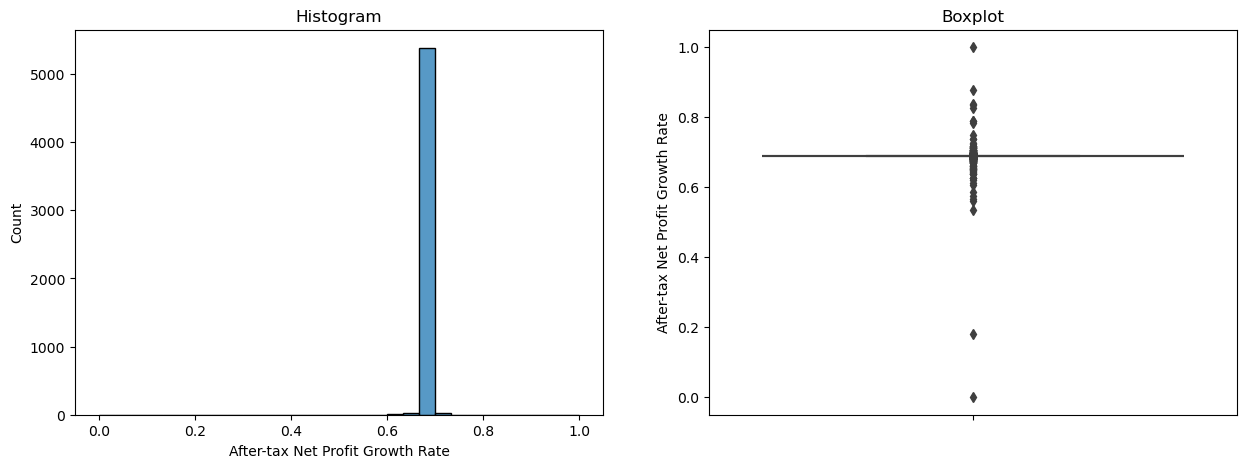


After-tax Net Profit Growth Rate - After Capping


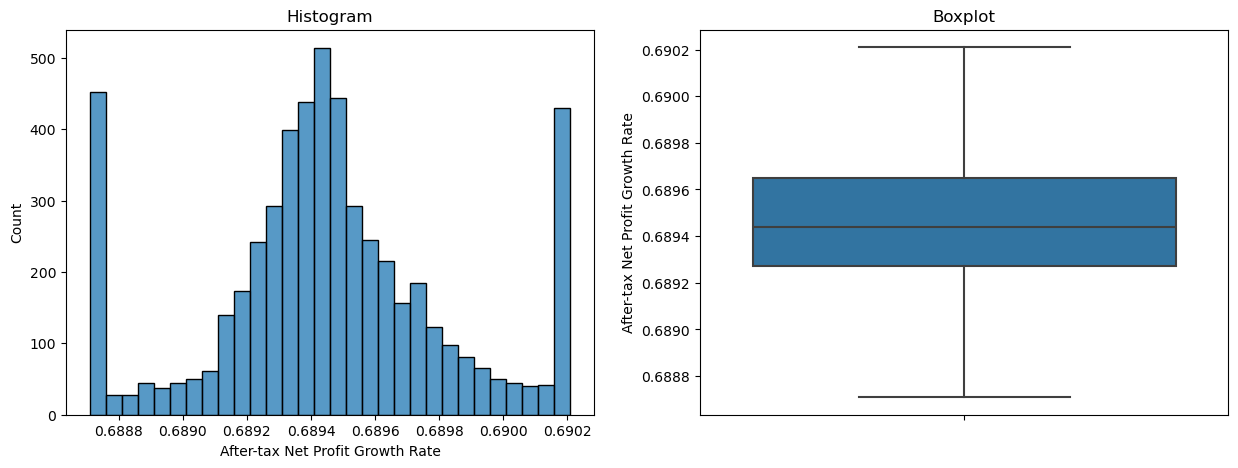

After-tax net Interest Rate - Before Capping


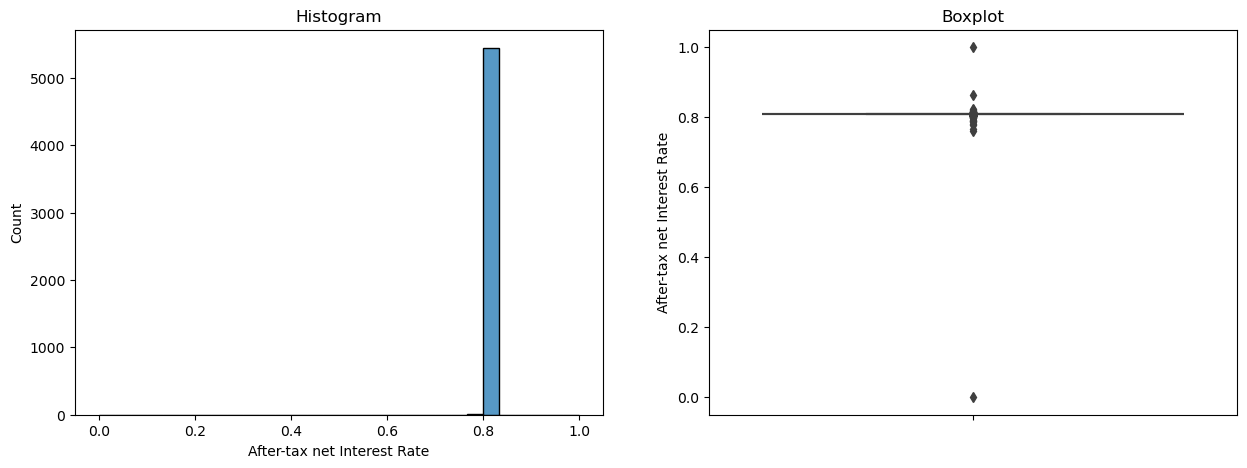


After-tax net Interest Rate - After Capping


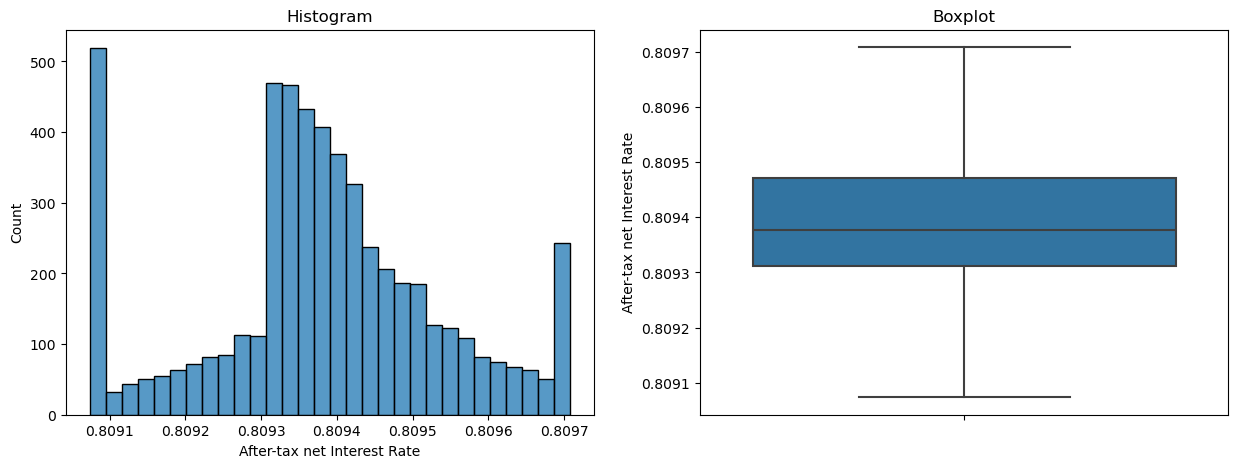

Allocation rate per person - Before Capping


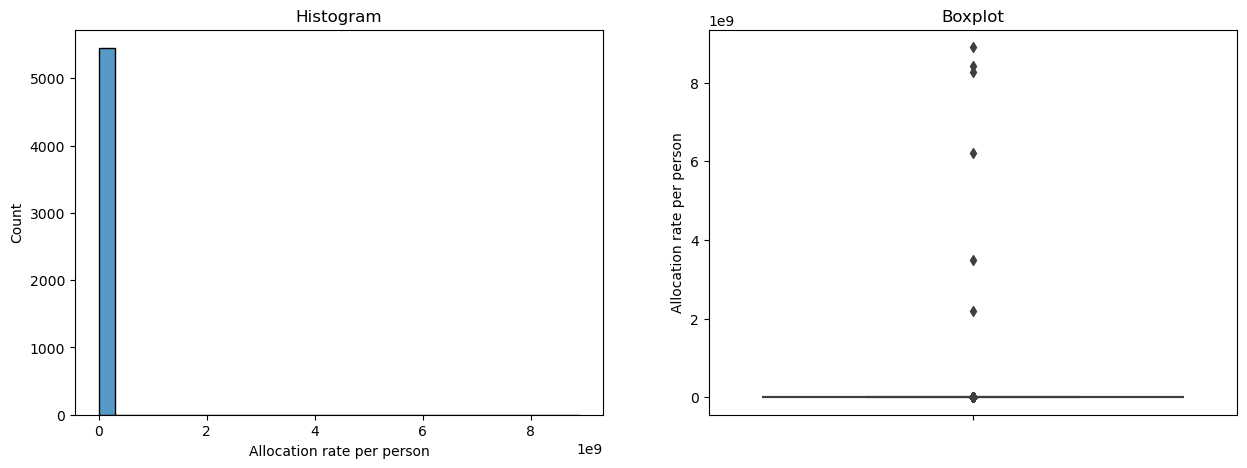


Allocation rate per person - After Capping


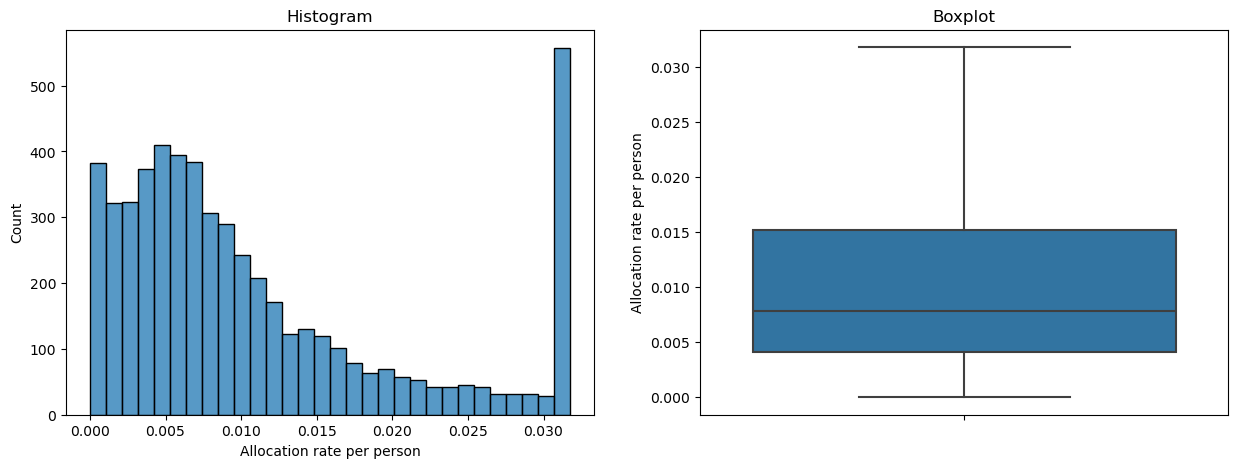

Borrowing dependency - Before Capping


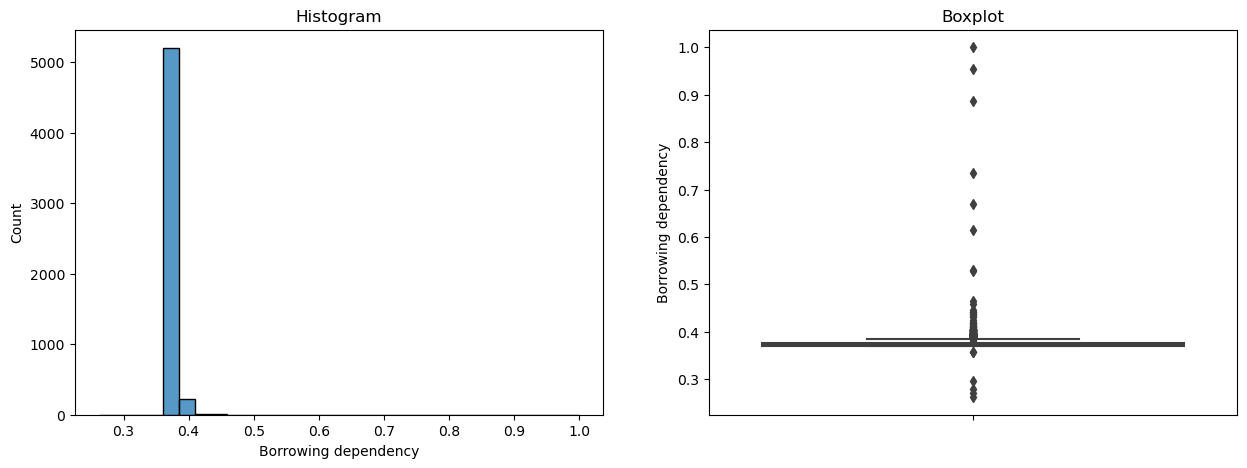


Borrowing dependency - After Capping


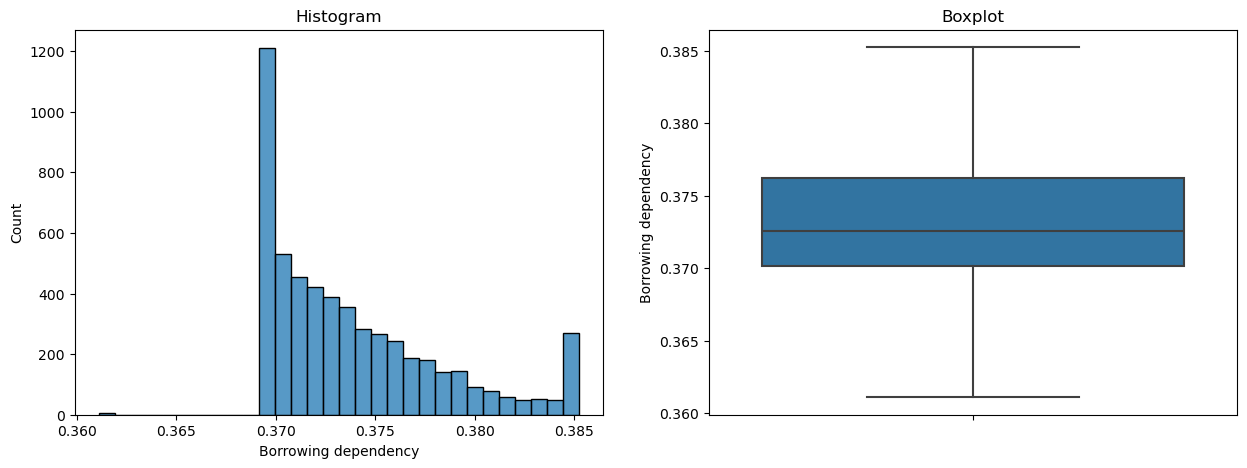

CFO to Assets - Before Capping


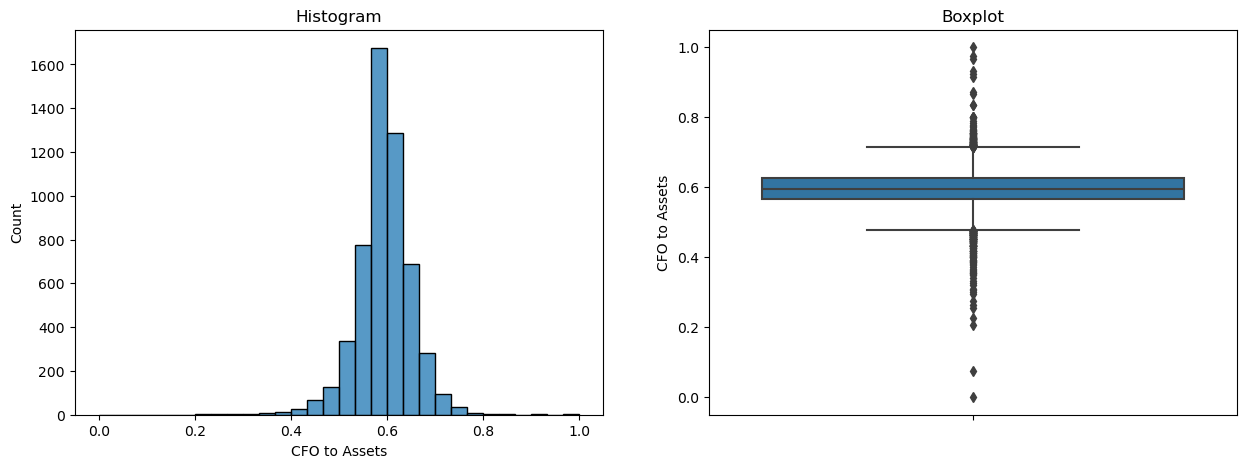


CFO to Assets - After Capping


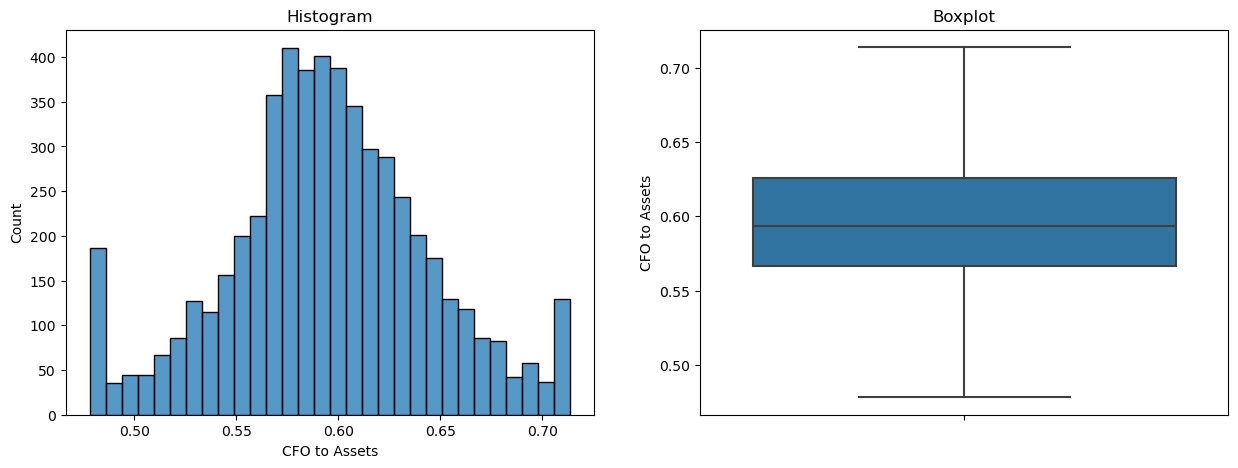

Cash Flow to Equity - Before Capping


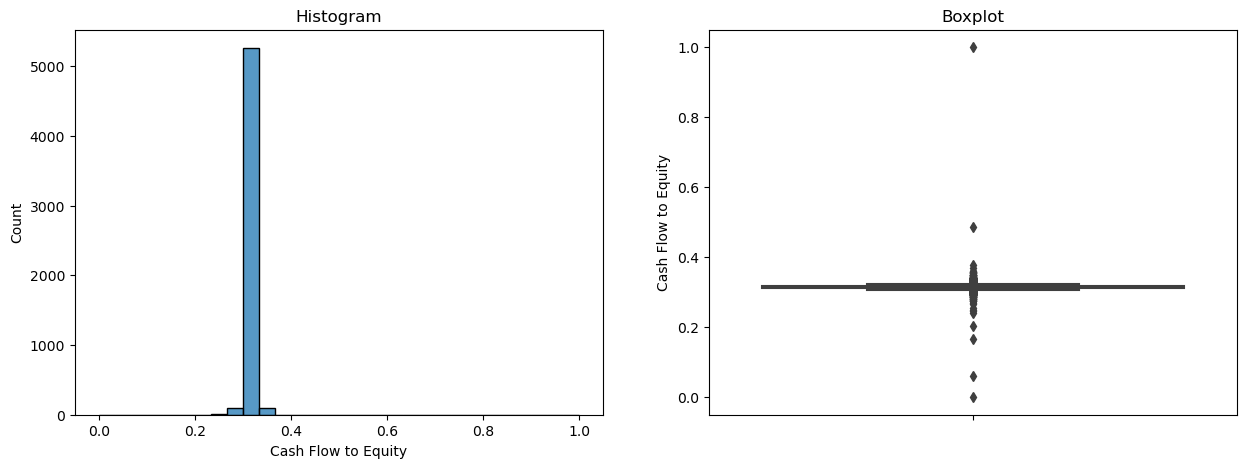


Cash Flow to Equity - After Capping


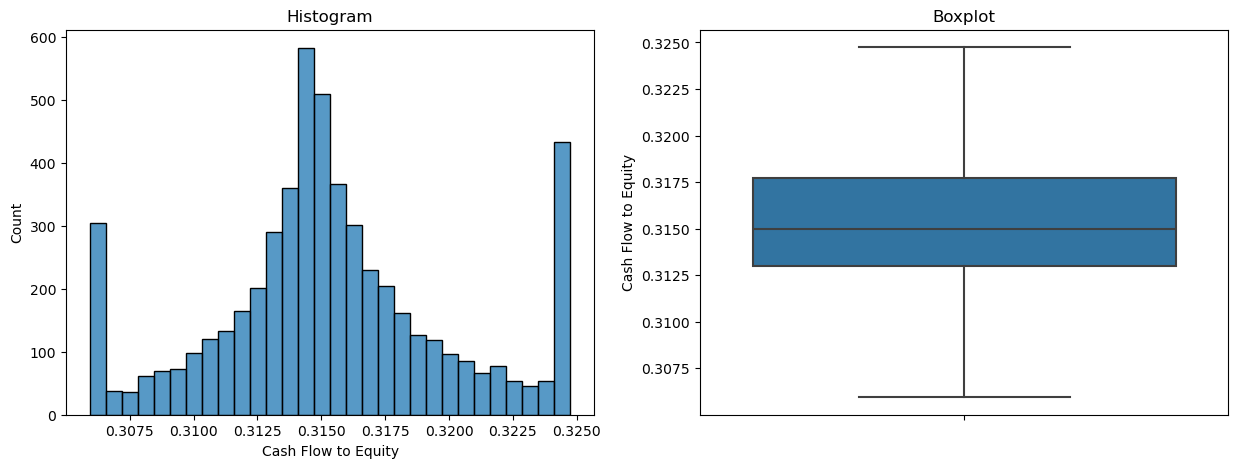

Cash Flow to Sales - Before Capping


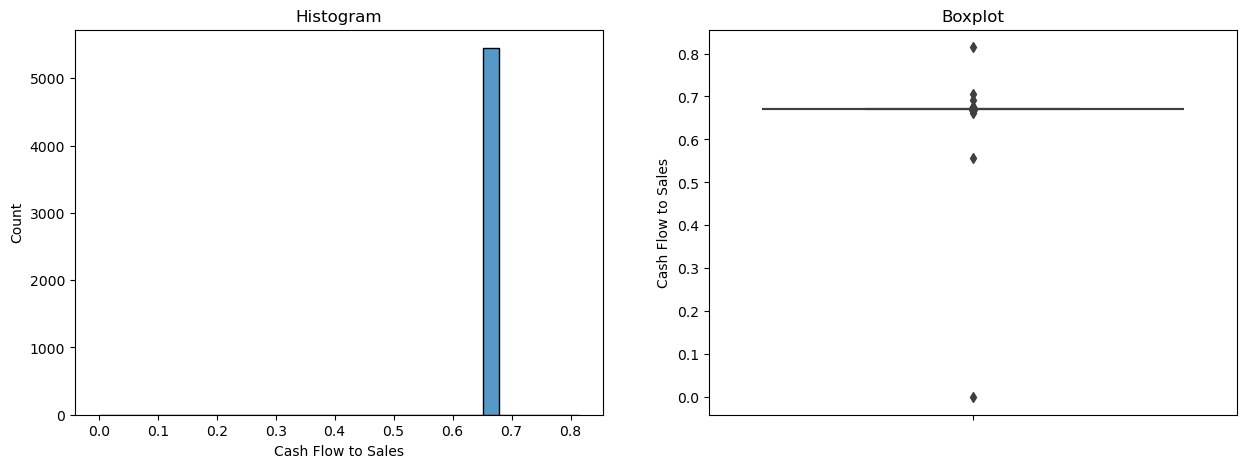


Cash Flow to Sales - After Capping


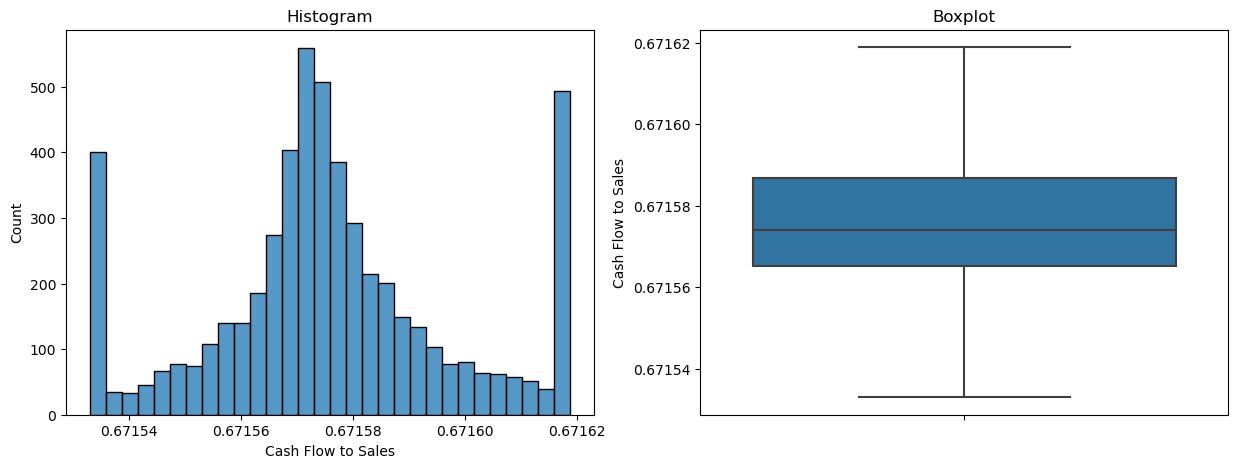

Cash Reinvestment % - Before Capping


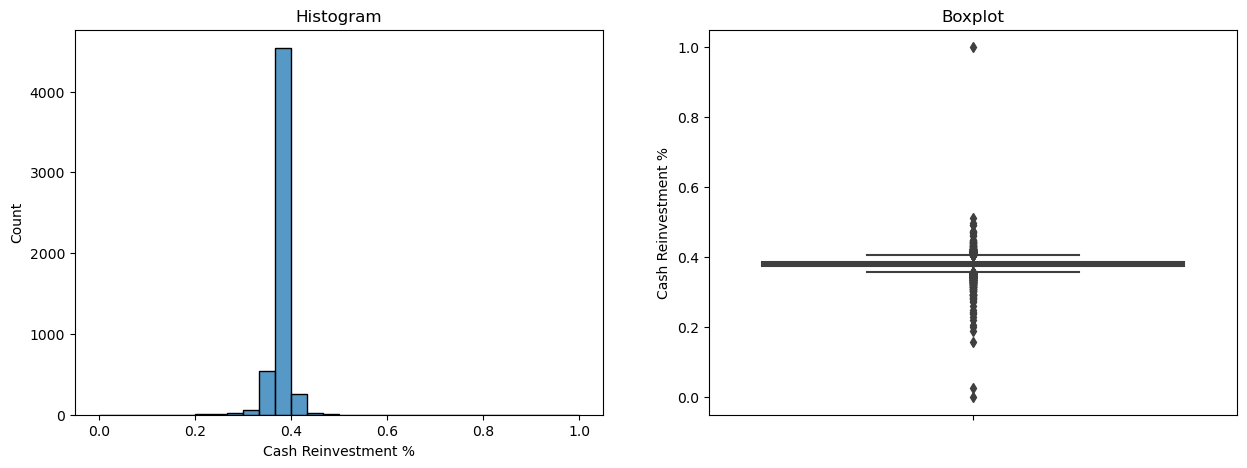


Cash Reinvestment % - After Capping


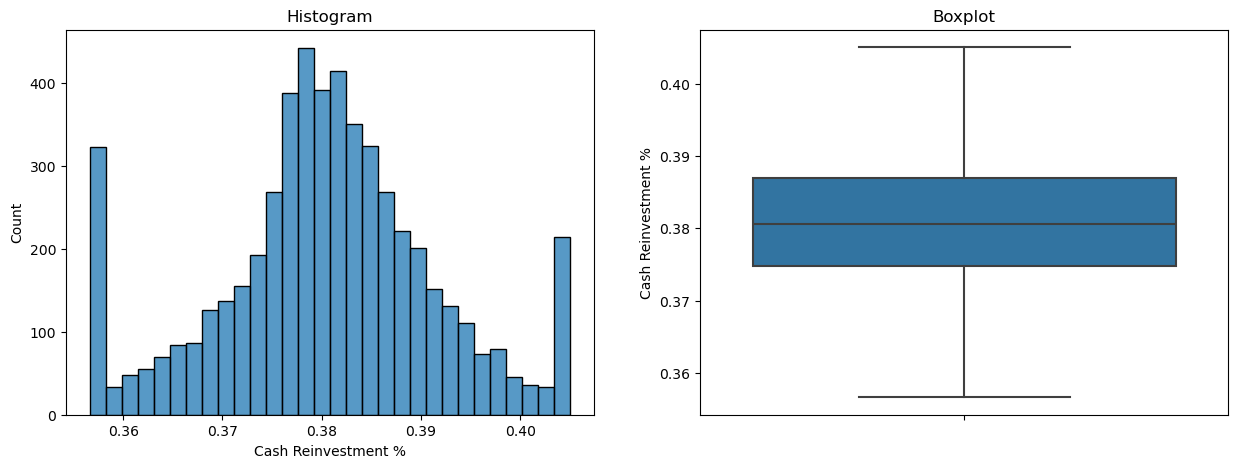

Cash flow rate - Before Capping


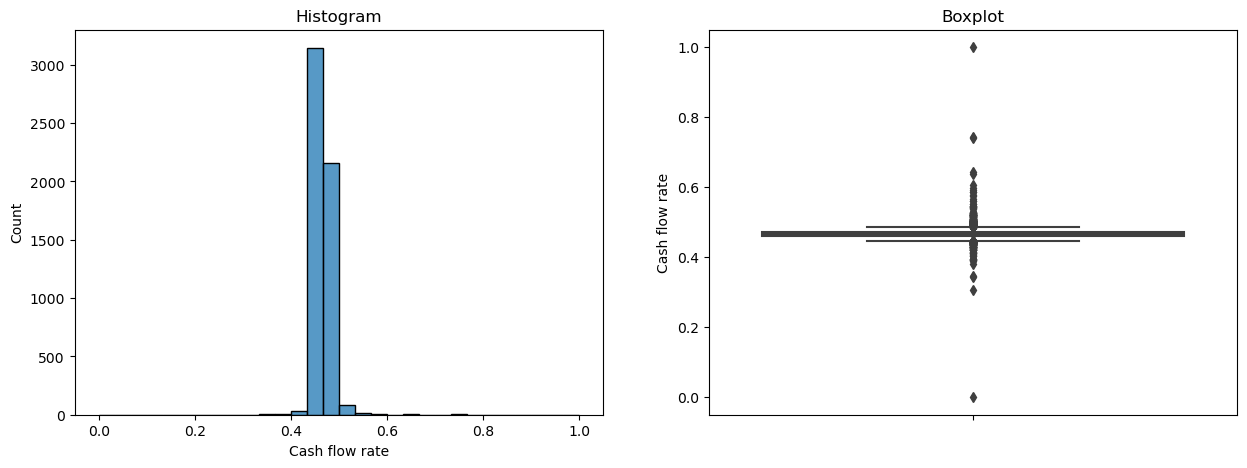


Cash flow rate - After Capping


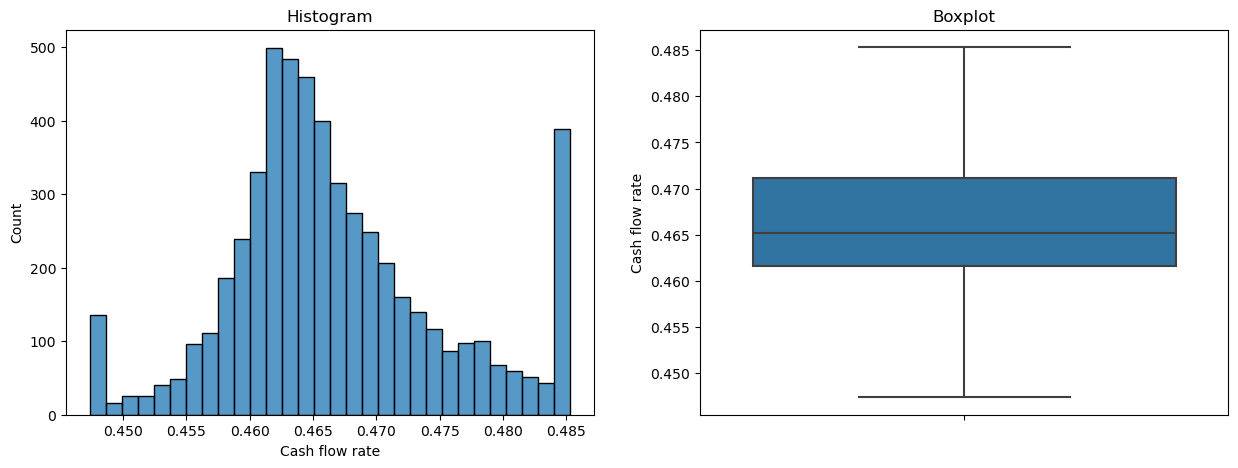

Cash/Current Liability - Before Capping


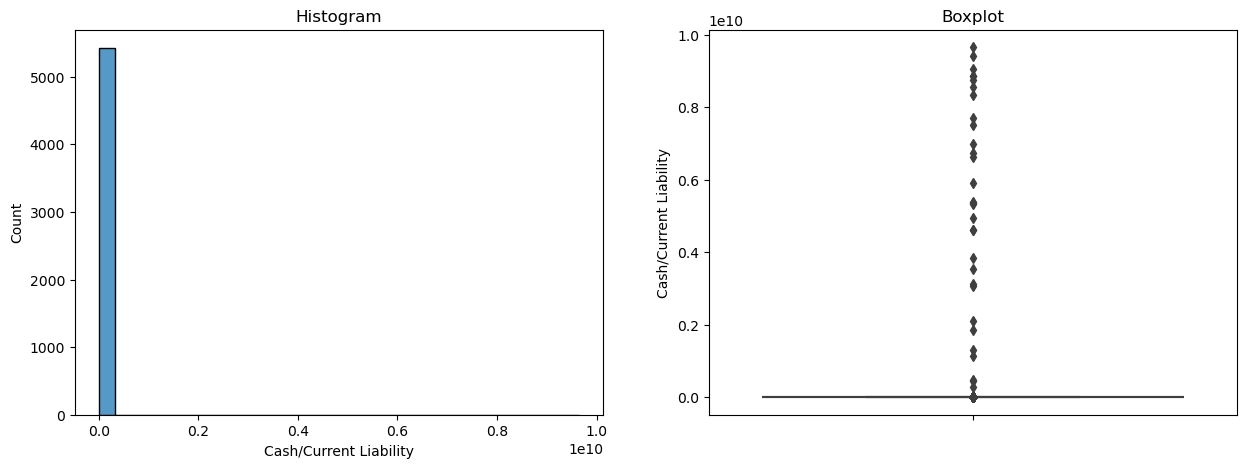


Cash/Current Liability - After Capping


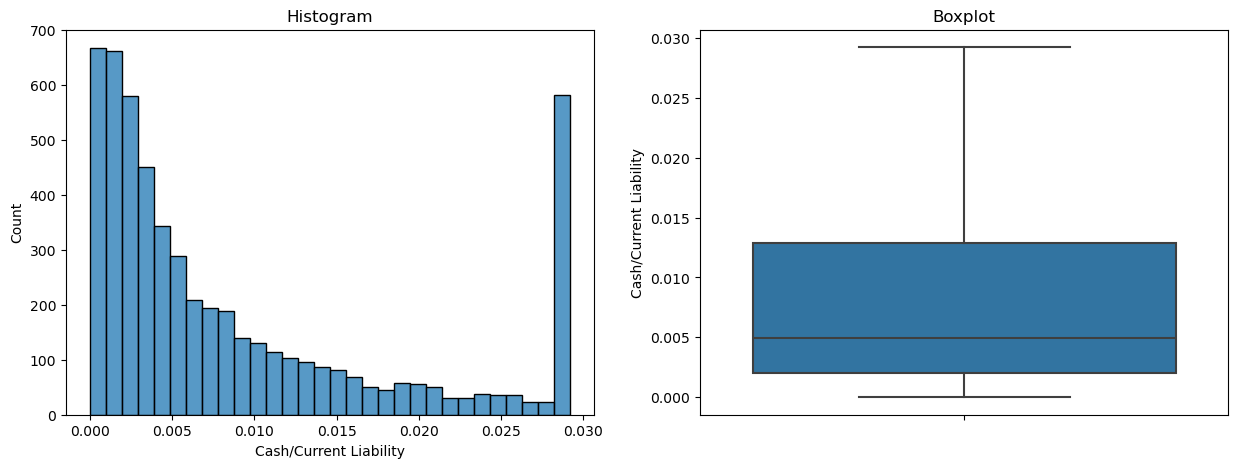

Cash/Total Assets - Before Capping


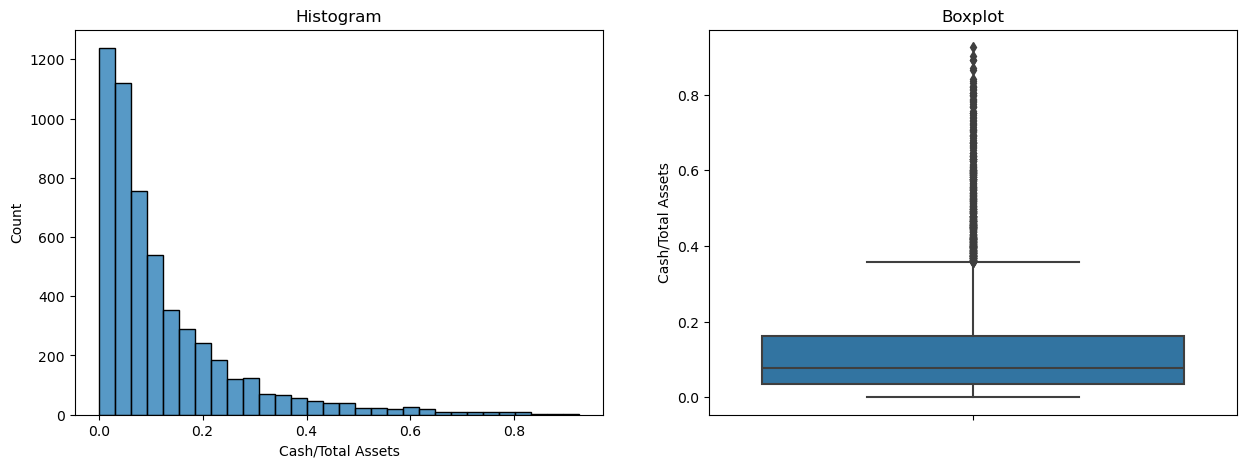


Cash/Total Assets - After Capping


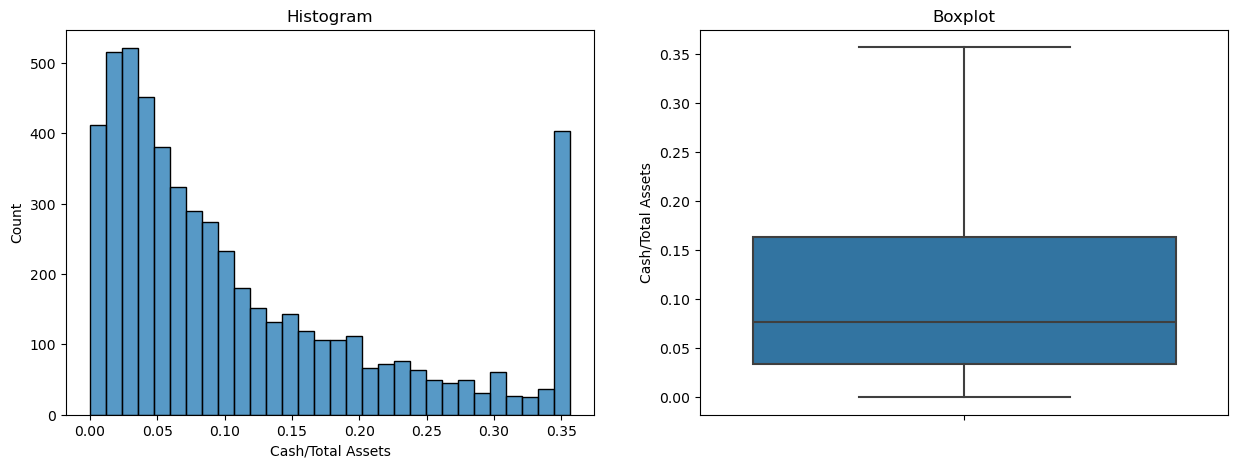

Continuous Net Profit Growth Rate - Before Capping


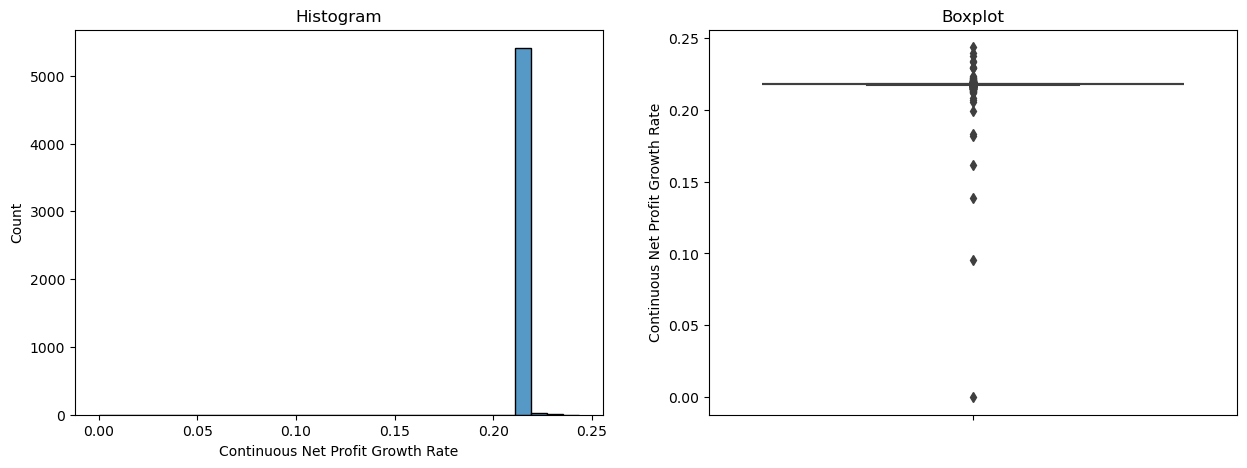


Continuous Net Profit Growth Rate - After Capping


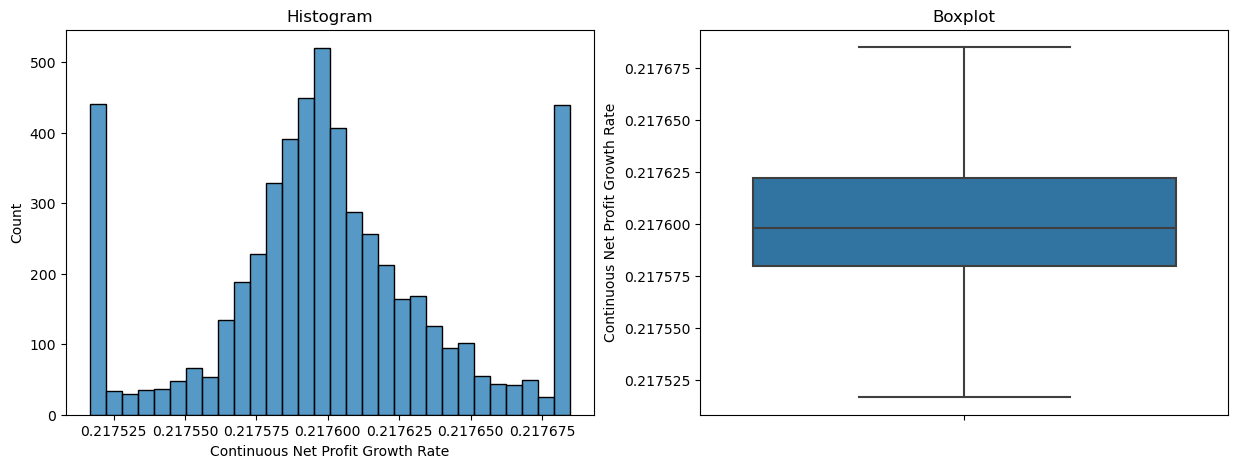

Continuous interest rate (after tax) - Before Capping


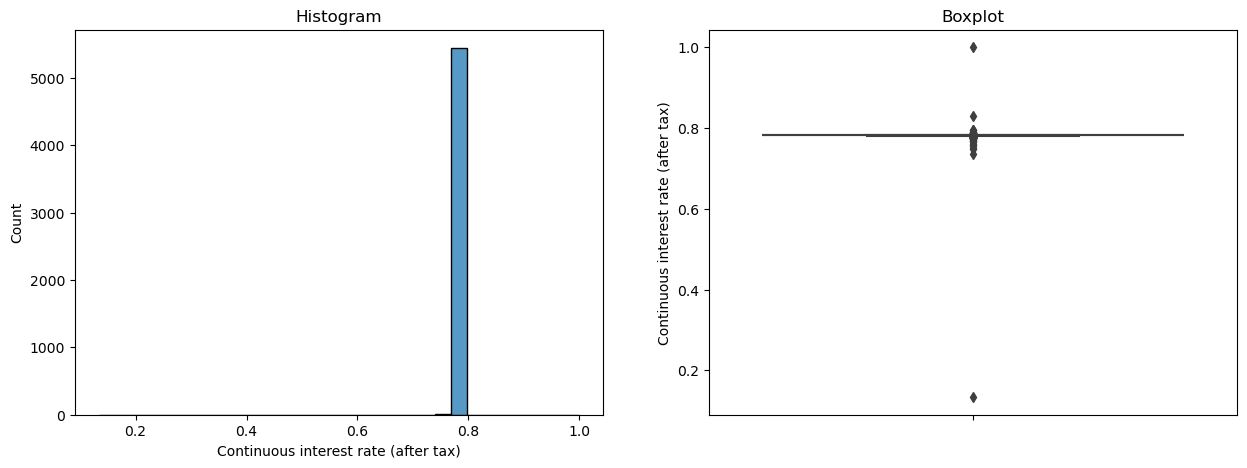


Continuous interest rate (after tax) - After Capping


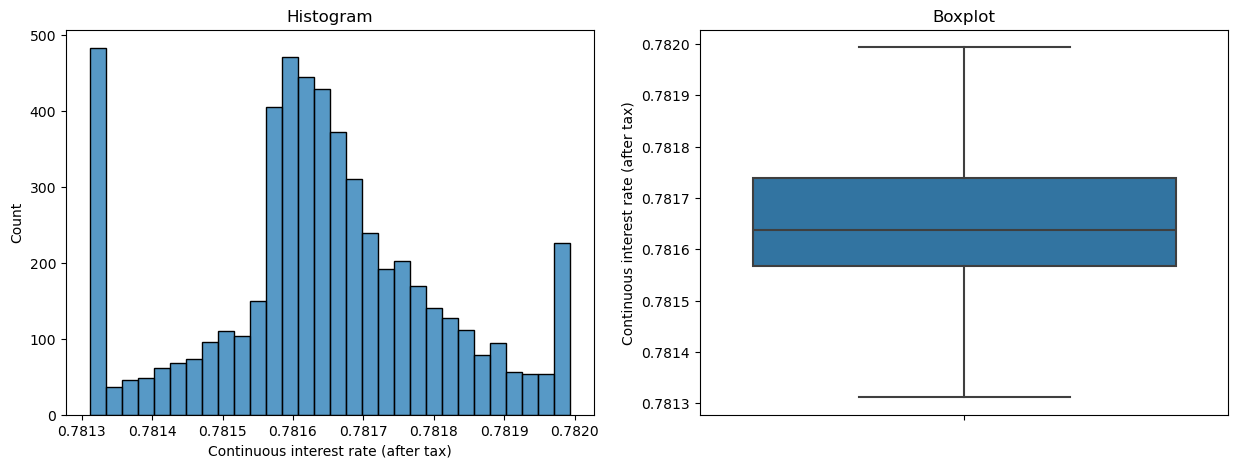

Current Liabilities/Equity - Before Capping


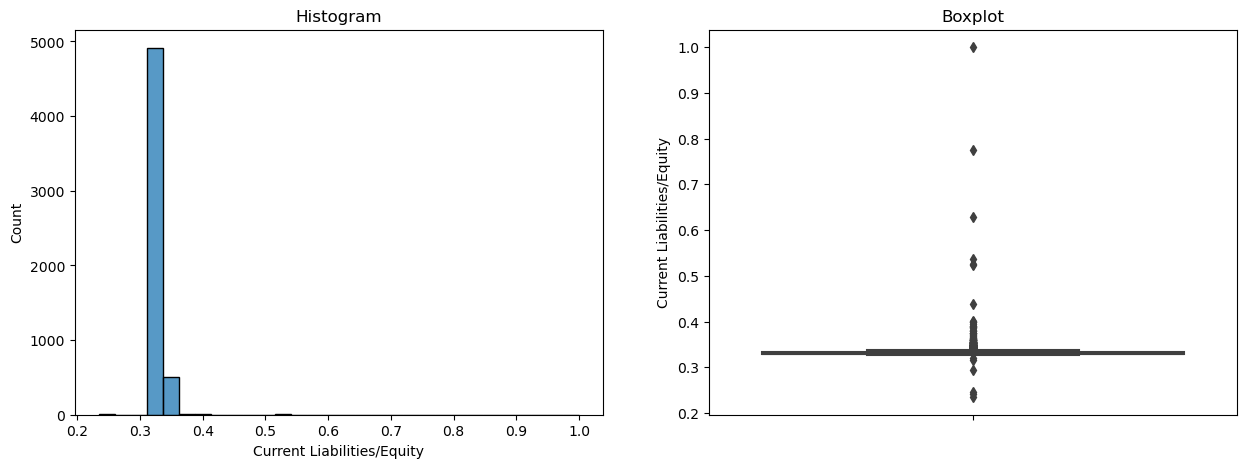


Current Liabilities/Equity - After Capping


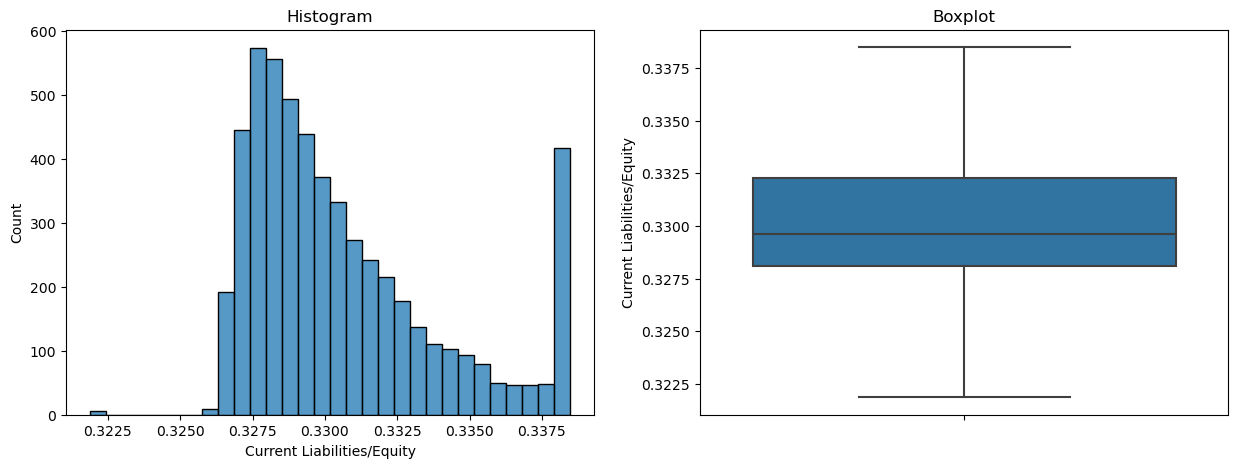

Current Liability to Assets - Before Capping


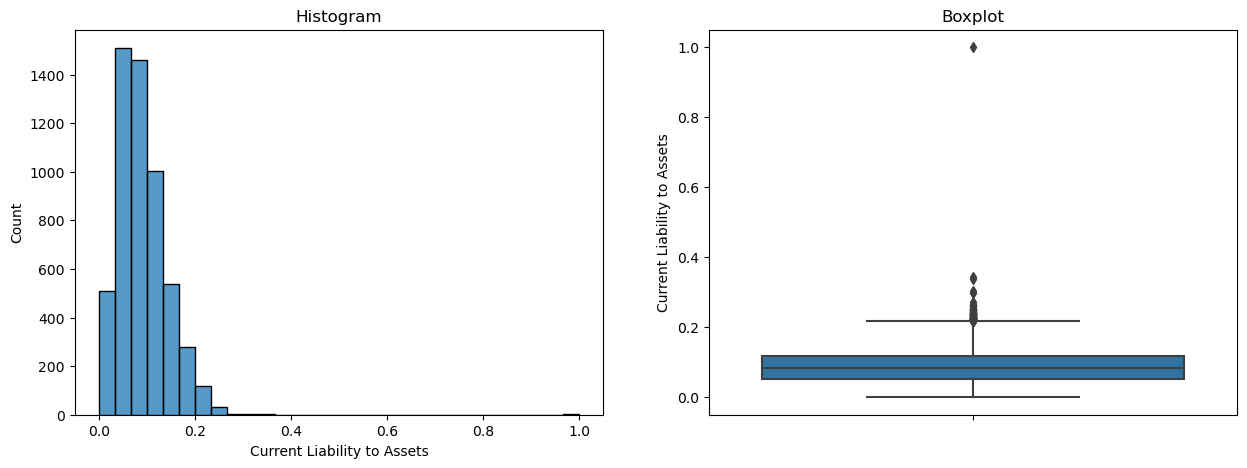


Current Liability to Assets - After Capping


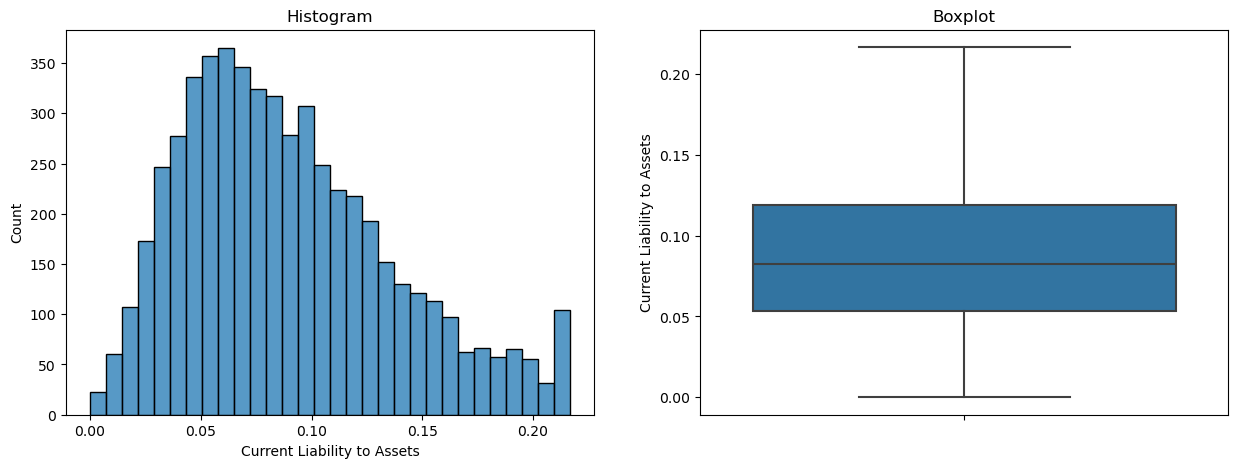

Current Liability to Current Assets - Before Capping


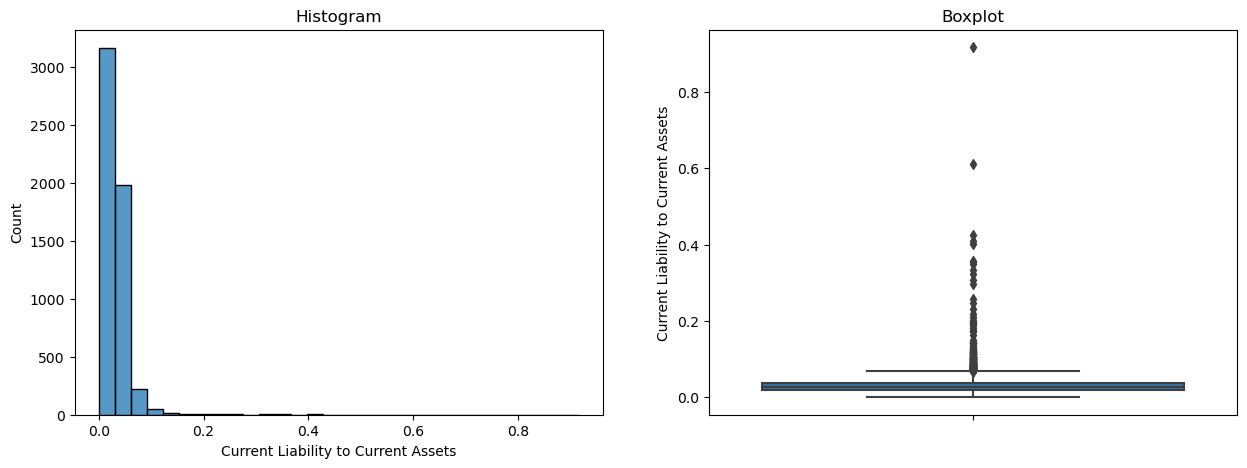


Current Liability to Current Assets - After Capping


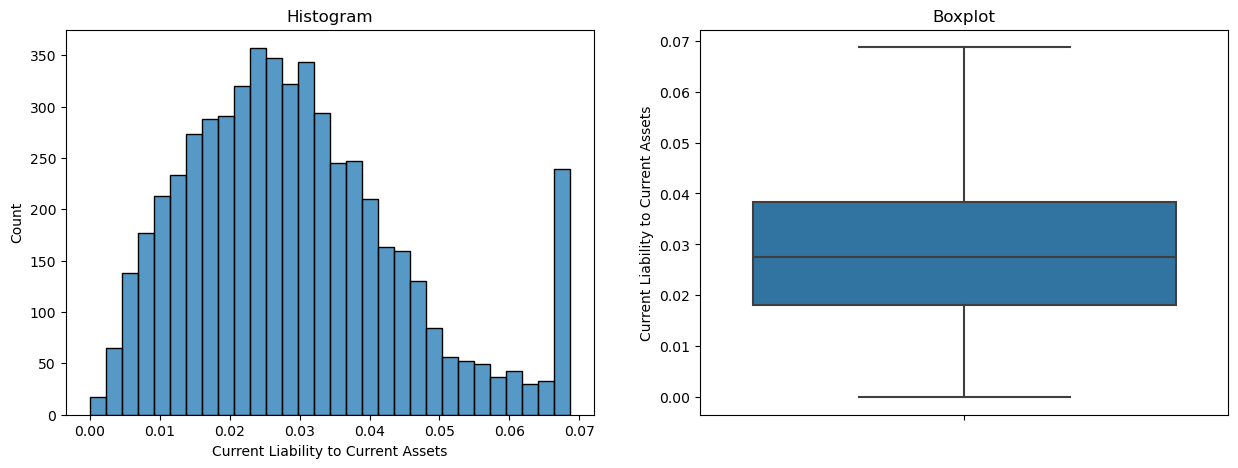

Current Liability to Equity - Before Capping


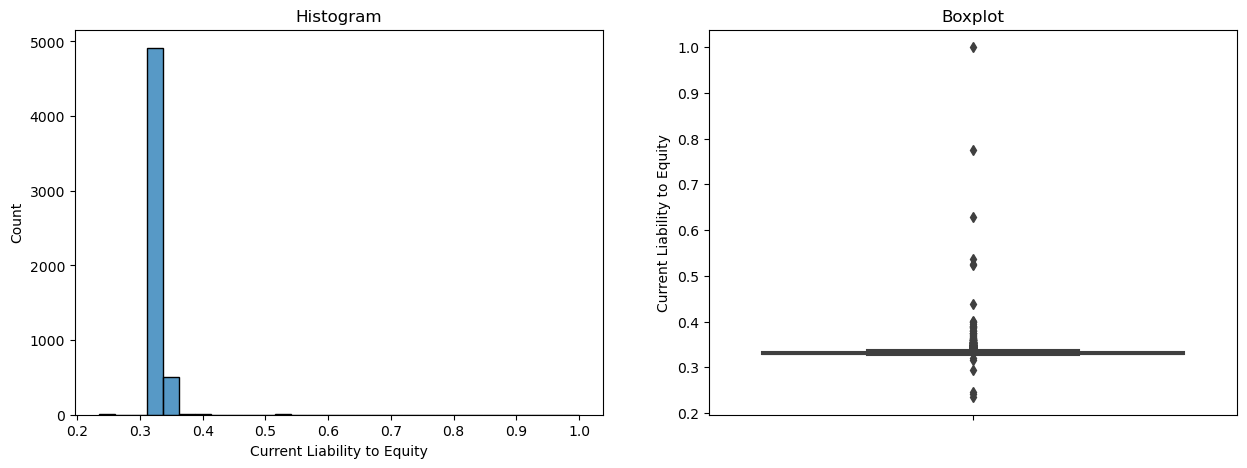


Current Liability to Equity - After Capping


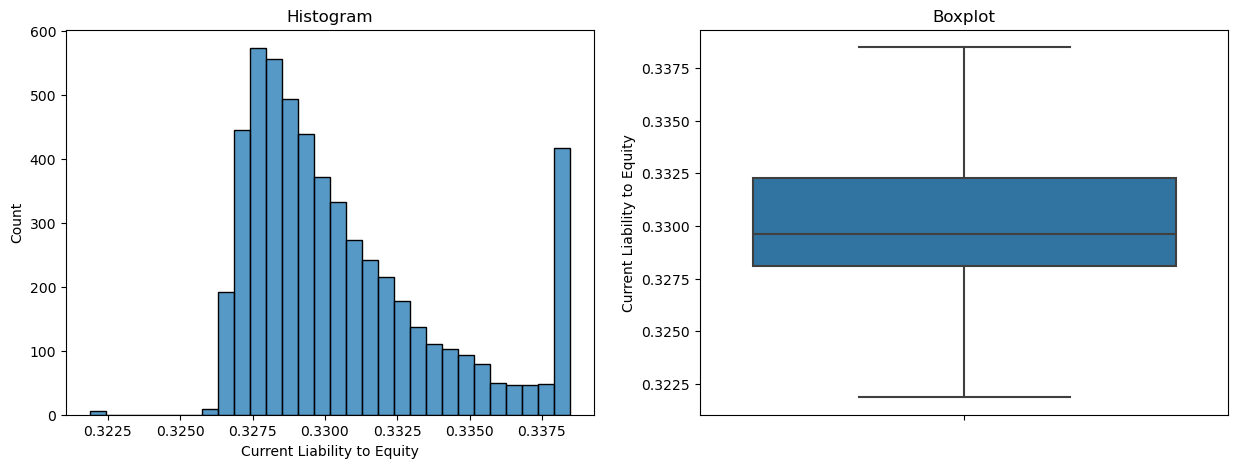

Current Ratio - Before Capping


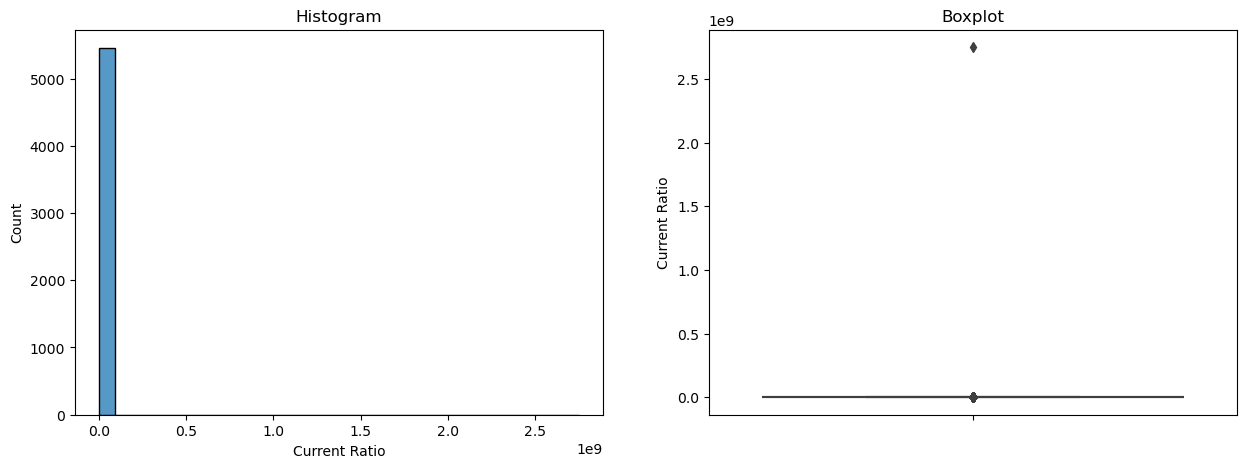


Current Ratio - After Capping


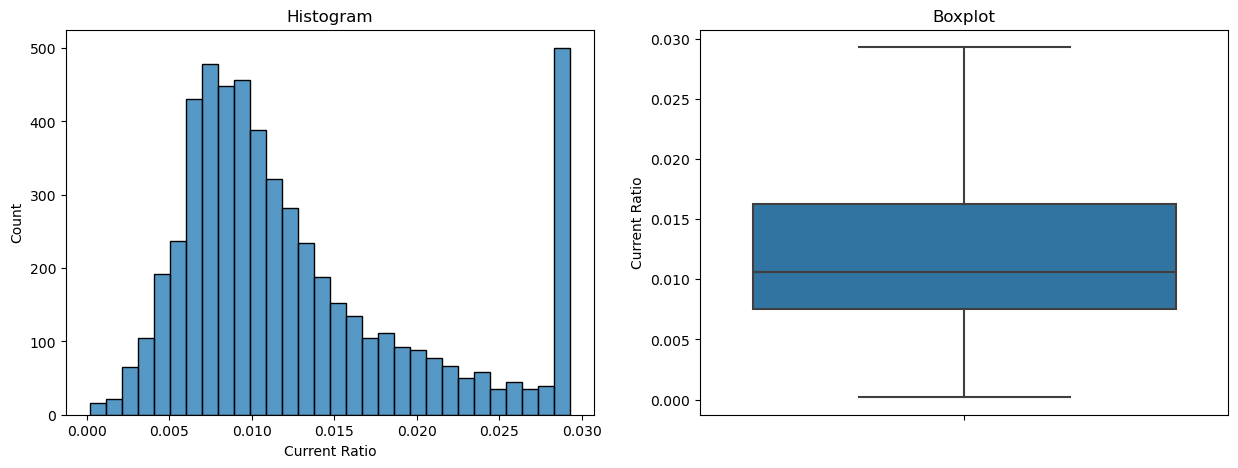

Debt ratio % - Before Capping


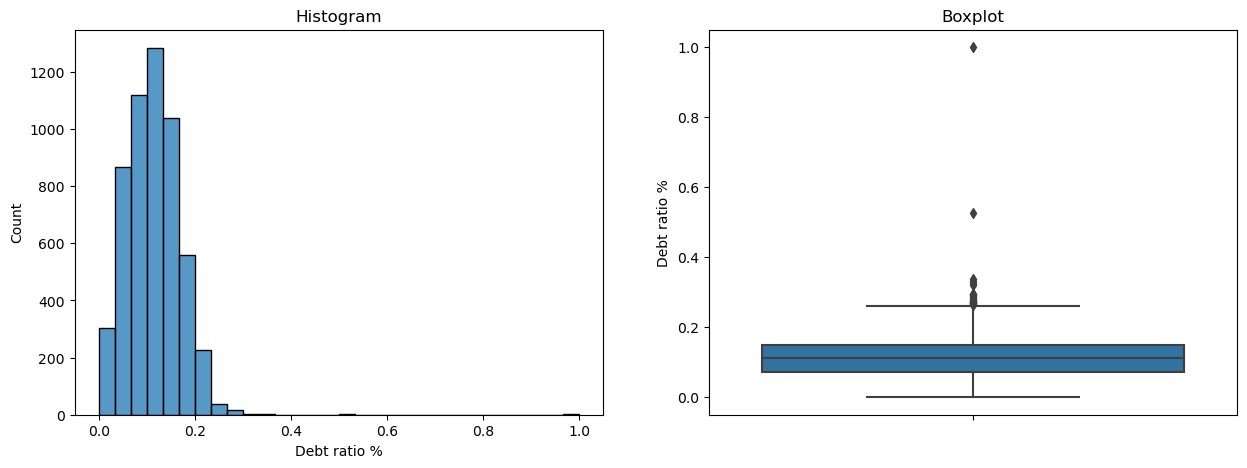


Debt ratio % - After Capping


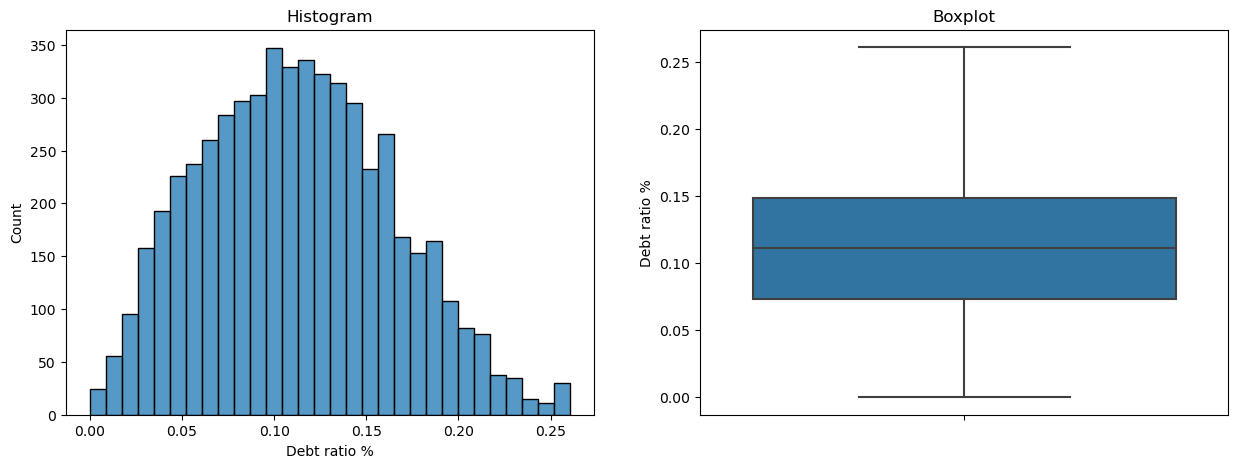

Degree of Financial Leverage (DFL) - Before Capping


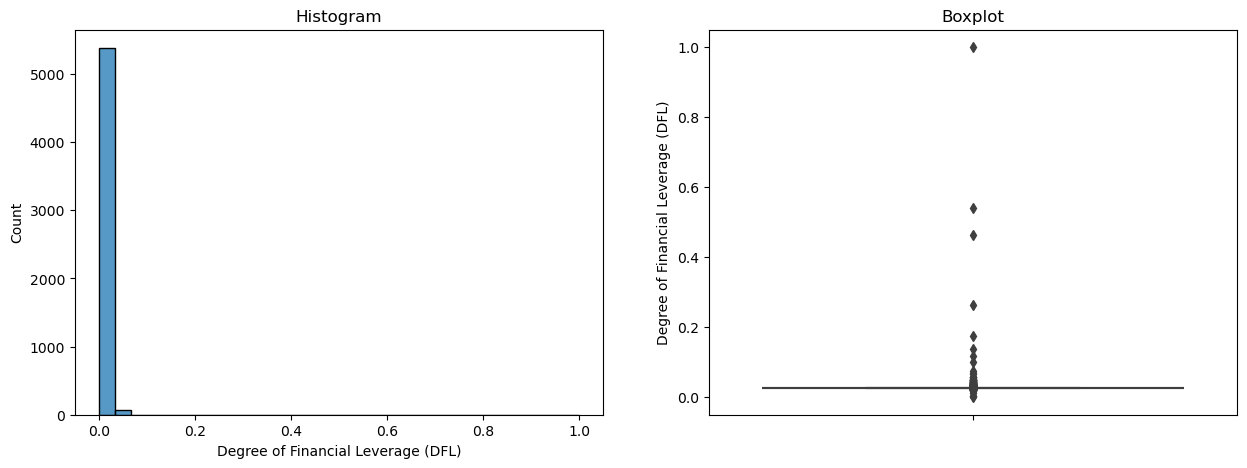


Degree of Financial Leverage (DFL) - After Capping


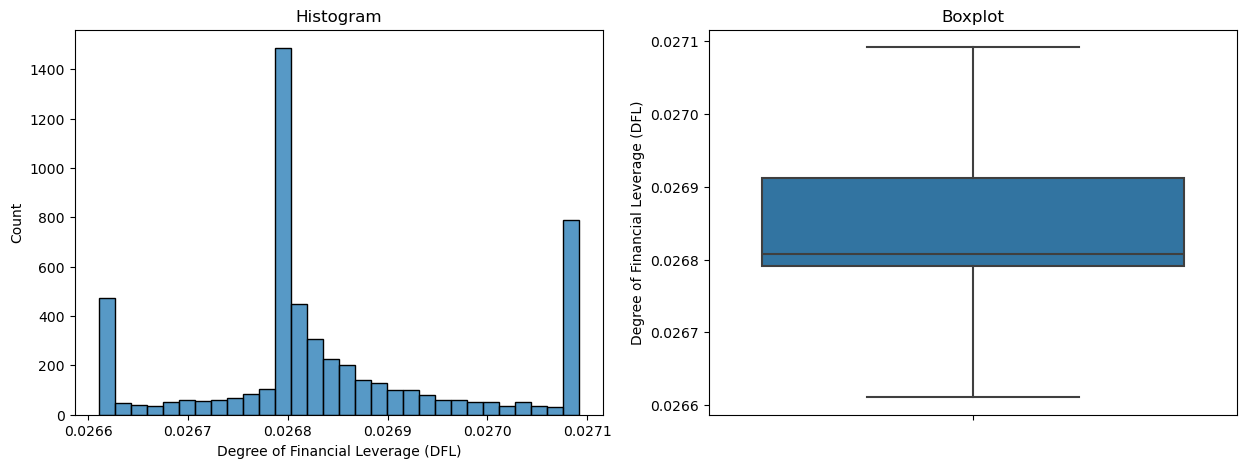

Equity to Liability - Before Capping


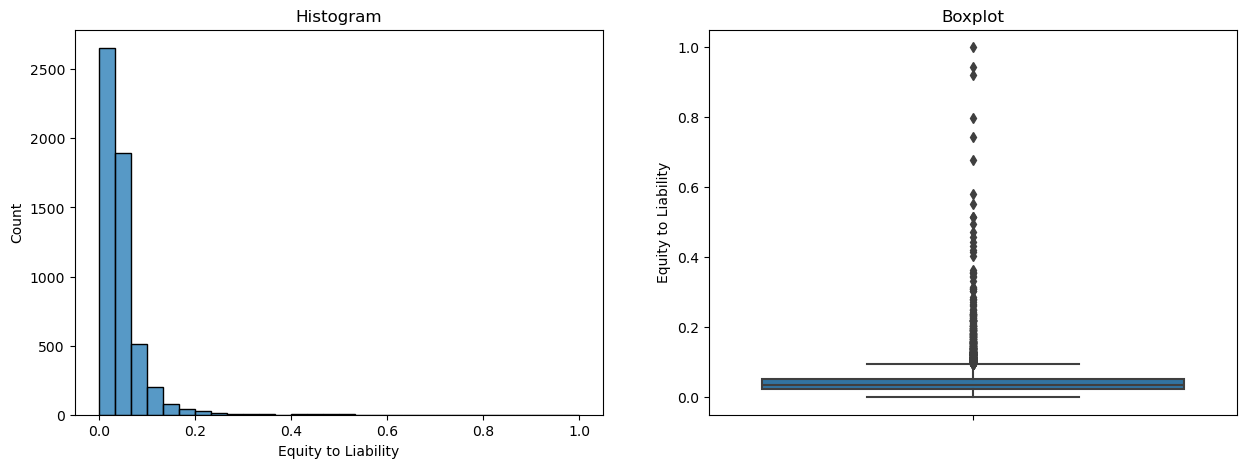


Equity to Liability - After Capping


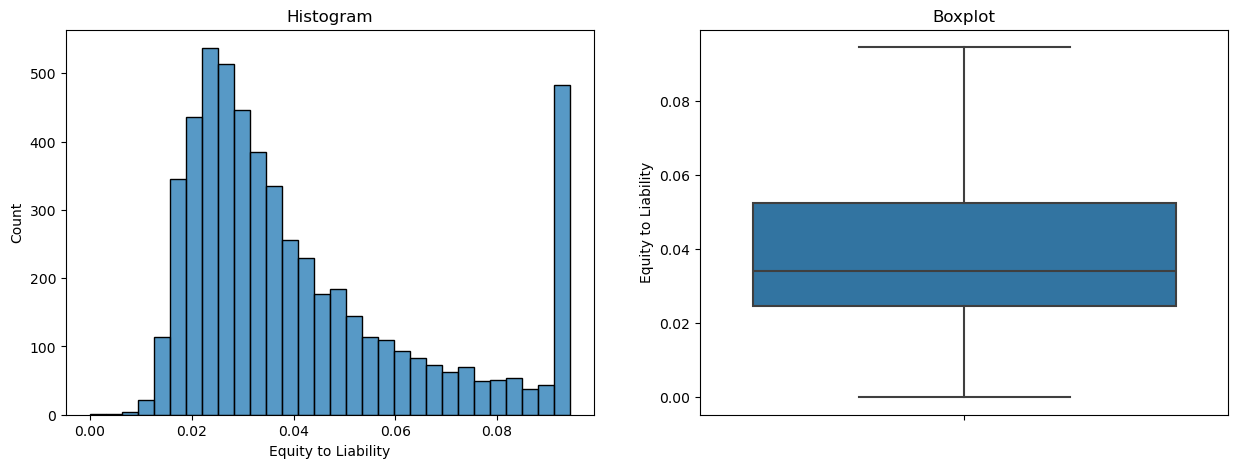

Equity to Long-term Liability - Before Capping


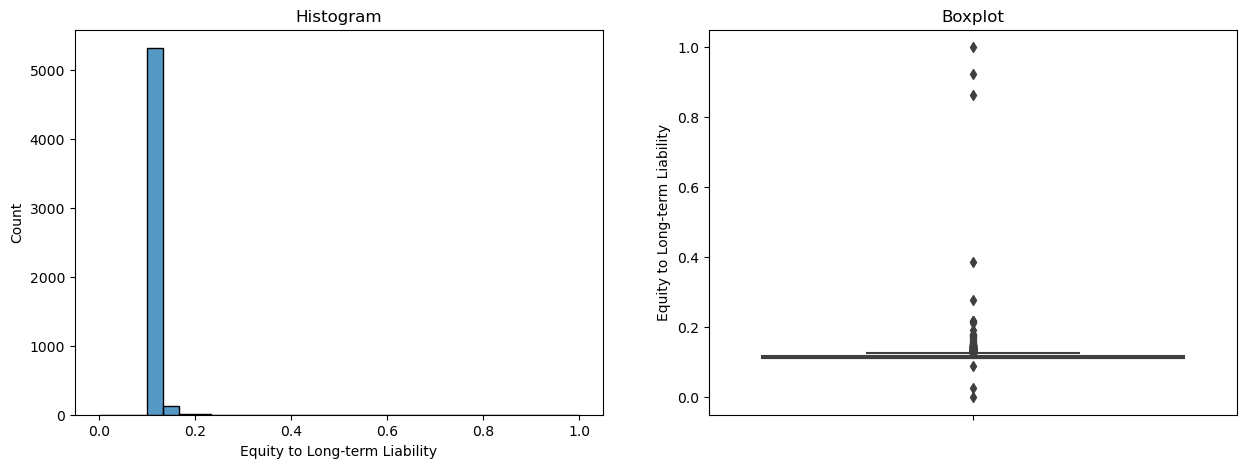


Equity to Long-term Liability - After Capping


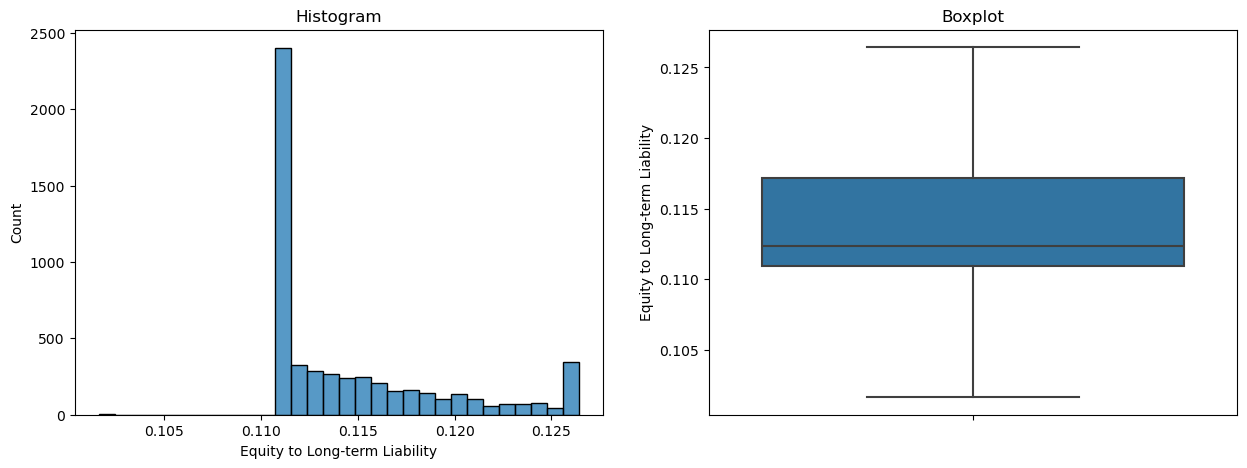

Fixed Assets to Assets - Before Capping


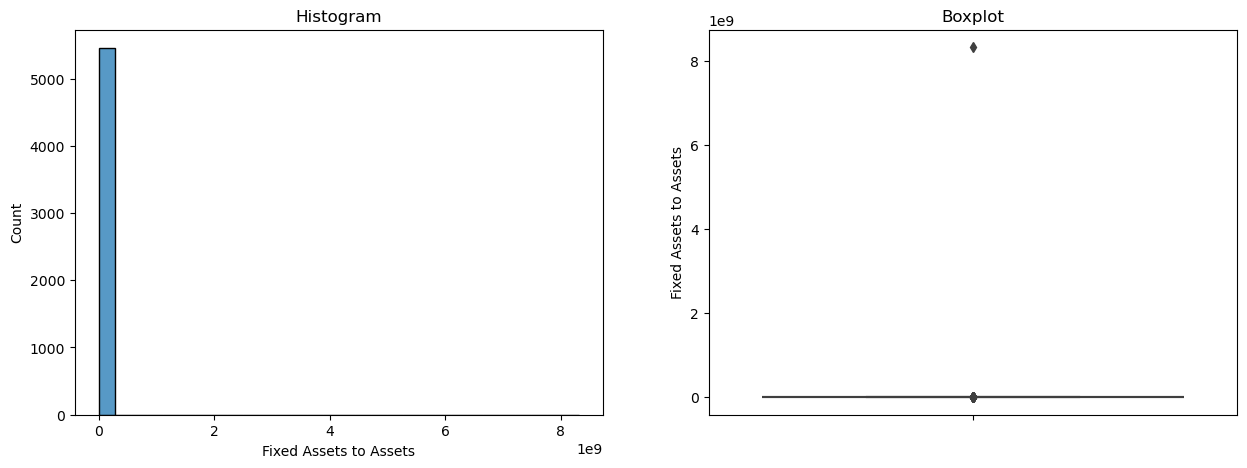


Fixed Assets to Assets - After Capping


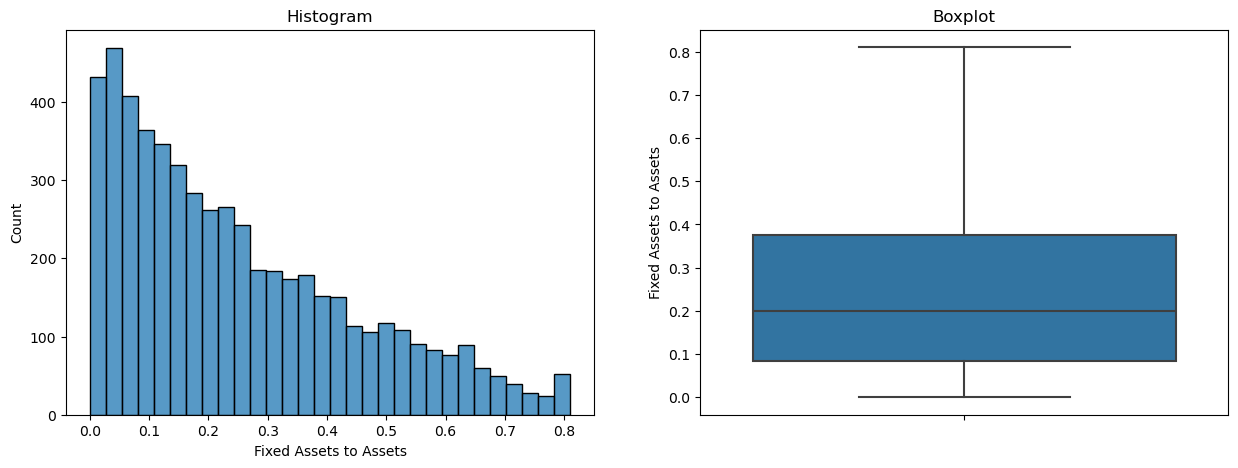

Gross Profit to Sales - Before Capping


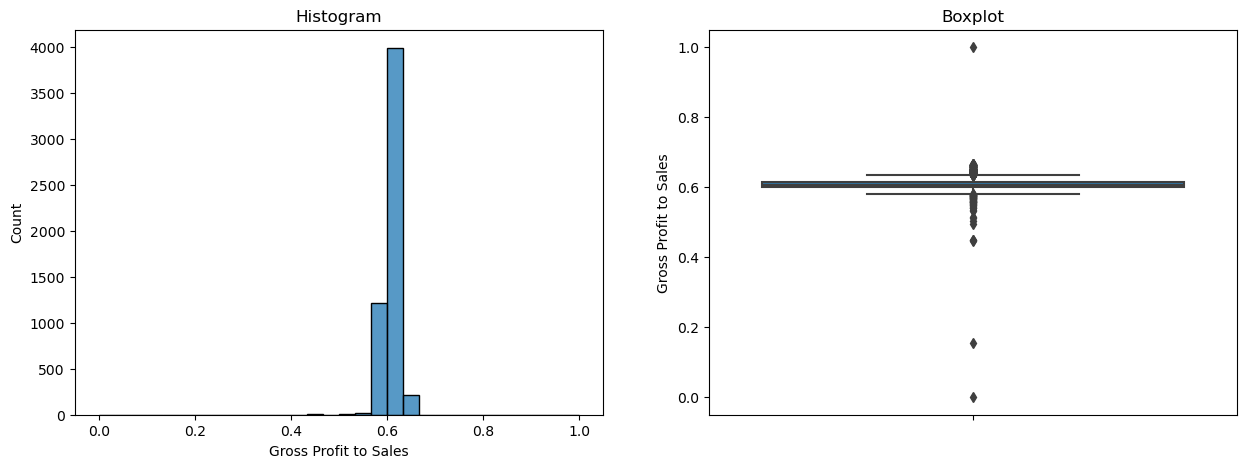


Gross Profit to Sales - After Capping


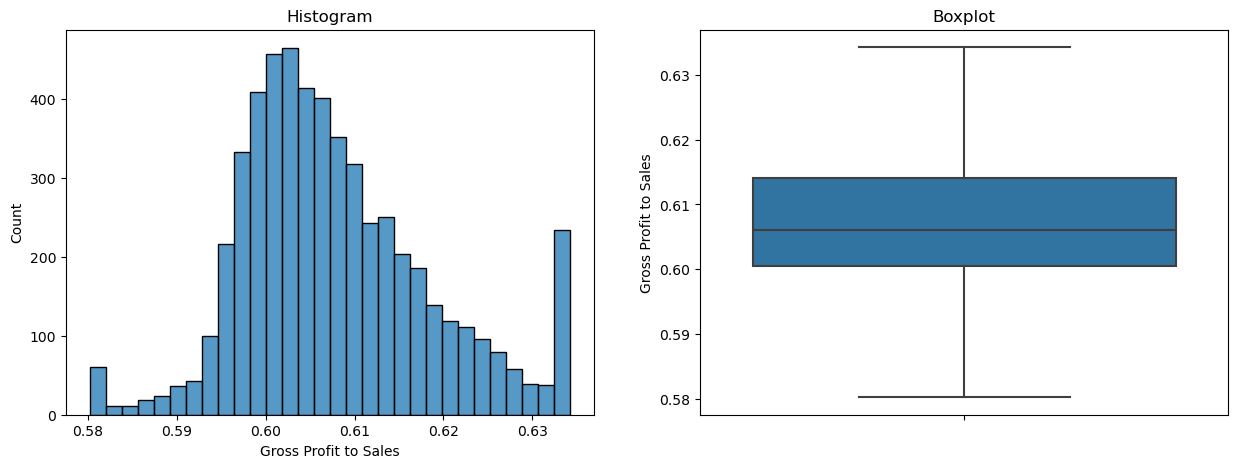

Interest Coverage Ratio (Interest expense to EBIT) - Before Capping


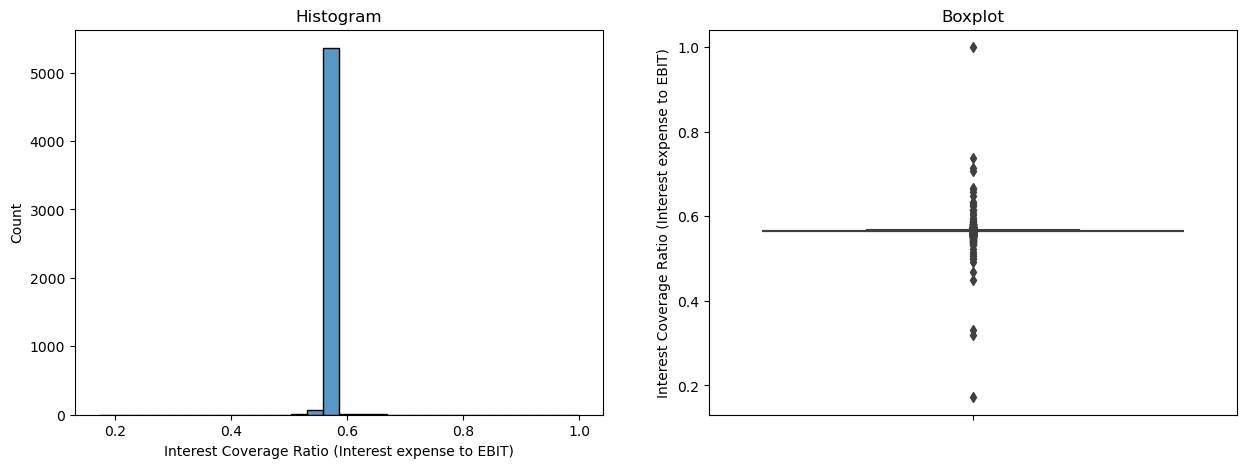


Interest Coverage Ratio (Interest expense to EBIT) - After Capping


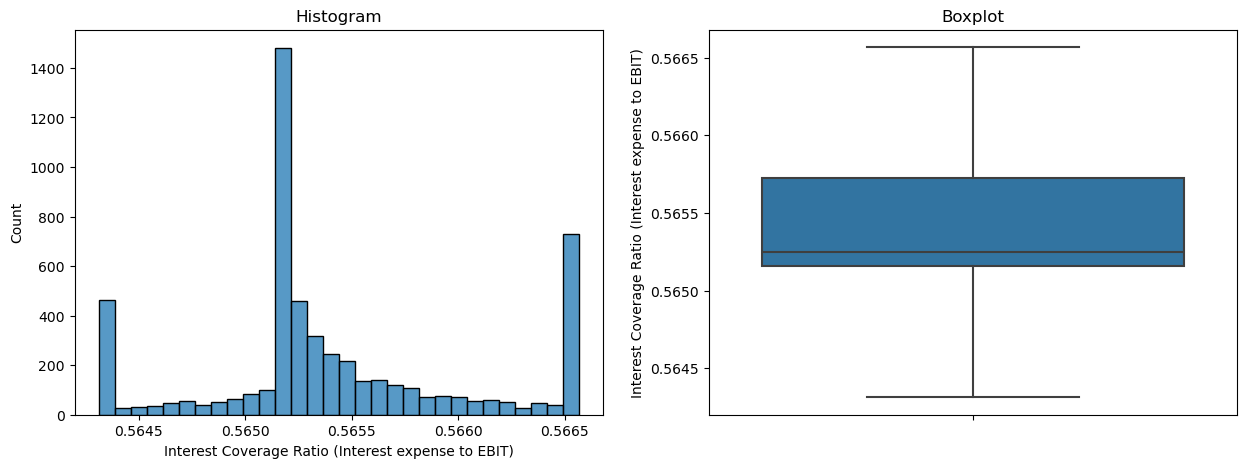

Interest Expense Ratio - Before Capping


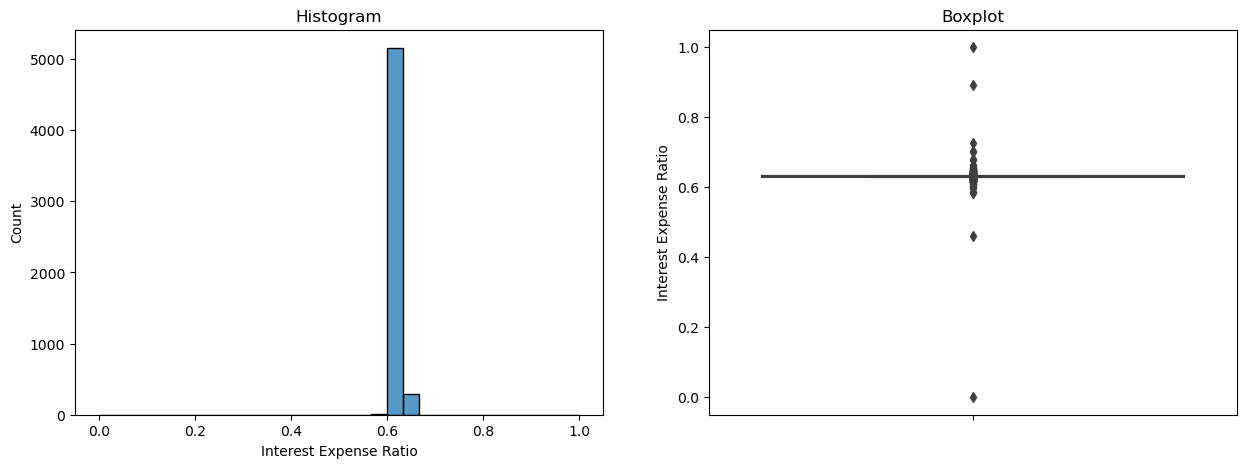


Interest Expense Ratio - After Capping


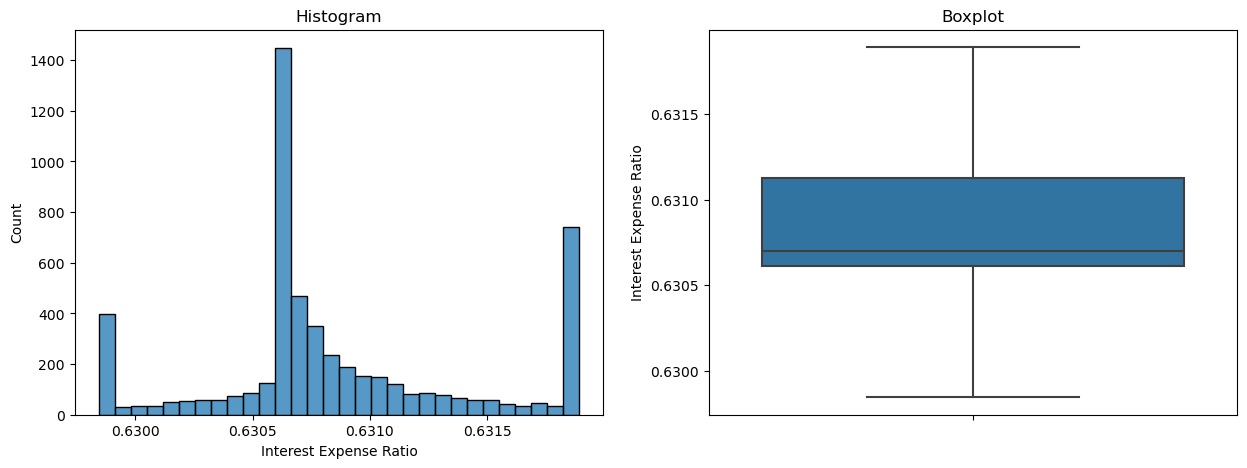

Interest-bearing debt interest rate - Before Capping


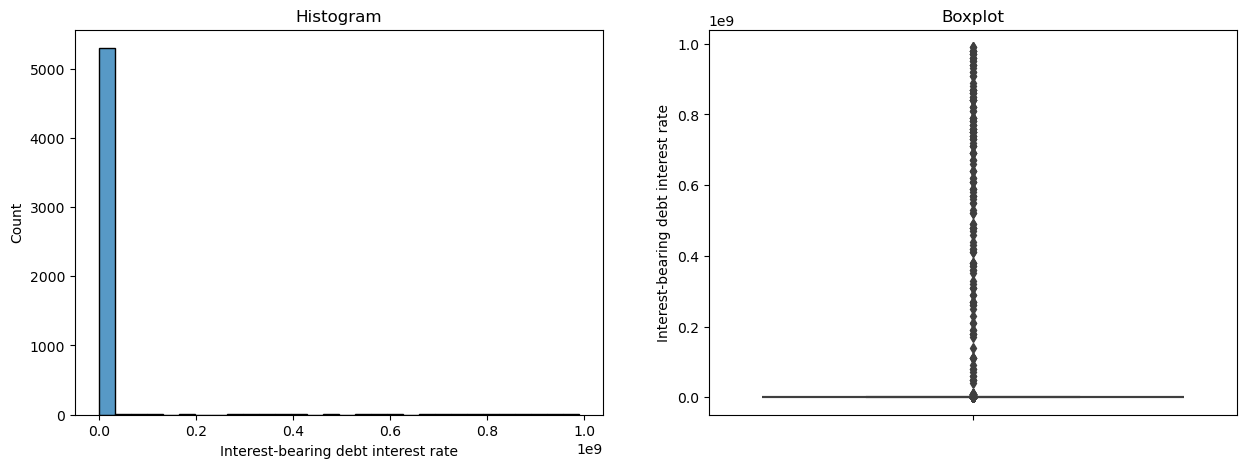


Interest-bearing debt interest rate - After Capping


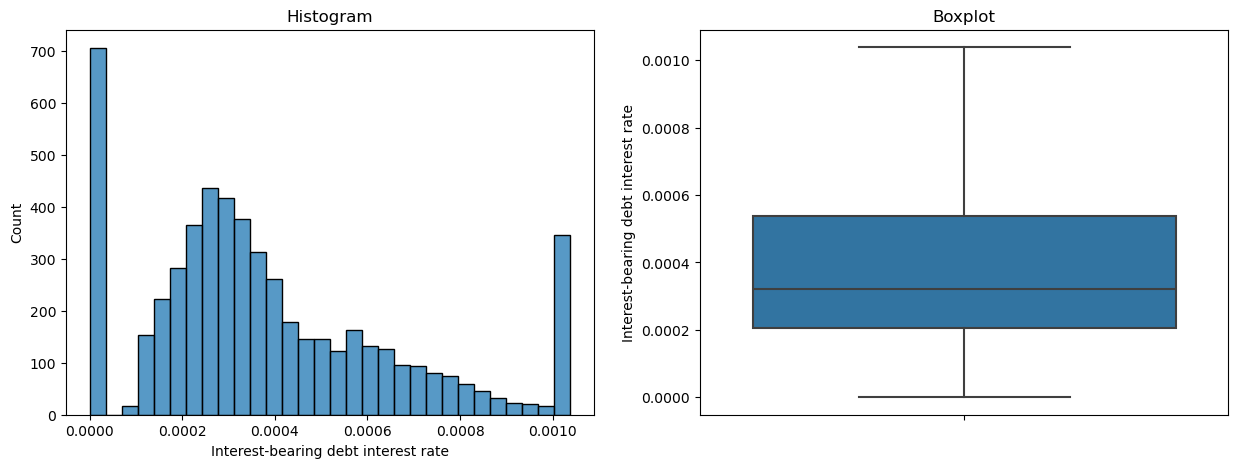

Inventory and accounts receivable/Net value - Before Capping


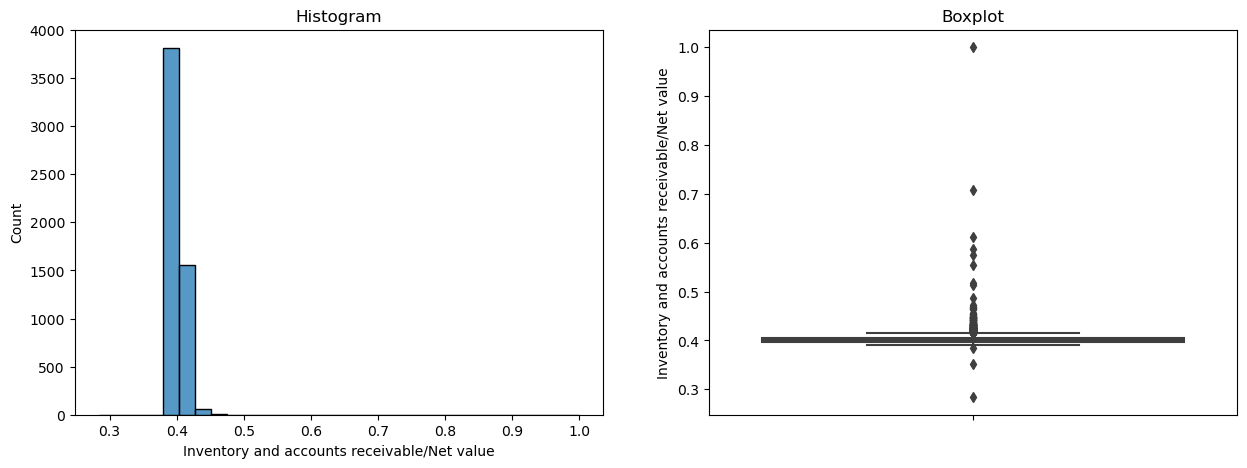


Inventory and accounts receivable/Net value - After Capping


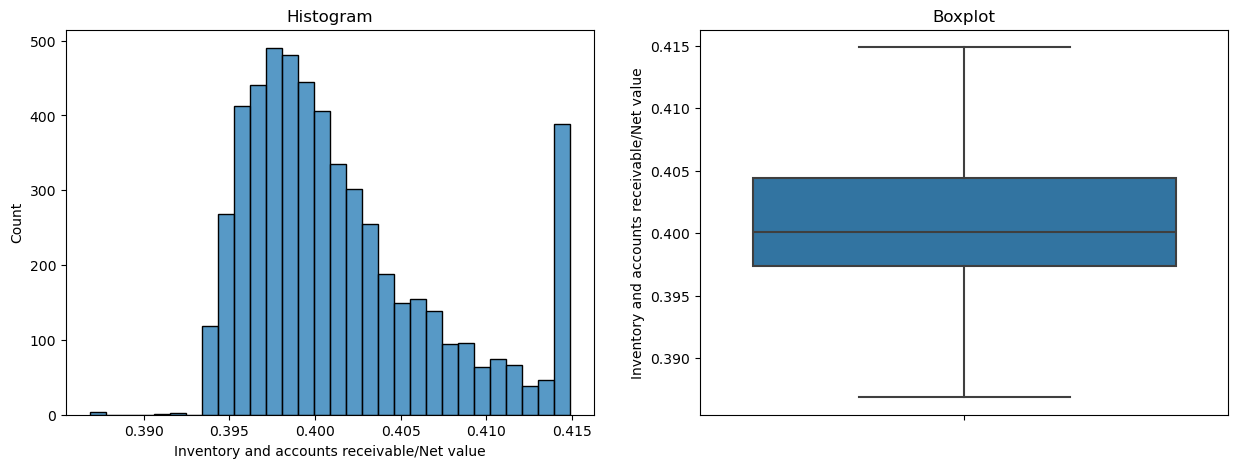

Inventory/Current Liability - Before Capping


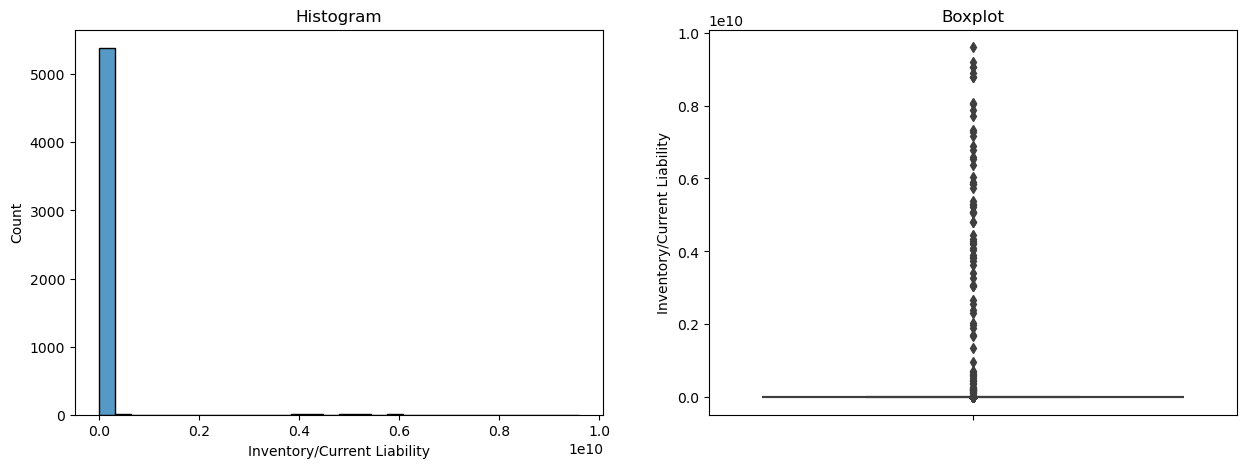


Inventory/Current Liability - After Capping


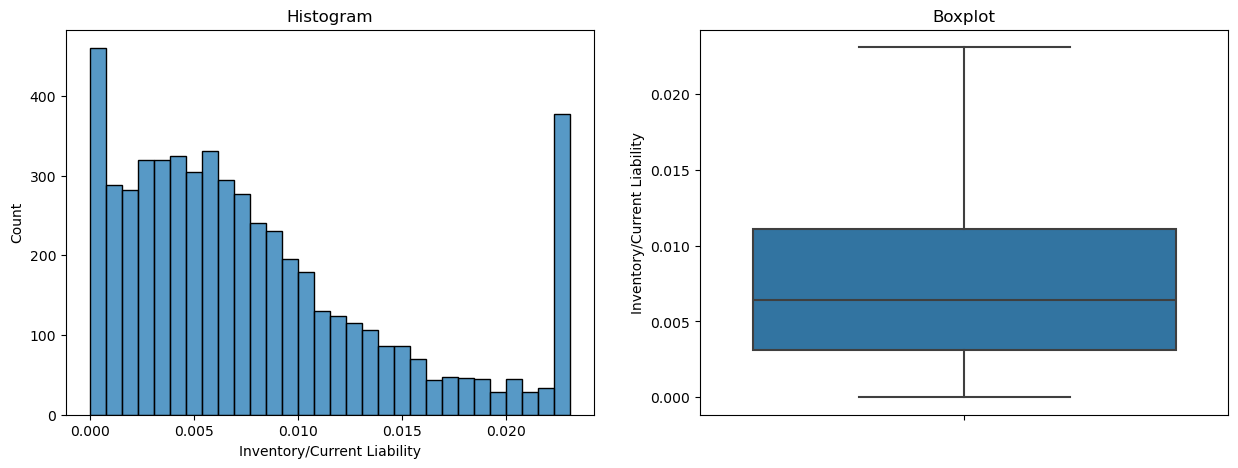

Inventory/Working Capital - Before Capping


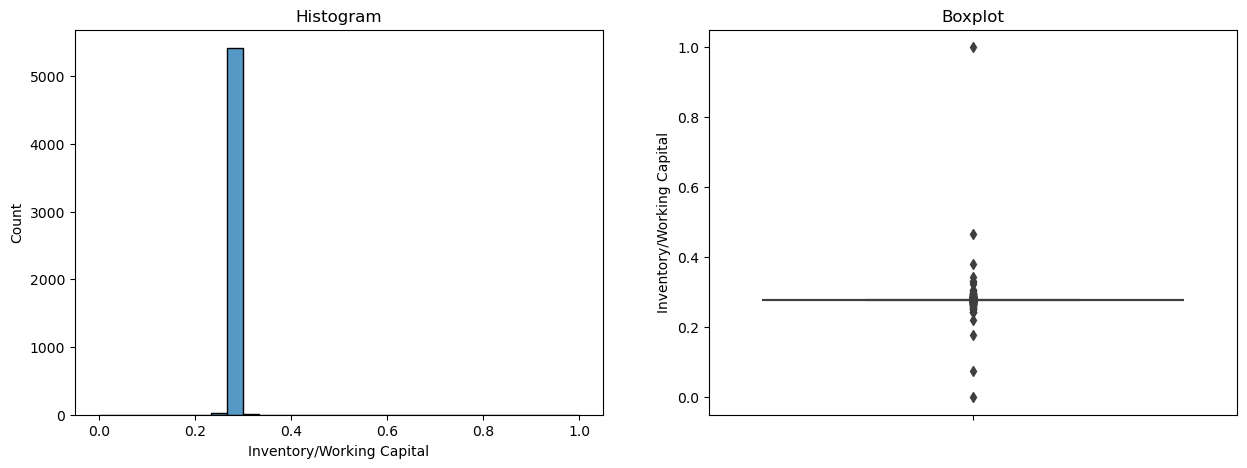


Inventory/Working Capital - After Capping


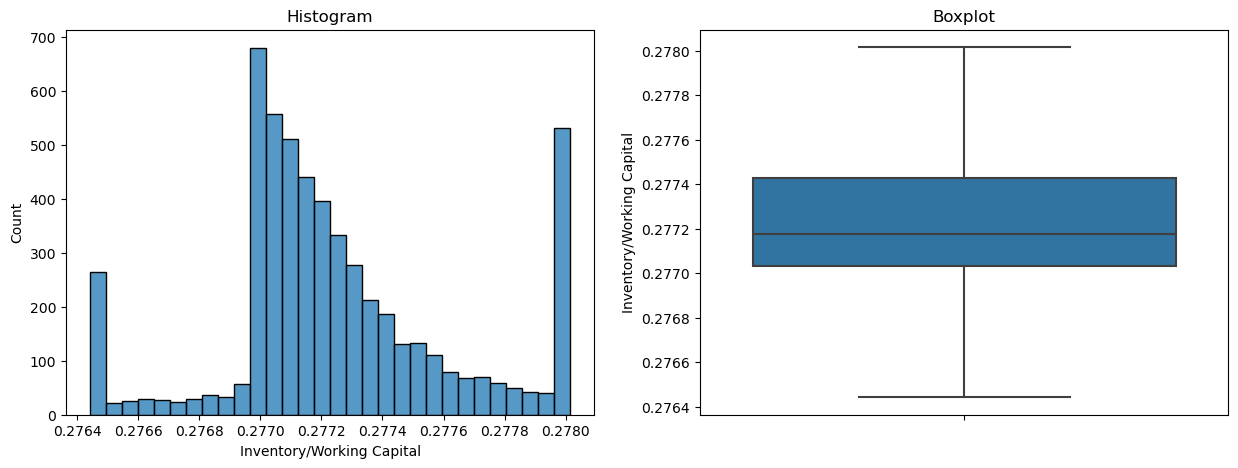

Liability to Equity - Before Capping


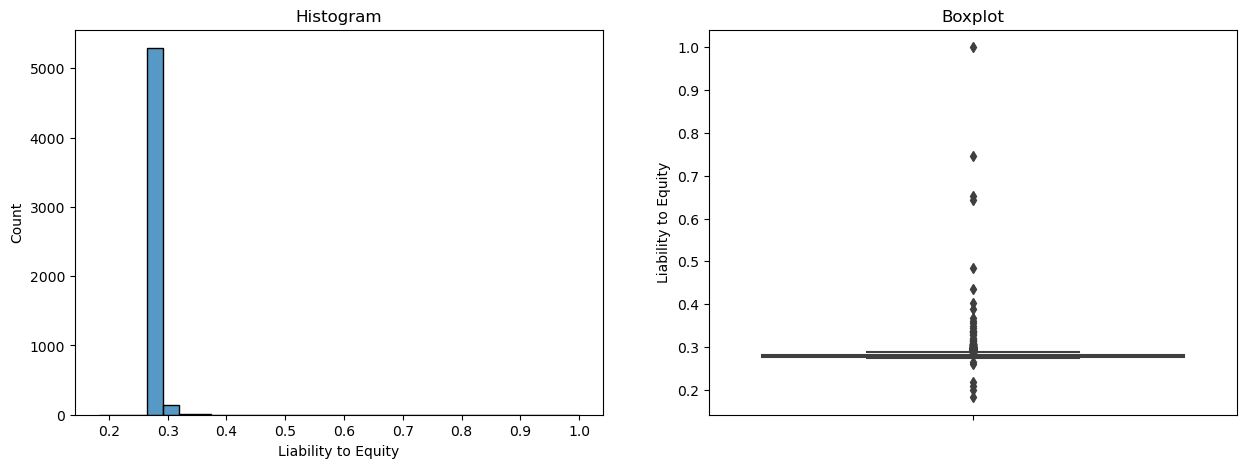


Liability to Equity - After Capping


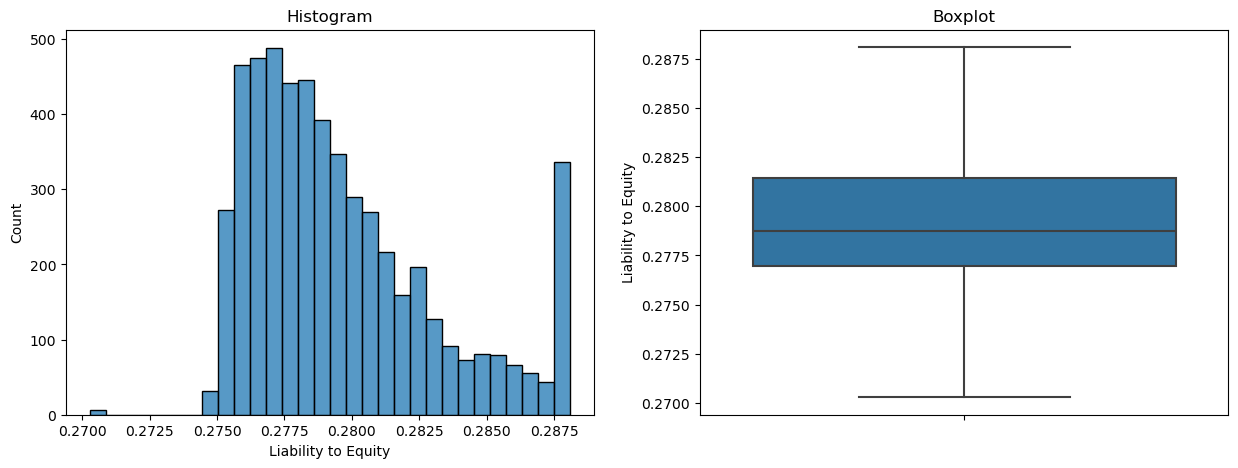

Long-term Liability to Current Assets - Before Capping


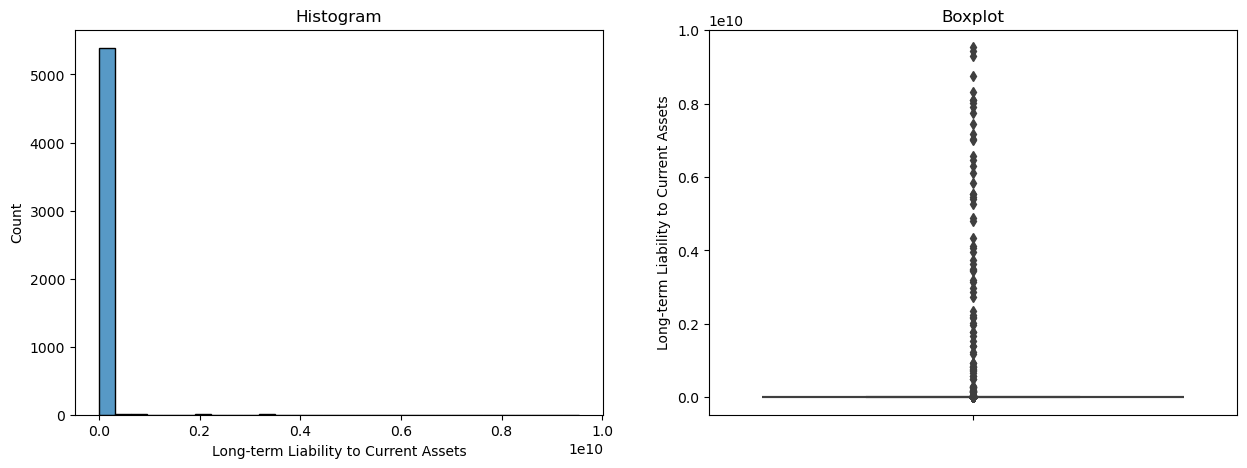


Long-term Liability to Current Assets - After Capping


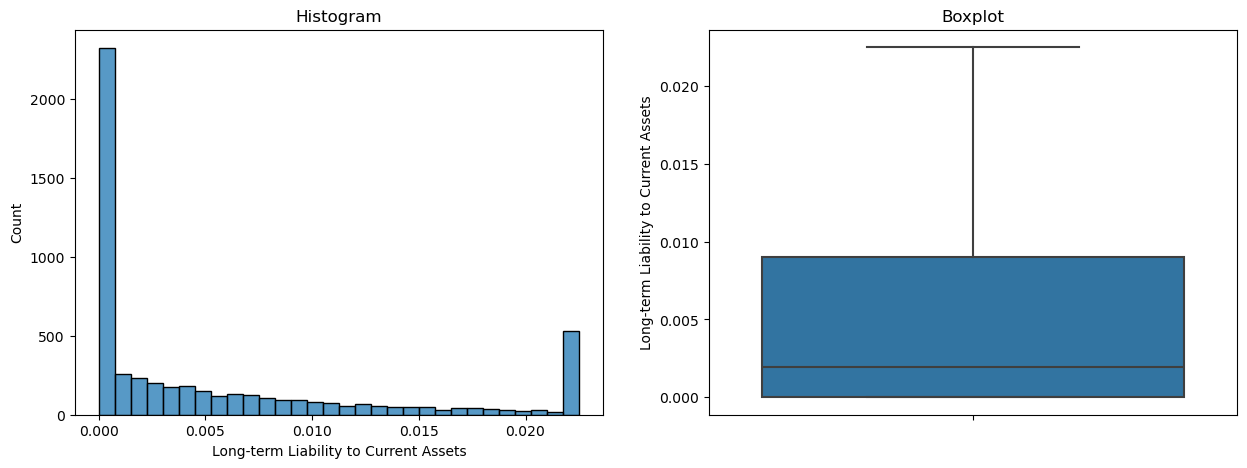

Long-term fund suitability ratio (A) - Before Capping


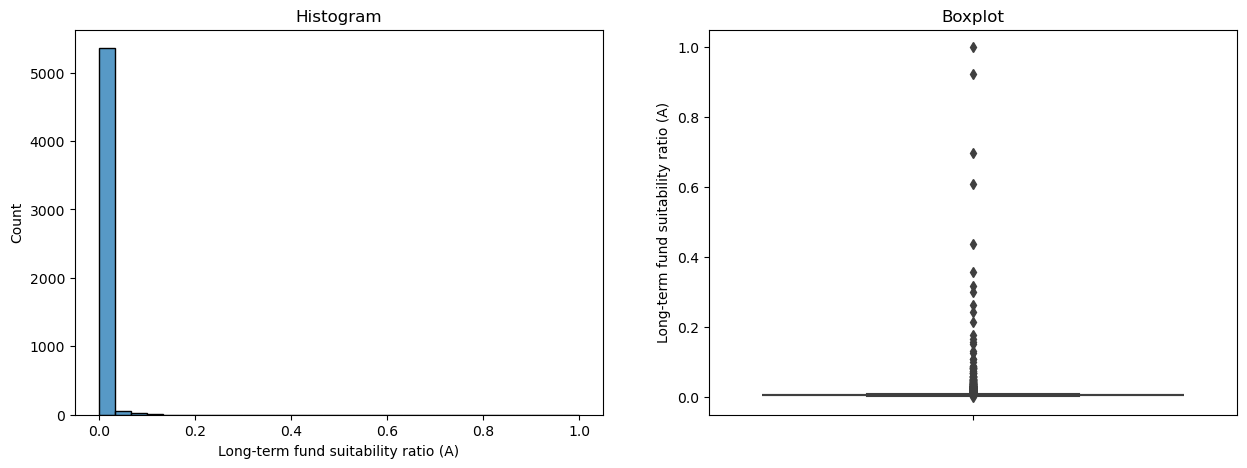


Long-term fund suitability ratio (A) - After Capping


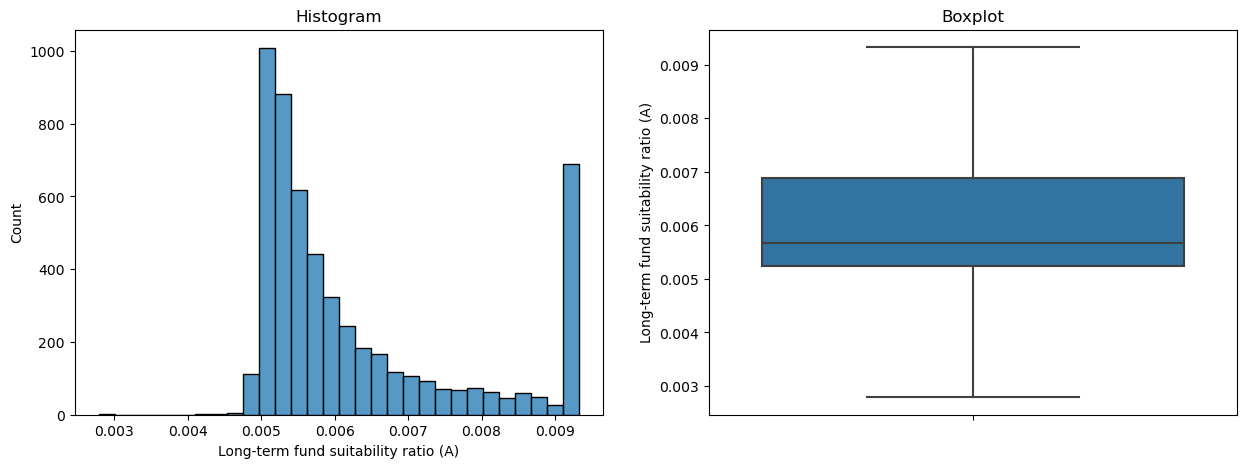

Net Income to Stockholder's Equity - Before Capping


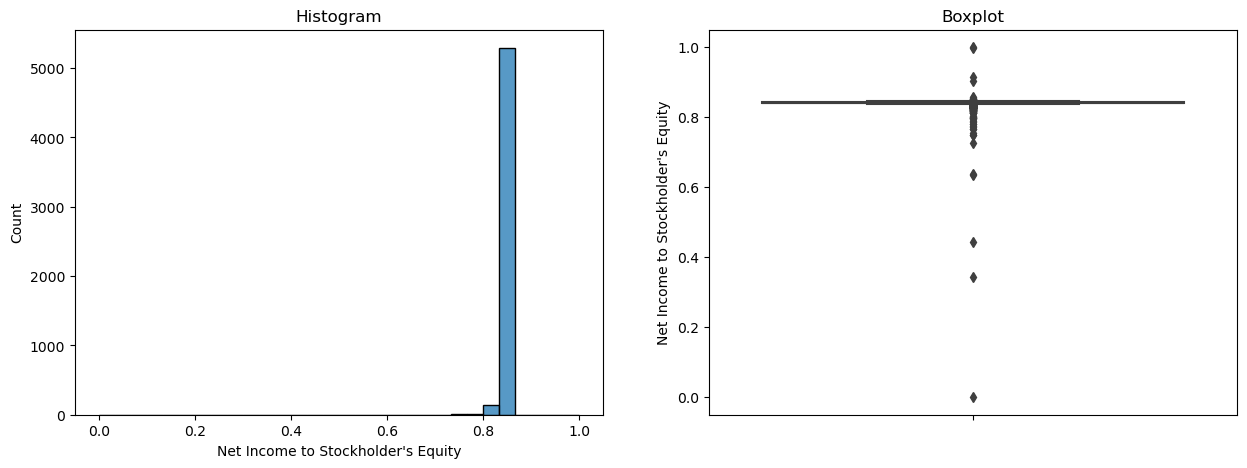


Net Income to Stockholder's Equity - After Capping


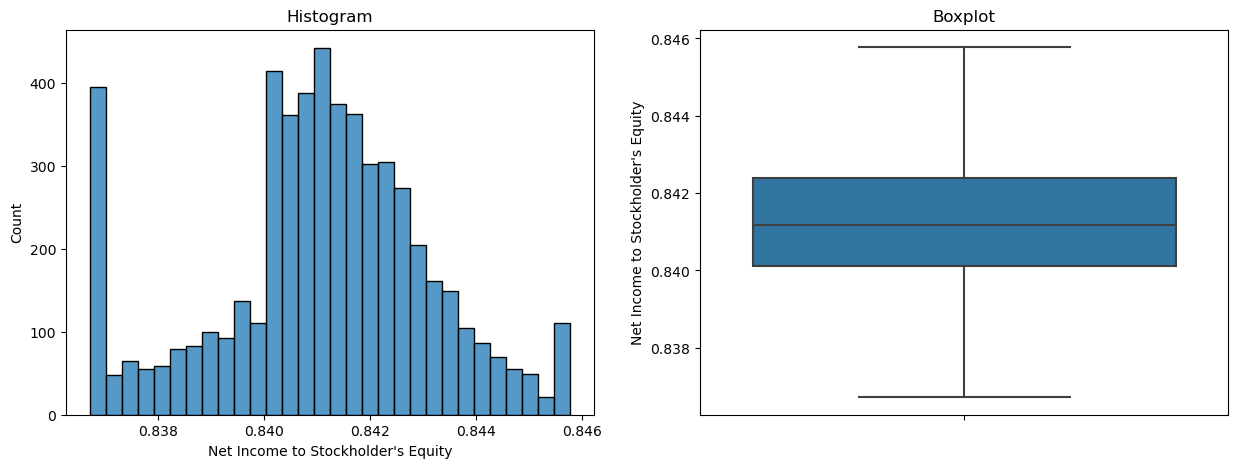

Net Income to Total Assets - Before Capping


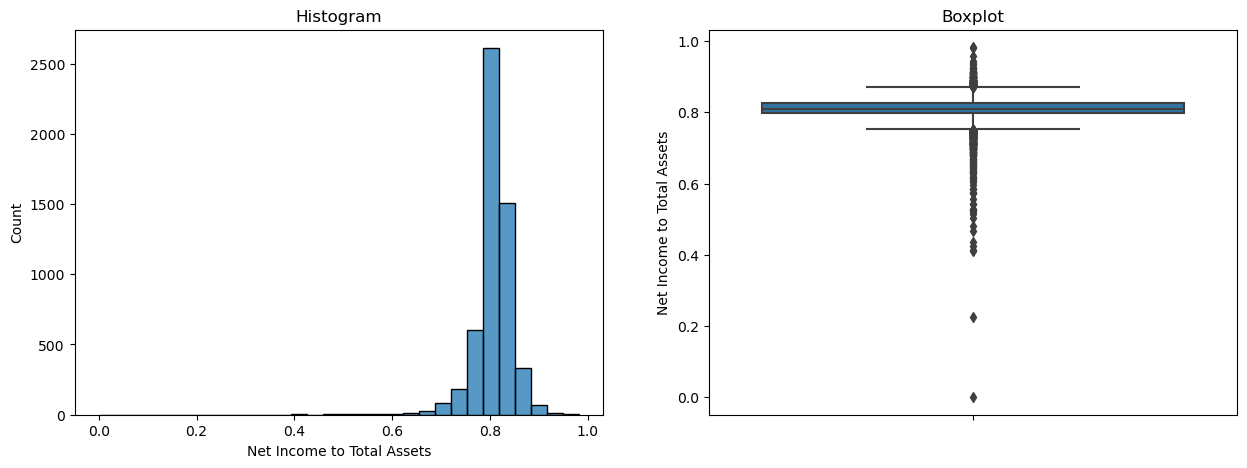


Net Income to Total Assets - After Capping


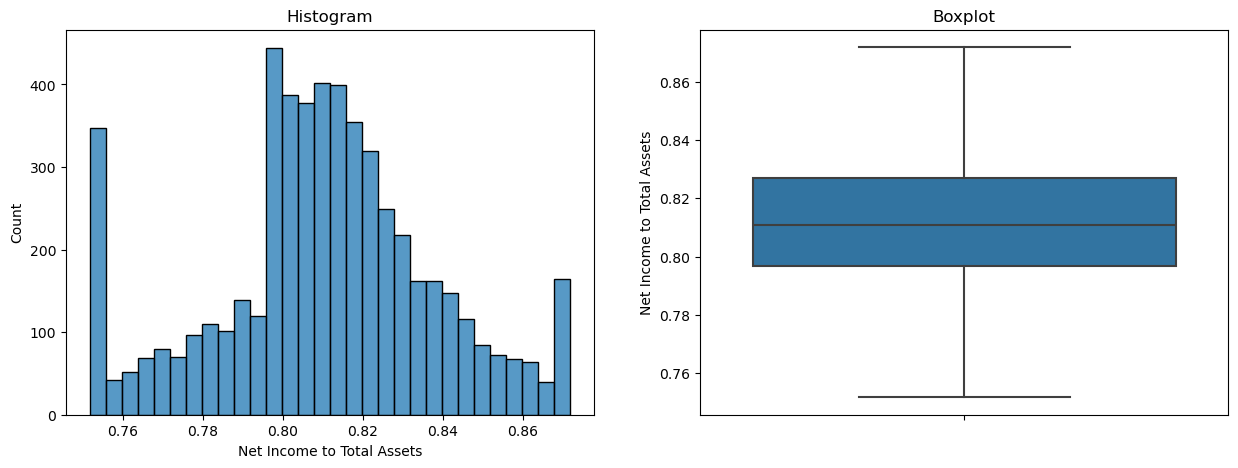

Net Value Growth Rate - Before Capping


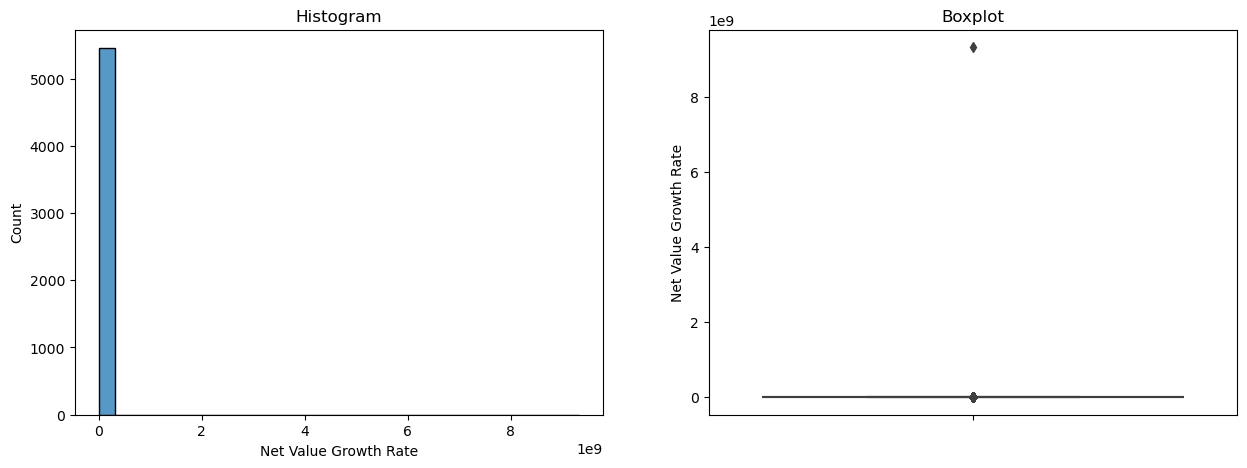


Net Value Growth Rate - After Capping


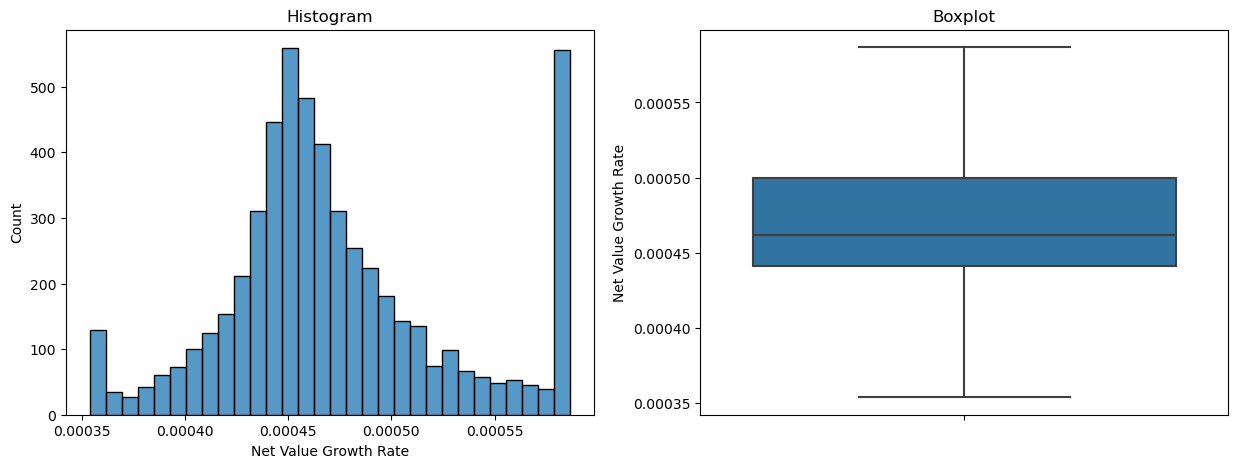

Net Value Per Share (A) - Before Capping


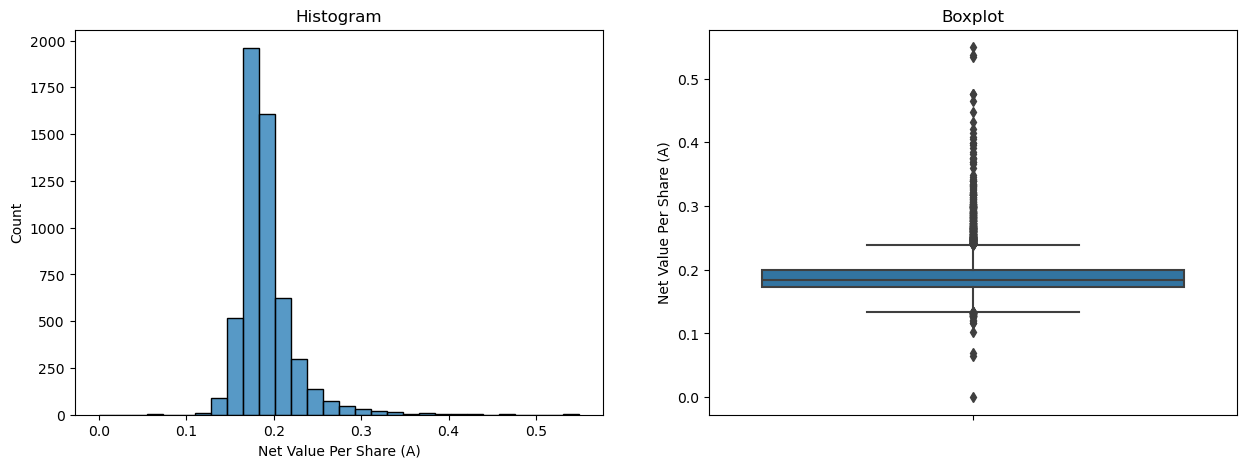


Net Value Per Share (A) - After Capping


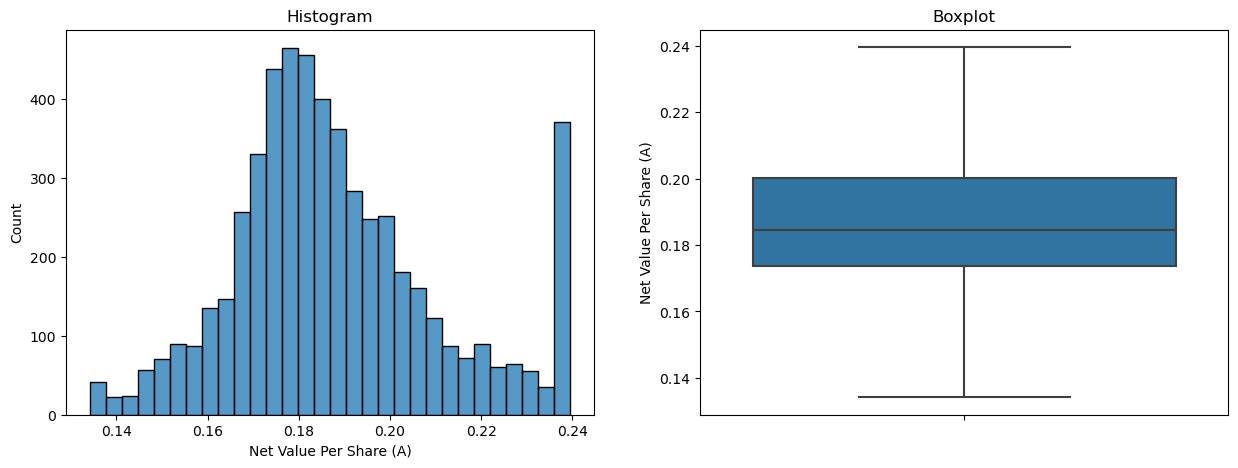

Net Value Per Share (B) - Before Capping


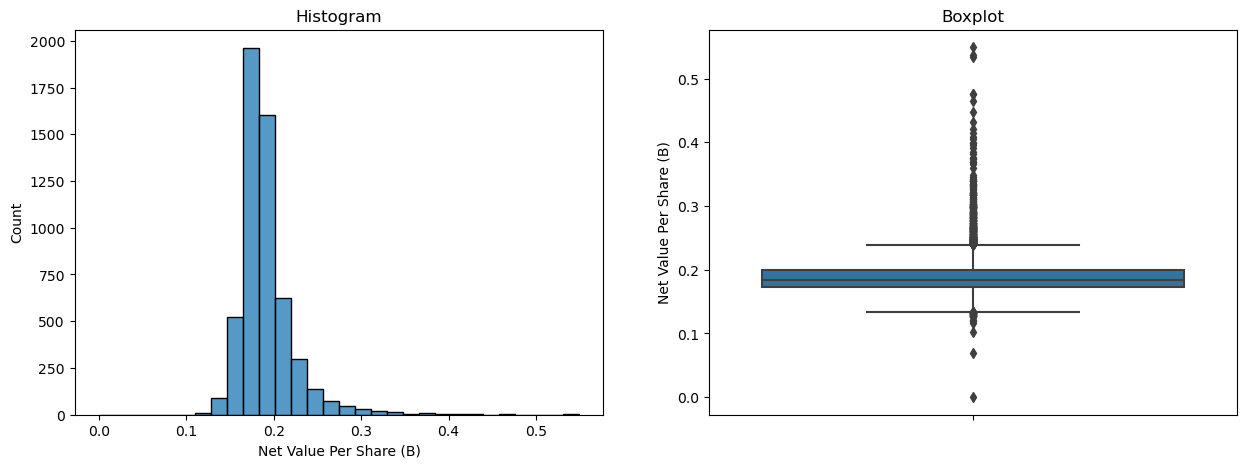


Net Value Per Share (B) - After Capping


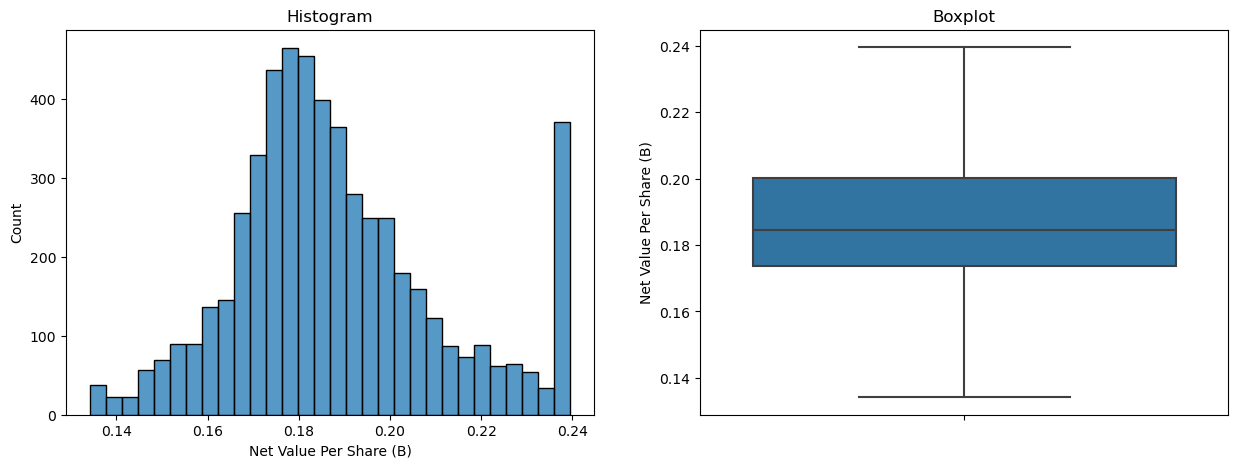

Net Value Per Share (C) - Before Capping


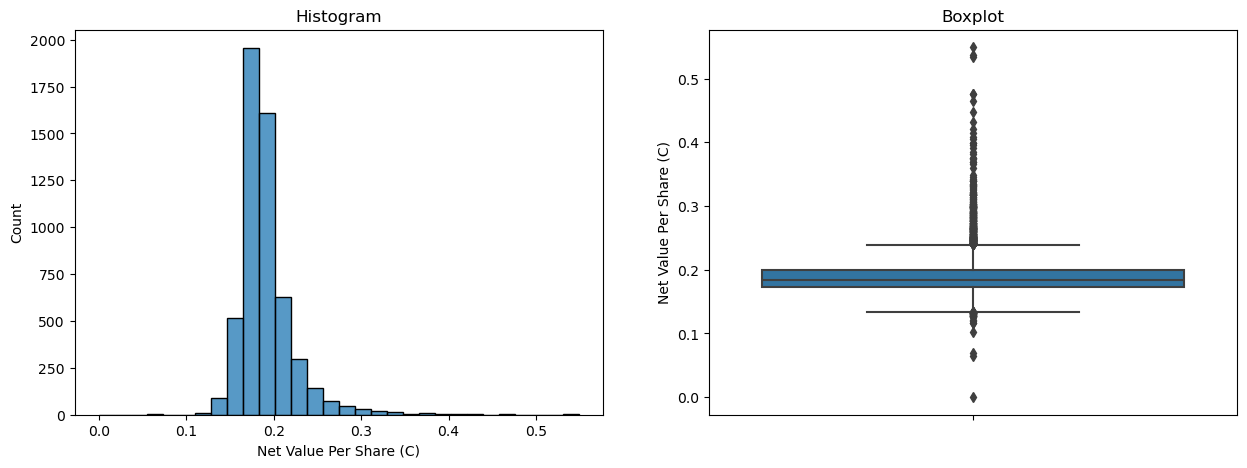


Net Value Per Share (C) - After Capping


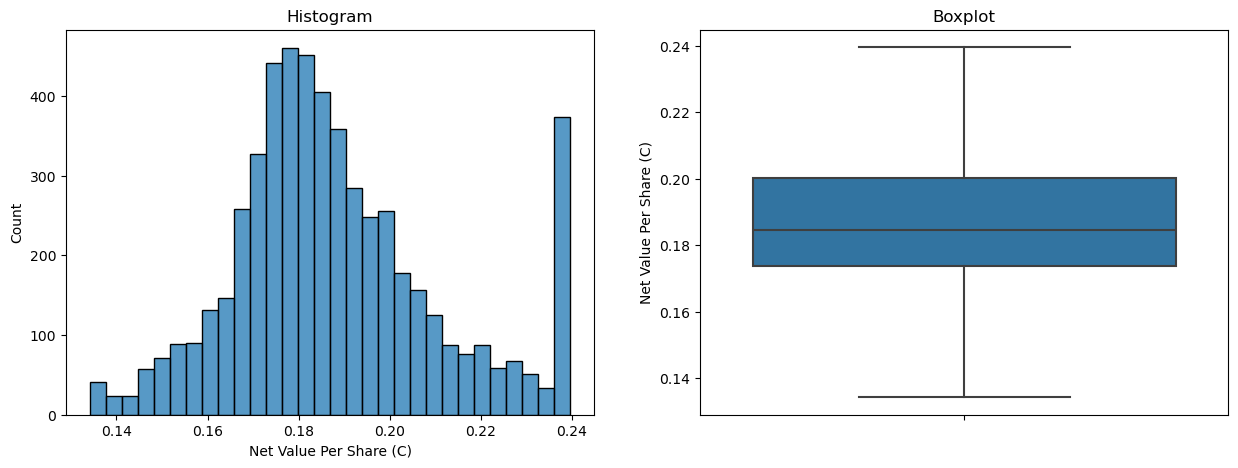

Net profit before tax/Paid-in capital - Before Capping


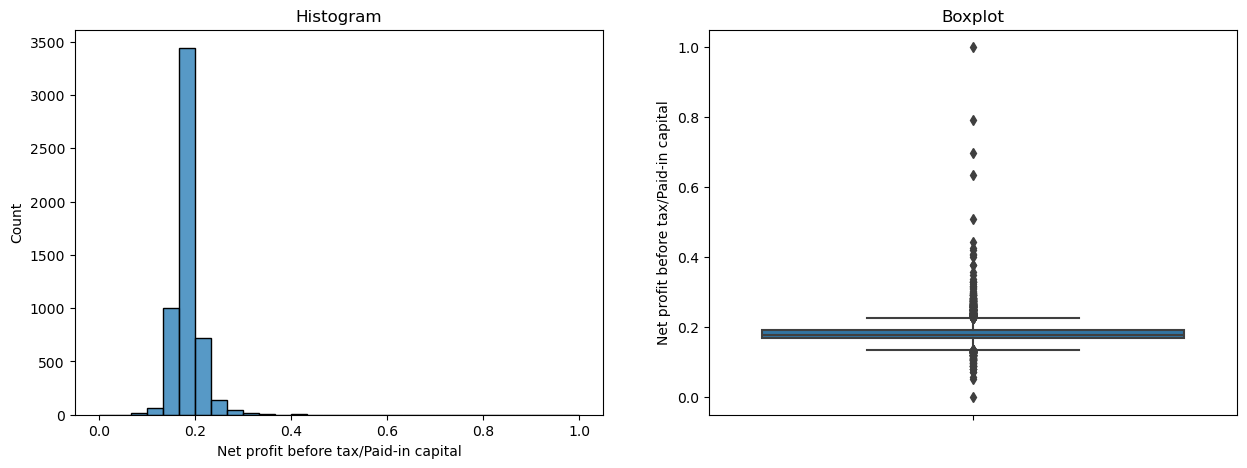


Net profit before tax/Paid-in capital - After Capping


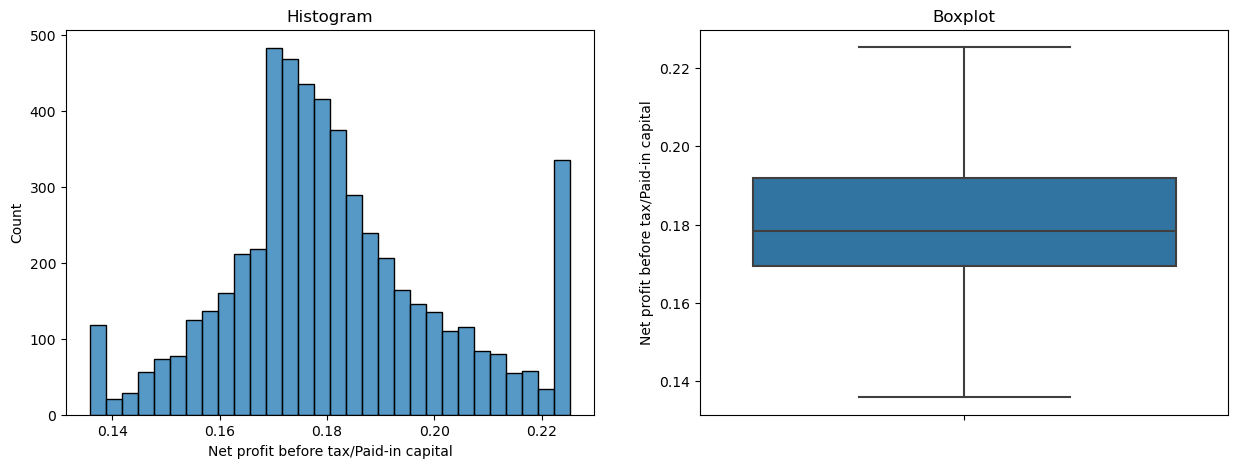

Net worth/Assets - Before Capping


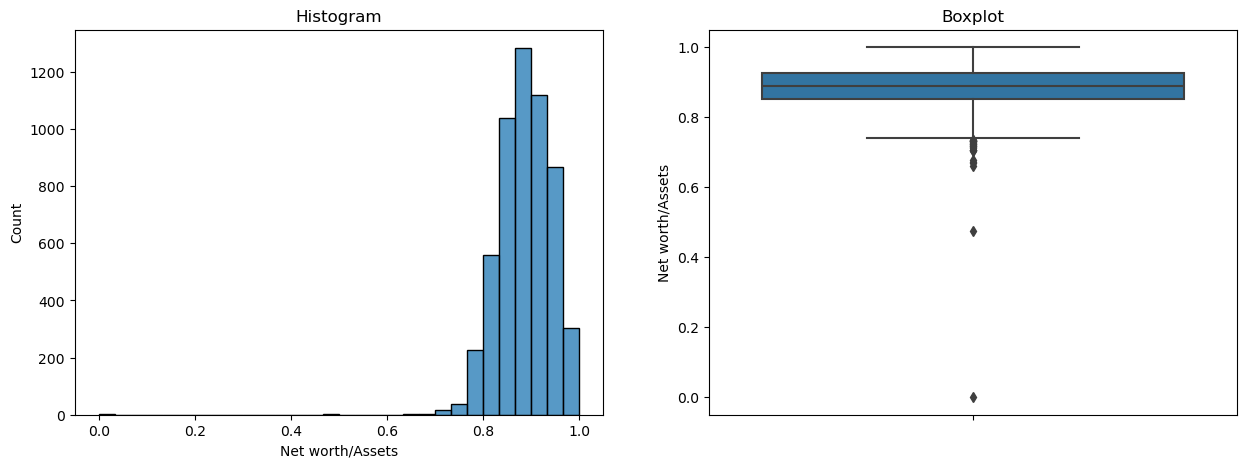


Net worth/Assets - After Capping


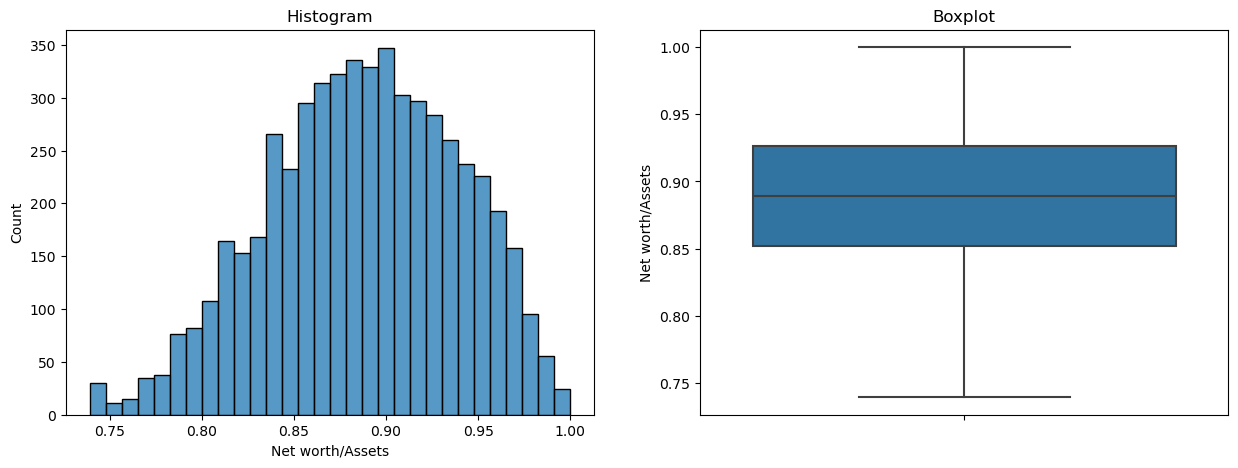

No-credit Interval - Before Capping


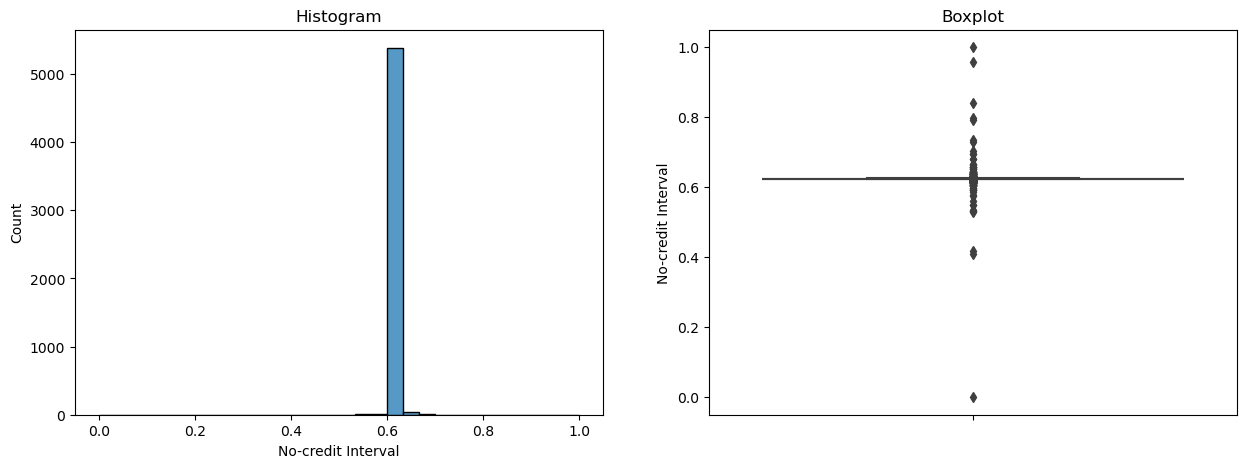


No-credit Interval - After Capping


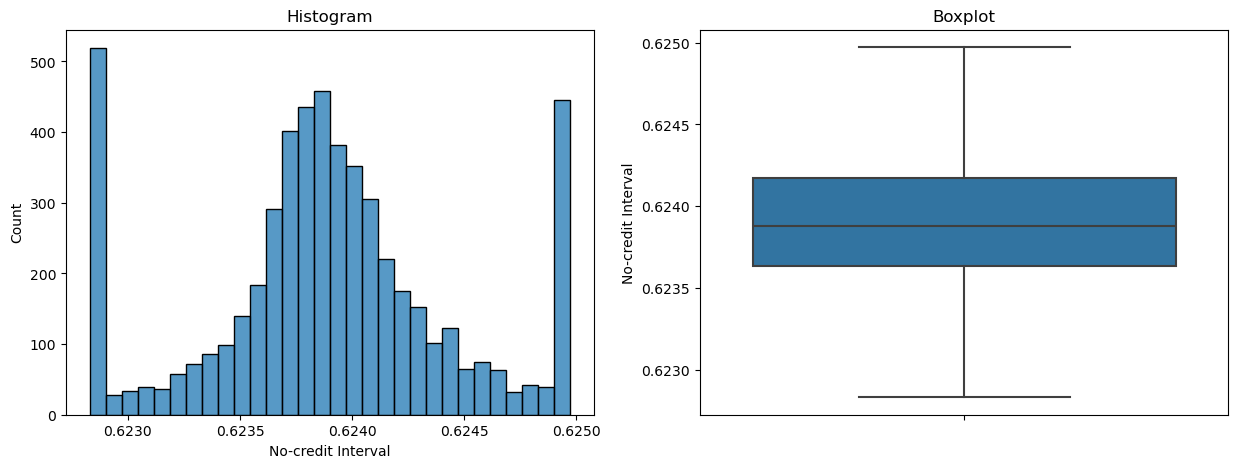

Non-industry income and expenditure/revenue - Before Capping


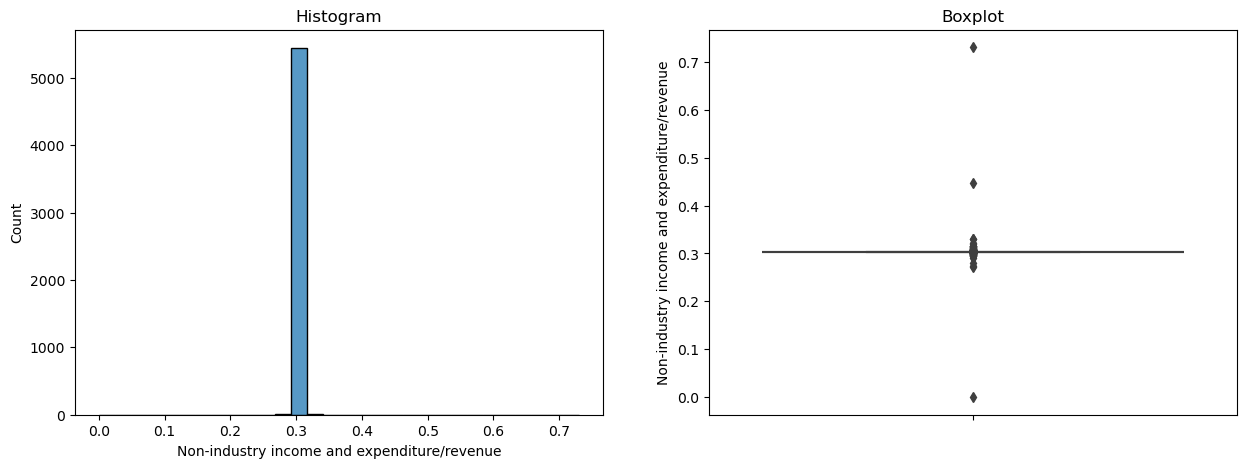


Non-industry income and expenditure/revenue - After Capping


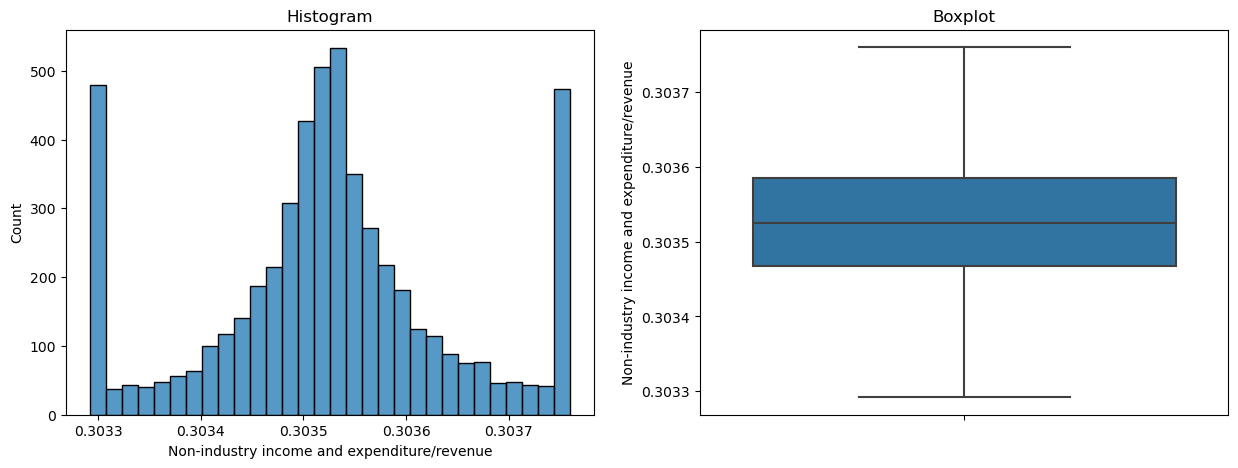

Operating Funds to Liability - Before Capping


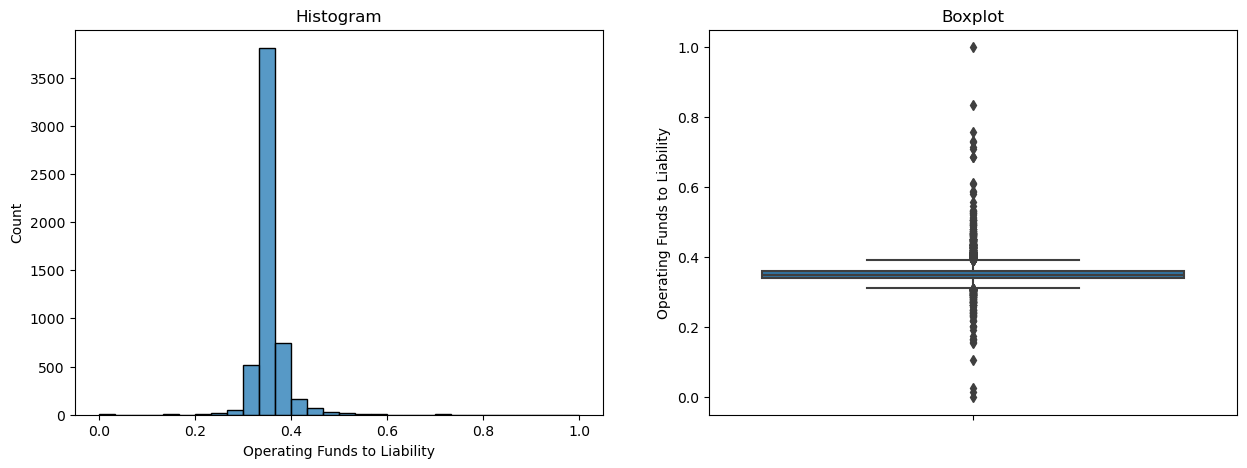


Operating Funds to Liability - After Capping


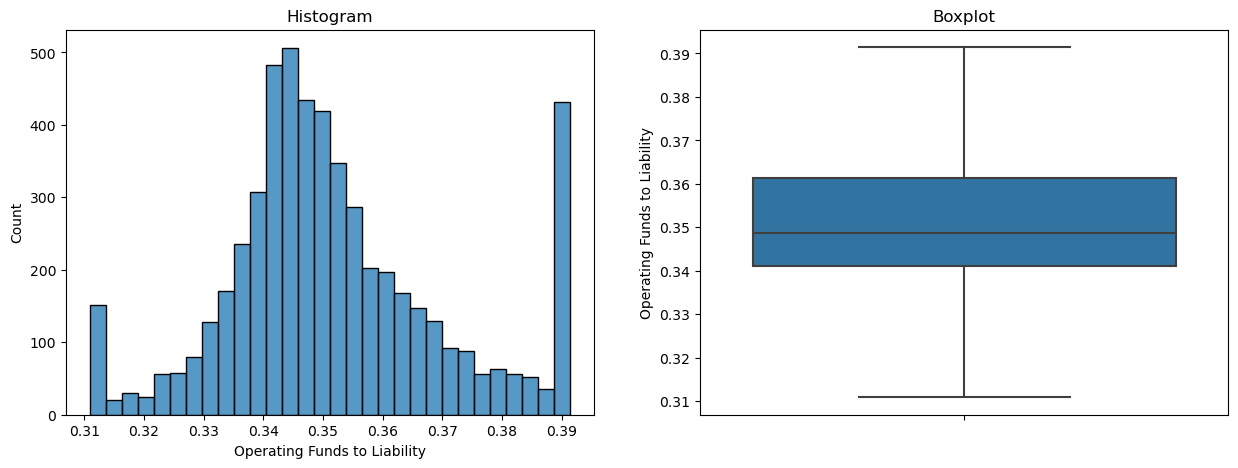

Operating Gross Margin - Before Capping


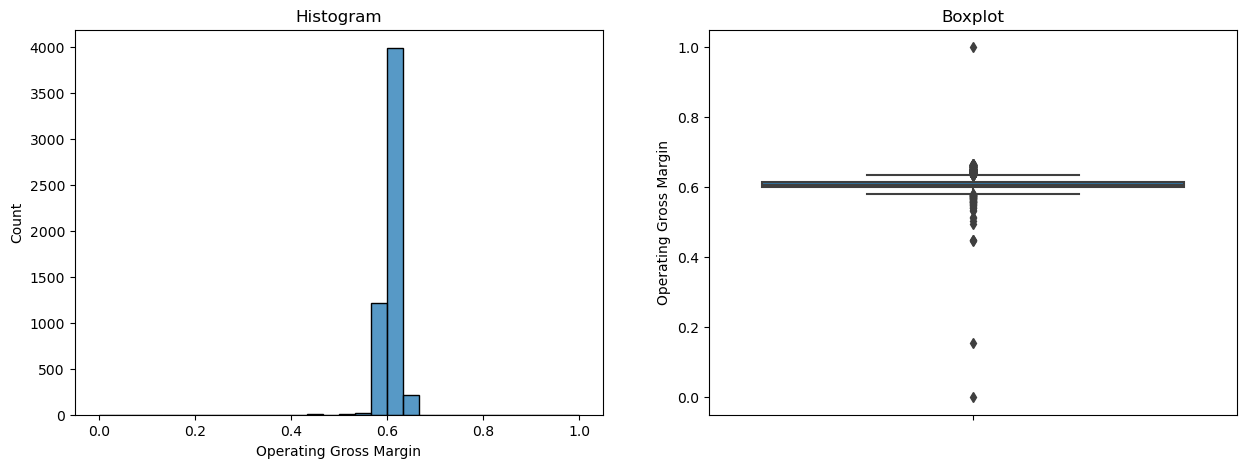


Operating Gross Margin - After Capping


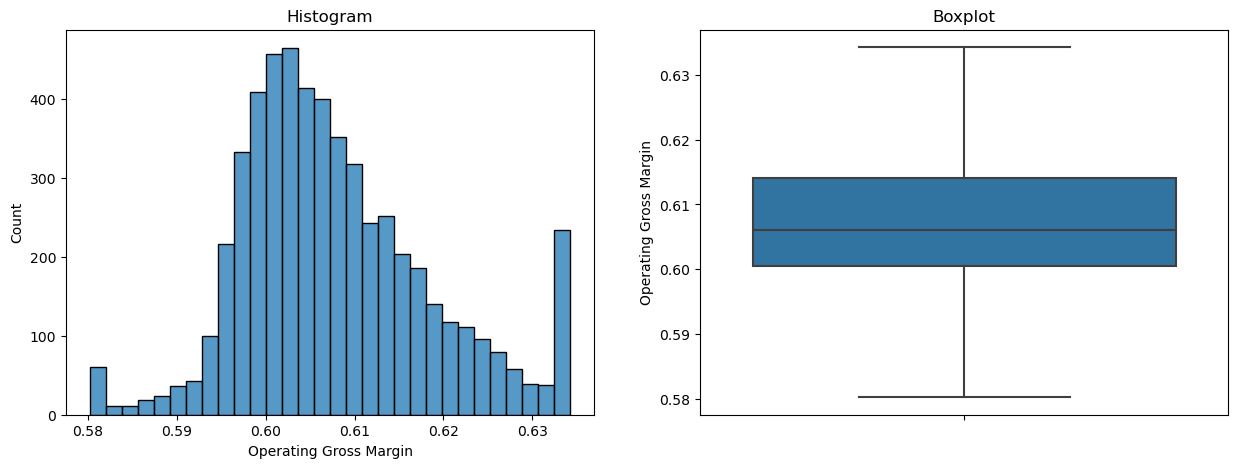

Operating Profit Growth Rate - Before Capping


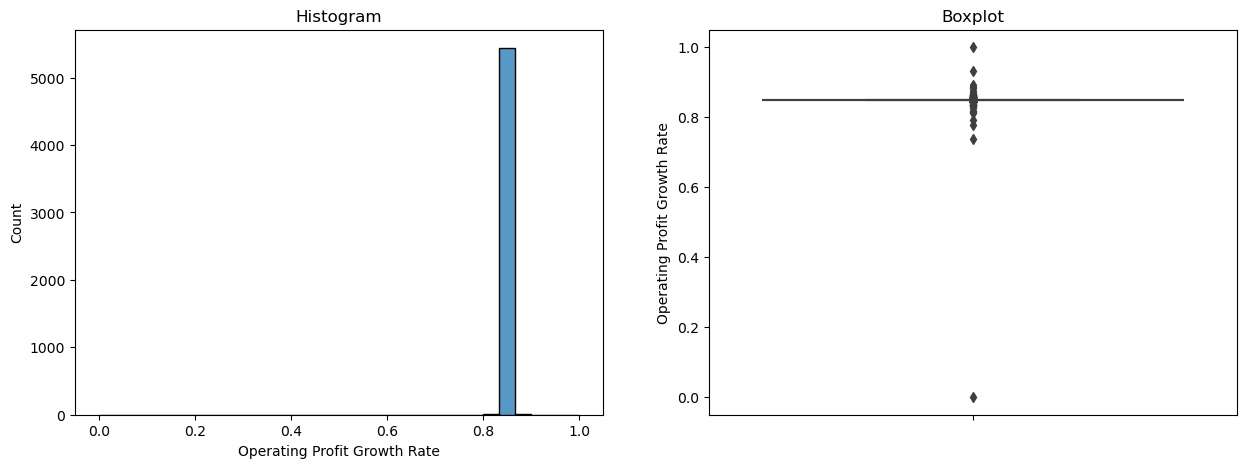


Operating Profit Growth Rate - After Capping


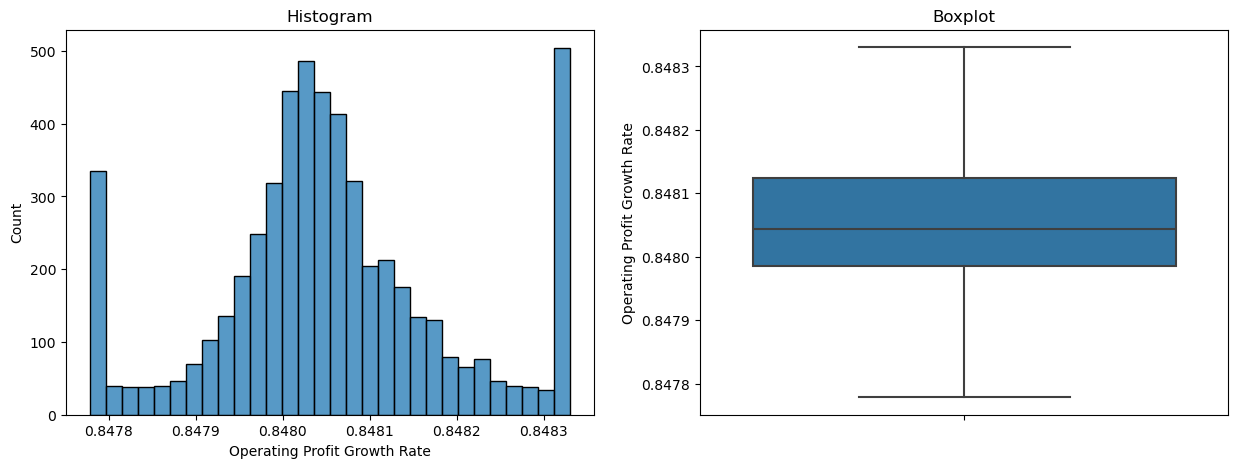

Operating Profit Per Share (Yuan ¥) - Before Capping


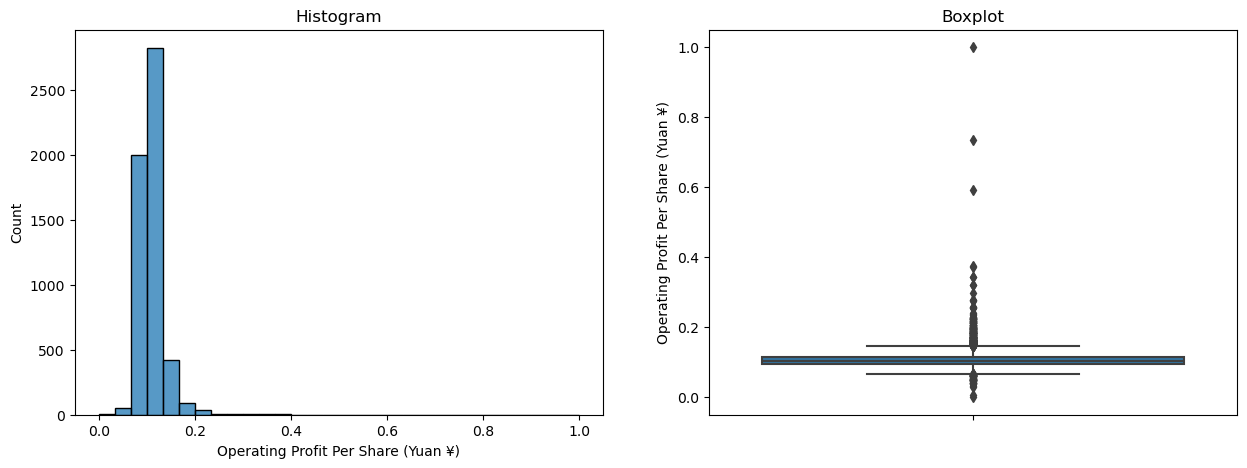


Operating Profit Per Share (Yuan ¥) - After Capping


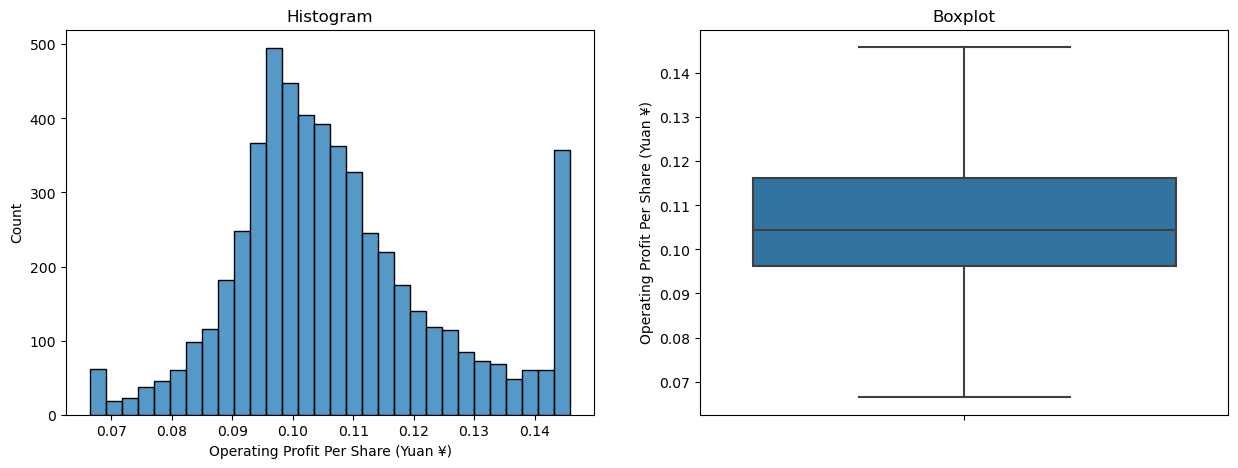

Operating Profit Rate - Before Capping


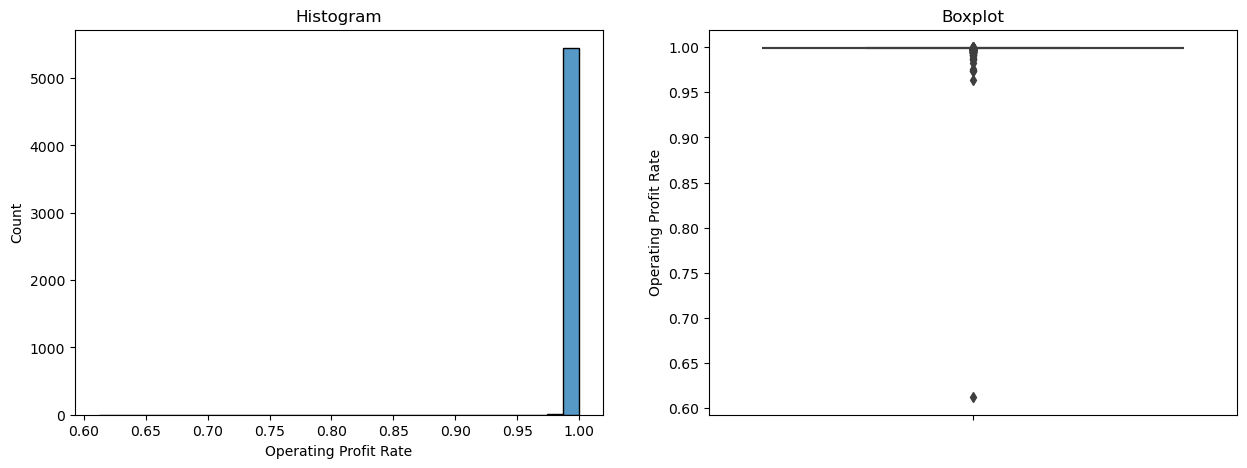


Operating Profit Rate - After Capping


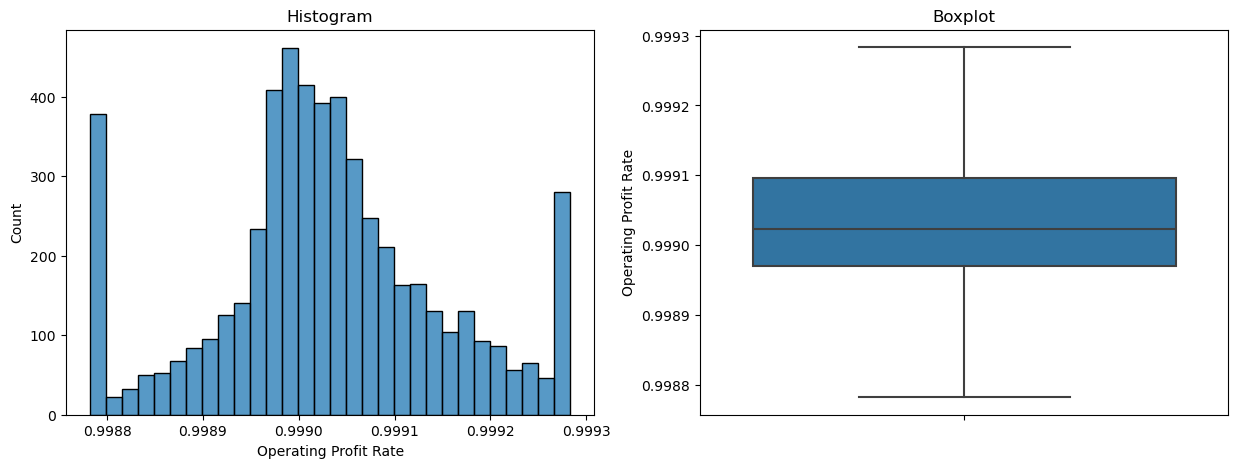

Operating profit per person - Before Capping


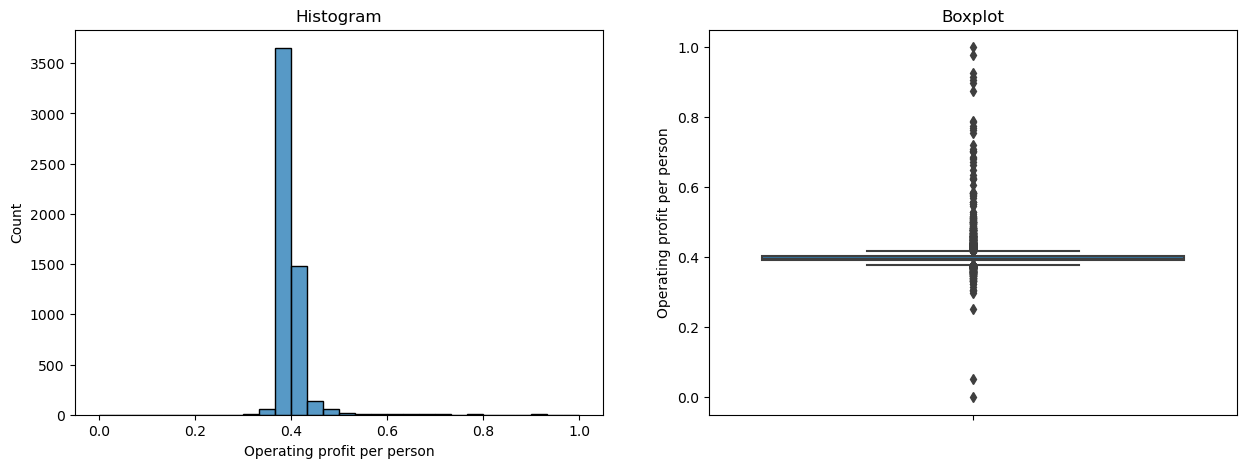


Operating profit per person - After Capping


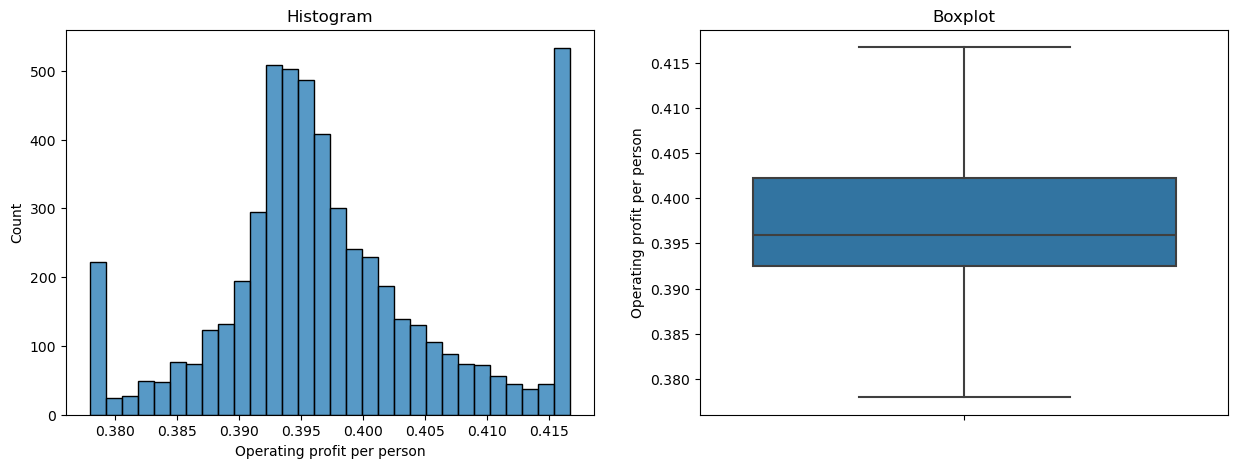

Operating profit/Paid-in capital - Before Capping


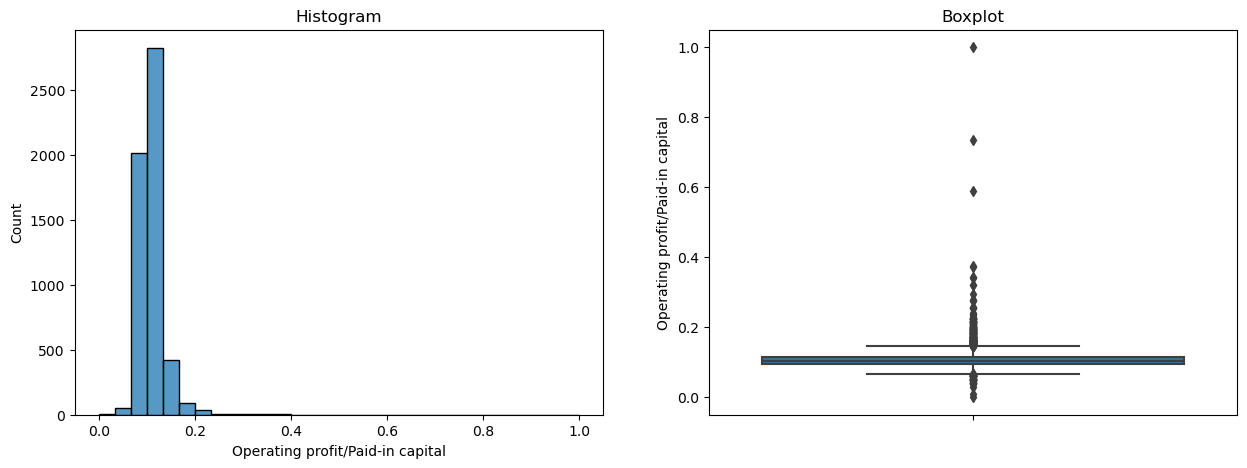


Operating profit/Paid-in capital - After Capping


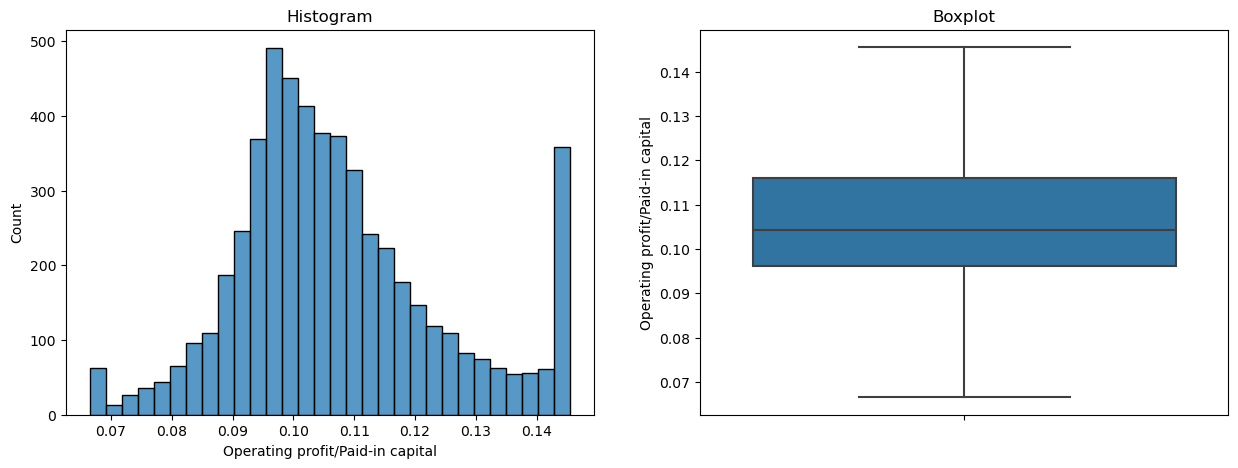

Per Share Net profit before tax (Yuan ¥) - Before Capping


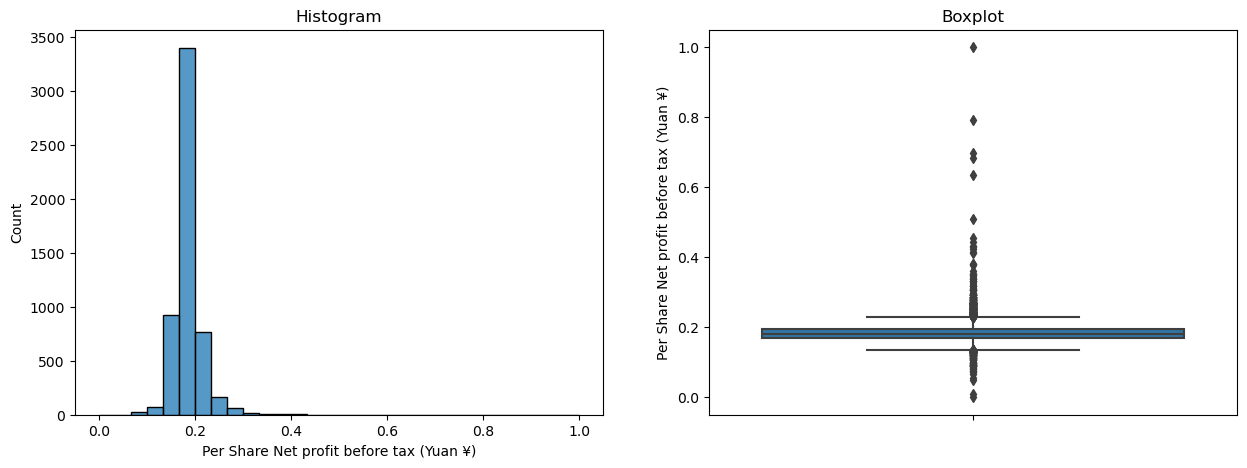


Per Share Net profit before tax (Yuan ¥) - After Capping


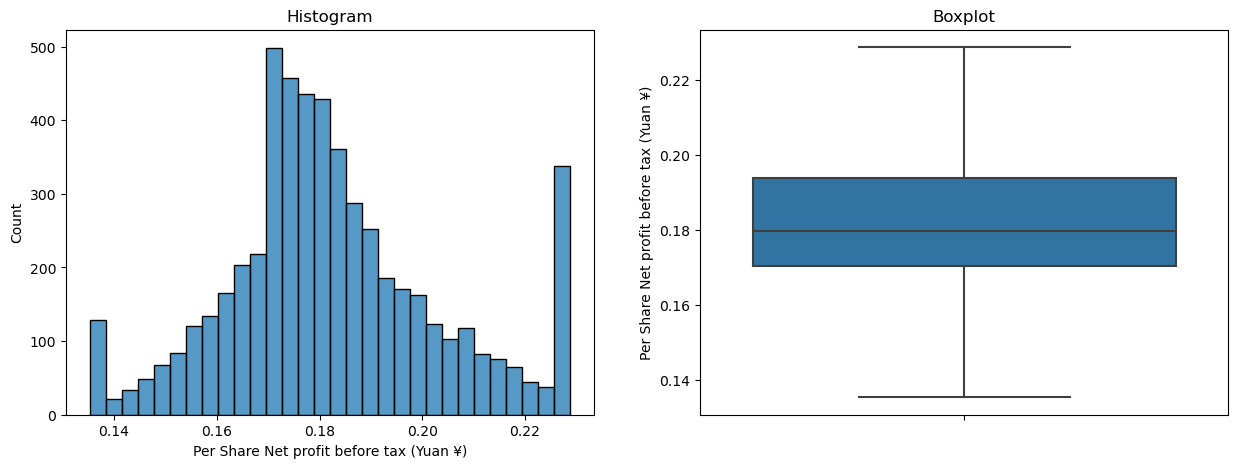

Persistent EPS in the Last Four Seasons - Before Capping


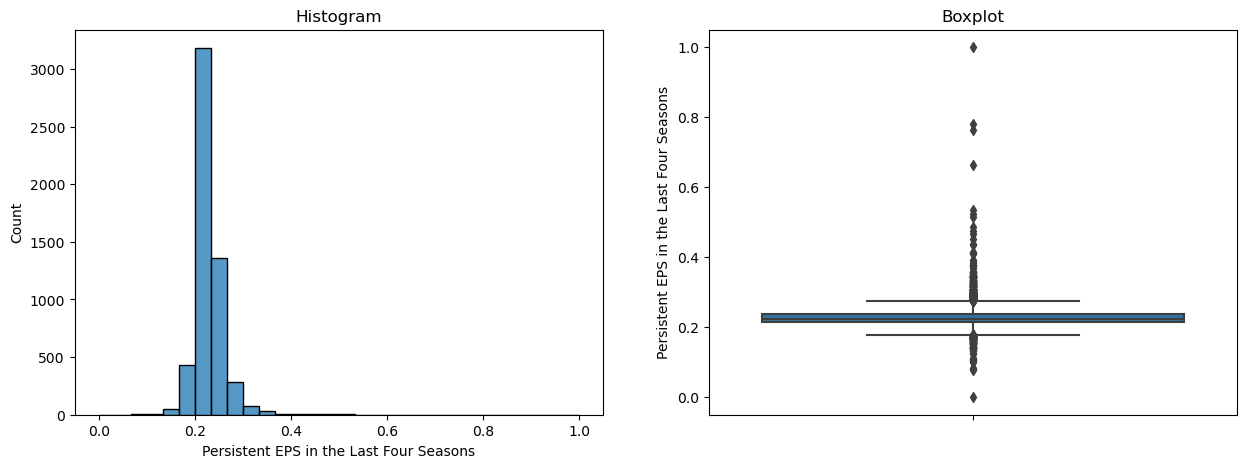


Persistent EPS in the Last Four Seasons - After Capping


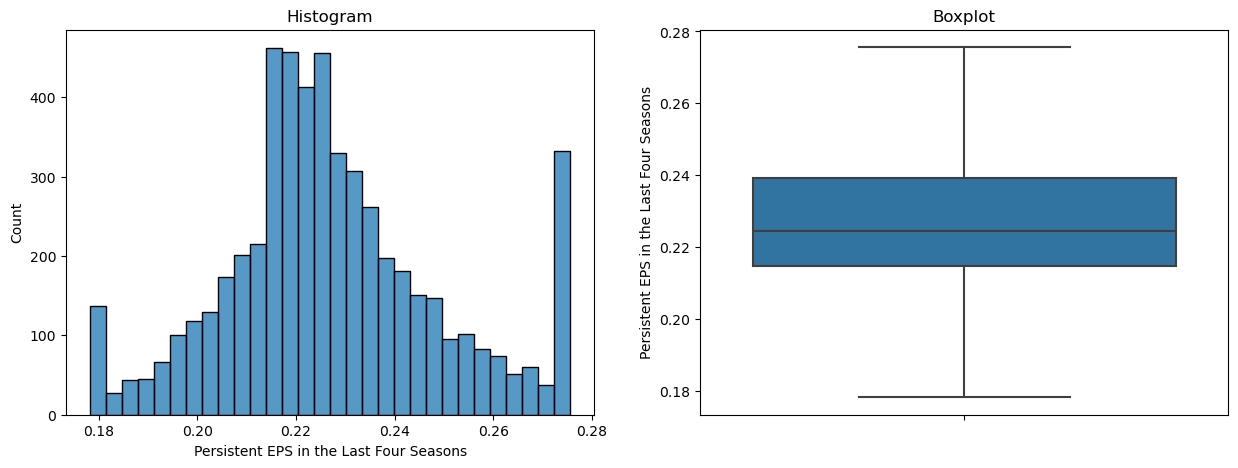

Pre-tax net Interest Rate - Before Capping


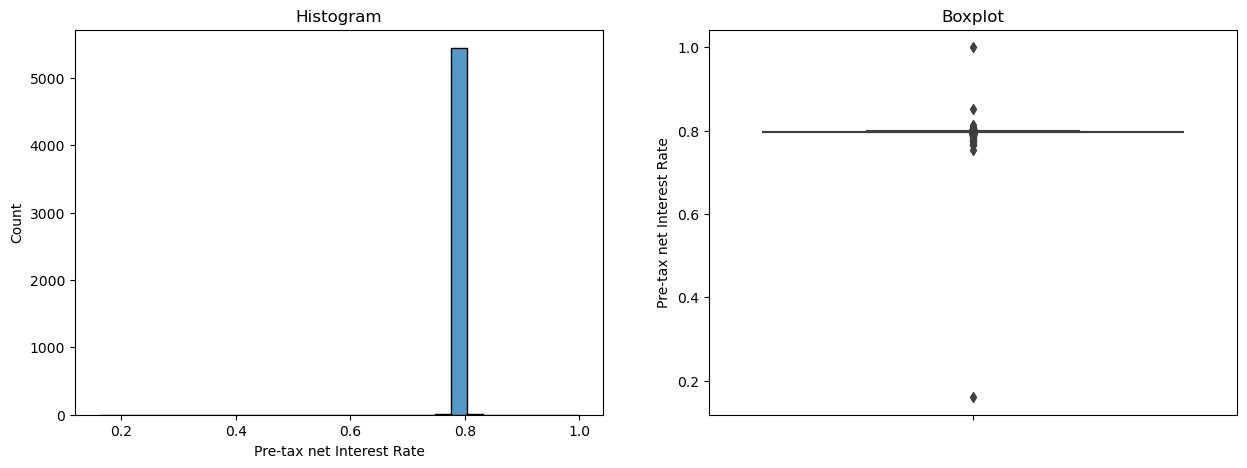


Pre-tax net Interest Rate - After Capping


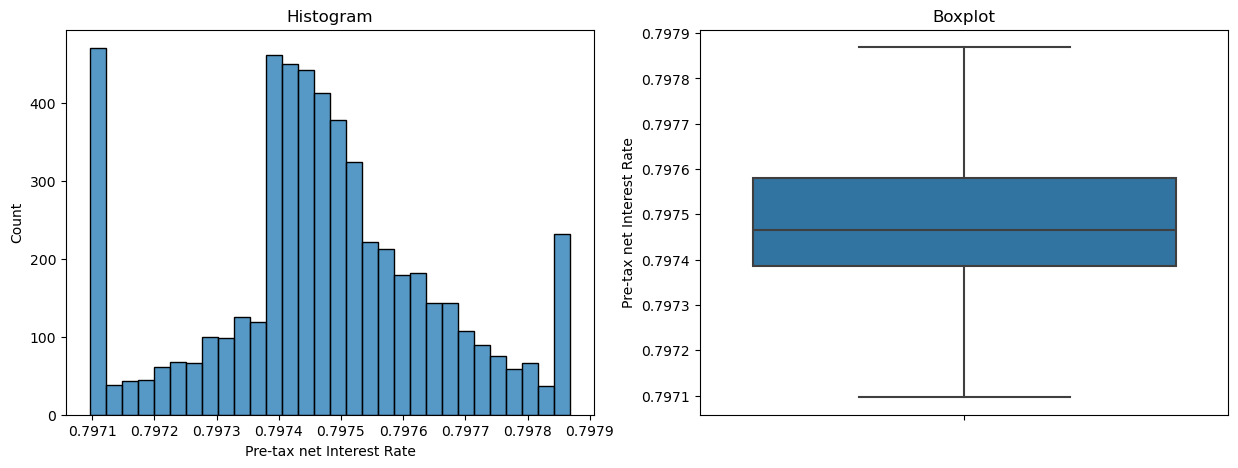

Quick Assets/Current Liability - Before Capping


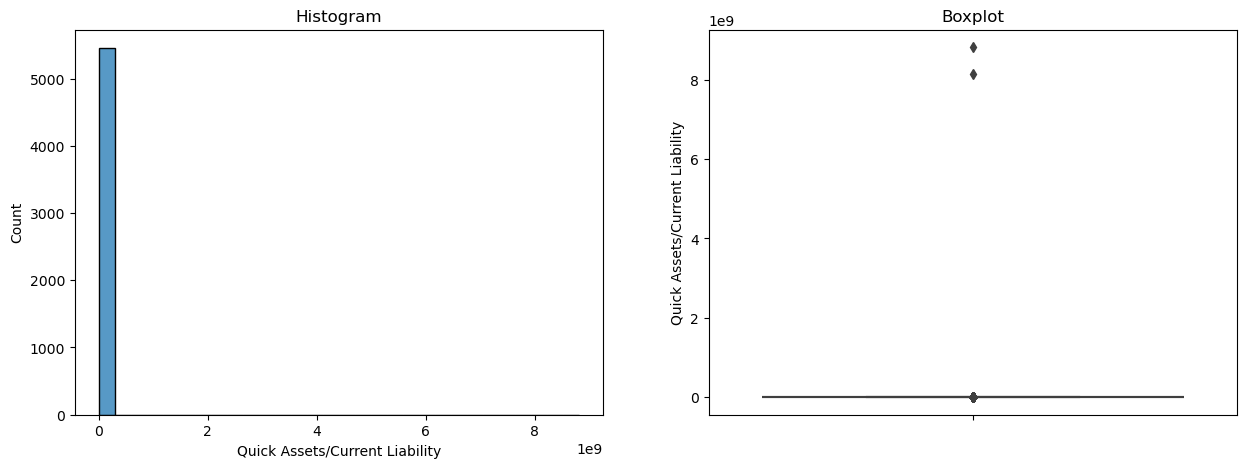


Quick Assets/Current Liability - After Capping


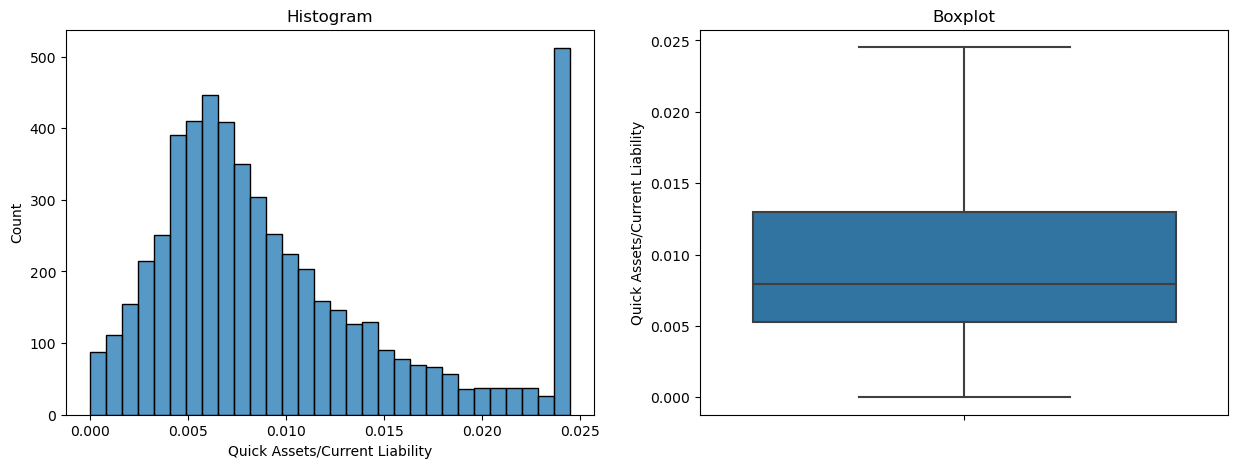

Quick Ratio - Before Capping


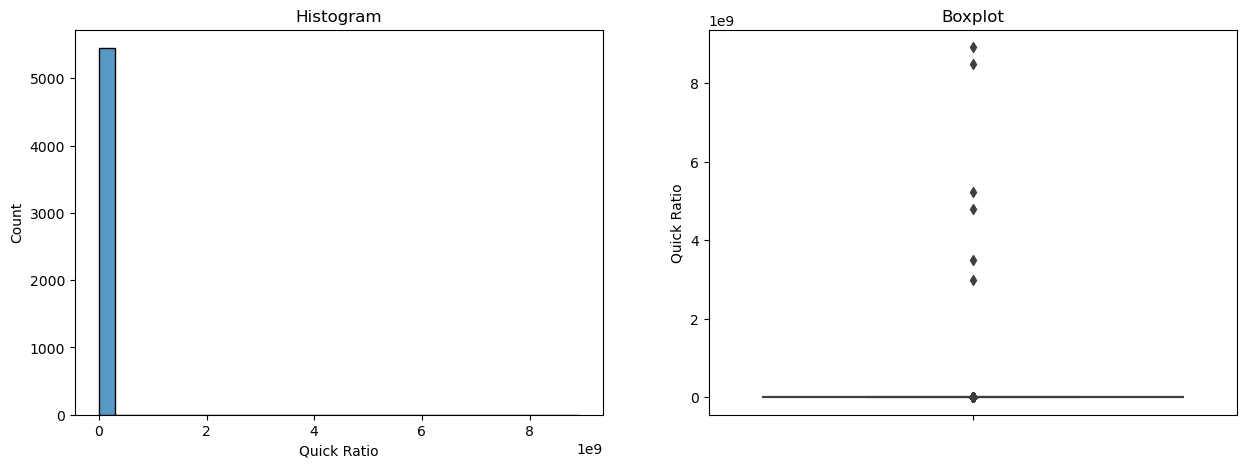


Quick Ratio - After Capping


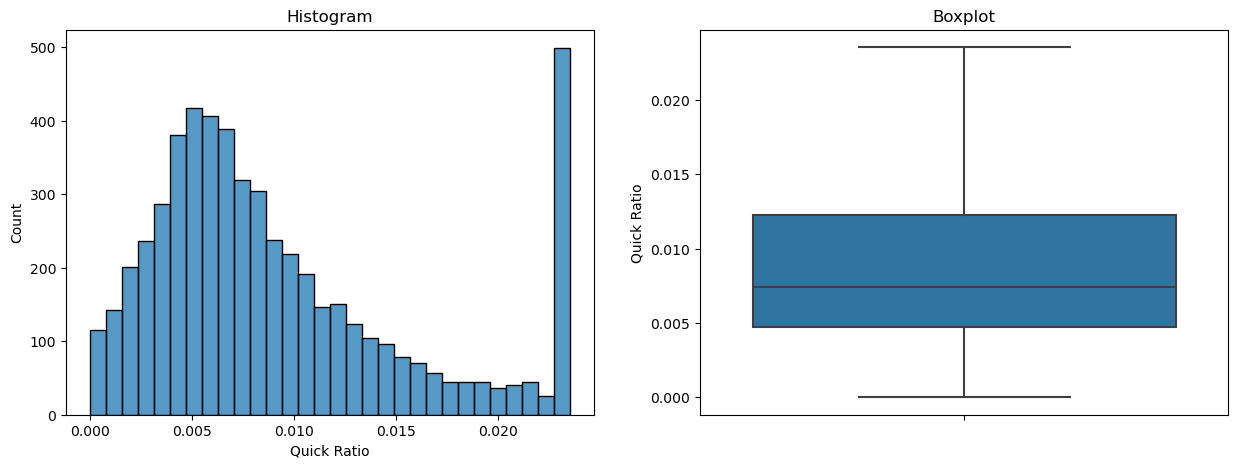

ROA(A) before interest and % after tax - Before Capping


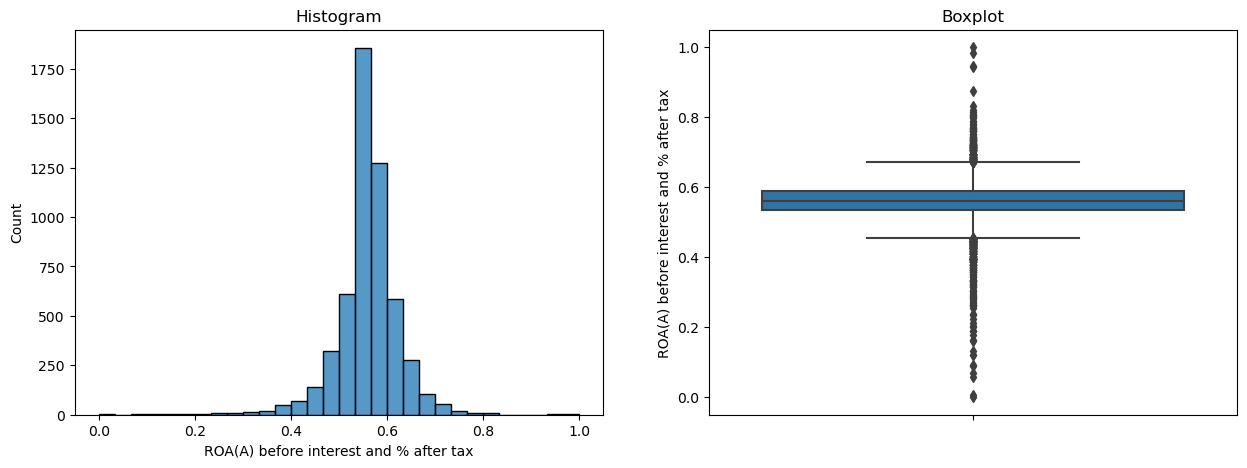


ROA(A) before interest and % after tax - After Capping


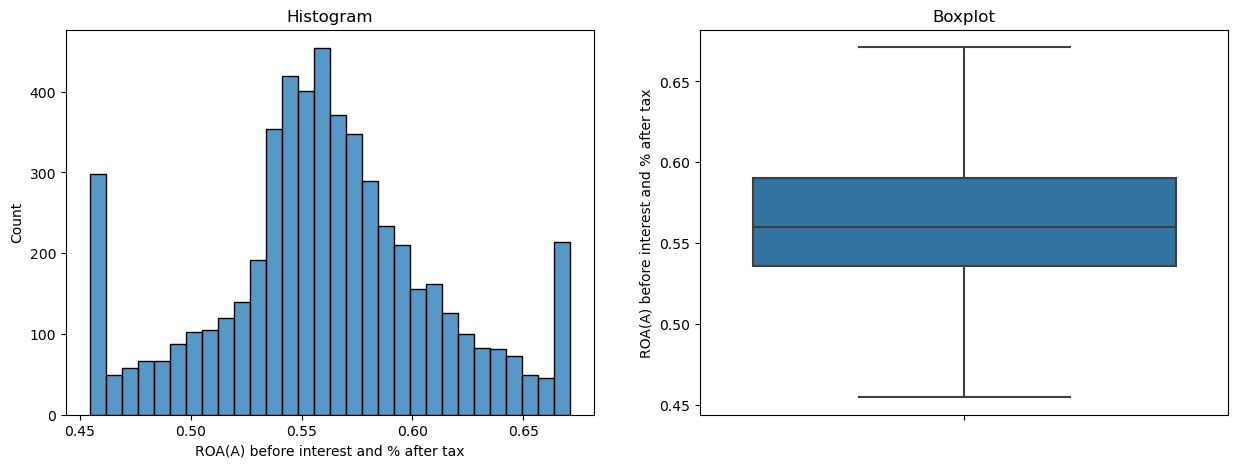

ROA(B) before interest and depreciation after tax - Before Capping


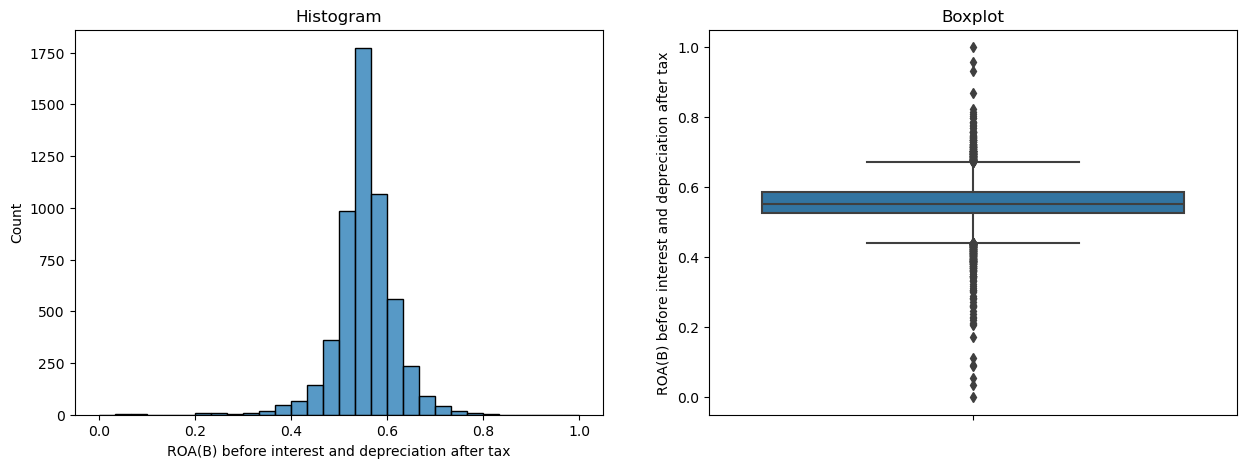


ROA(B) before interest and depreciation after tax - After Capping


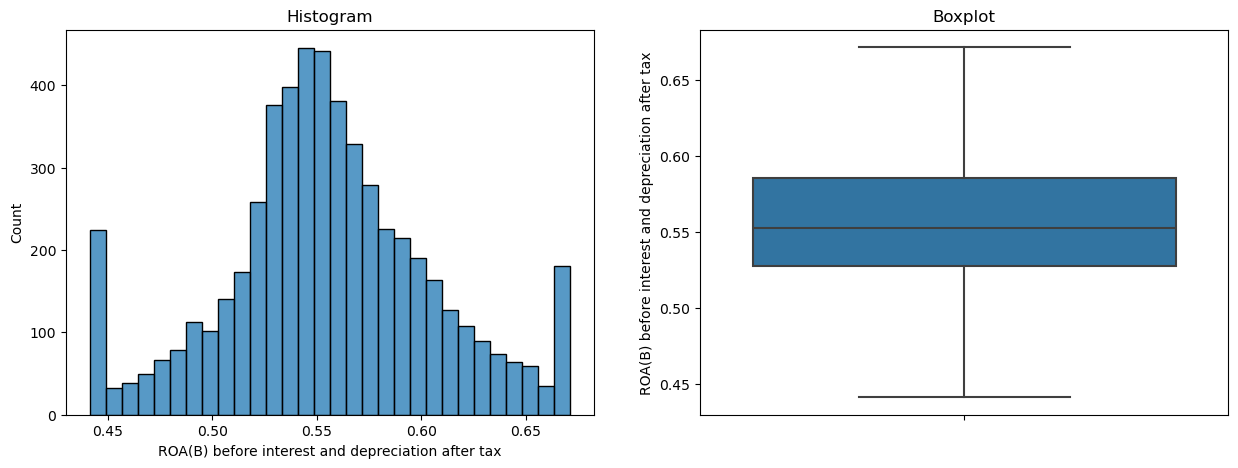

Realized Sales Gross Margin - Before Capping


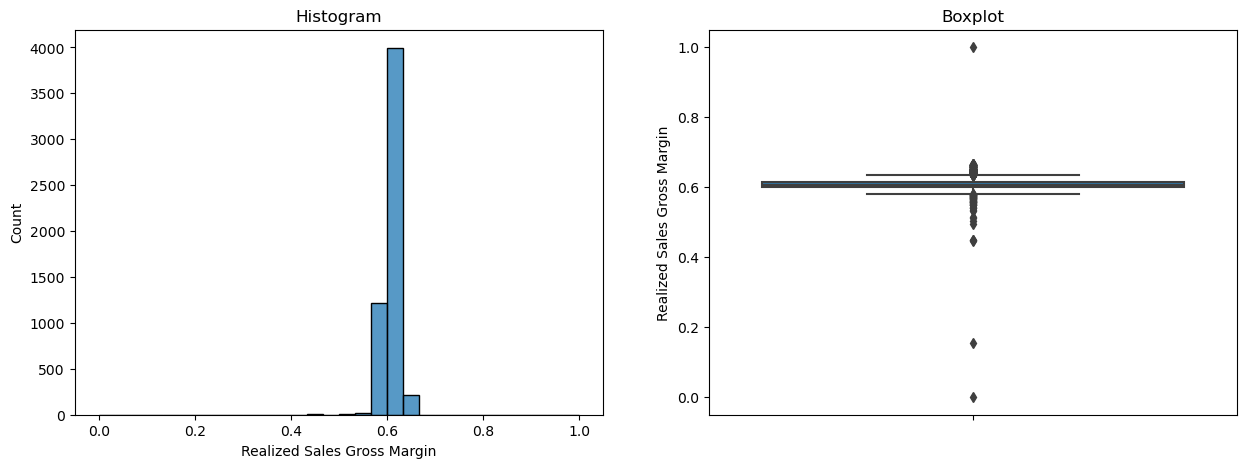


Realized Sales Gross Margin - After Capping


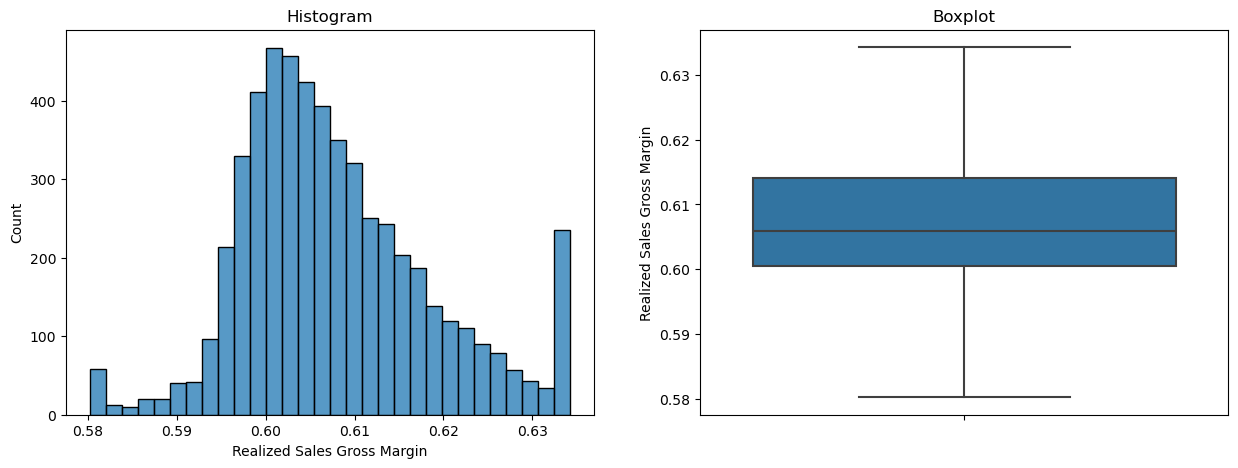

Realized Sales Gross Profit Growth Rate - Before Capping


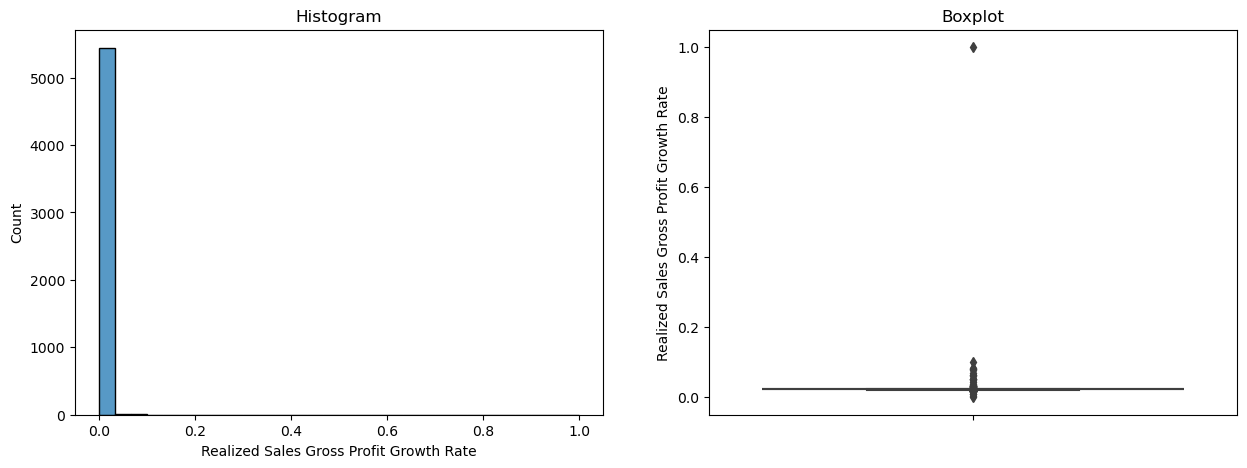


Realized Sales Gross Profit Growth Rate - After Capping


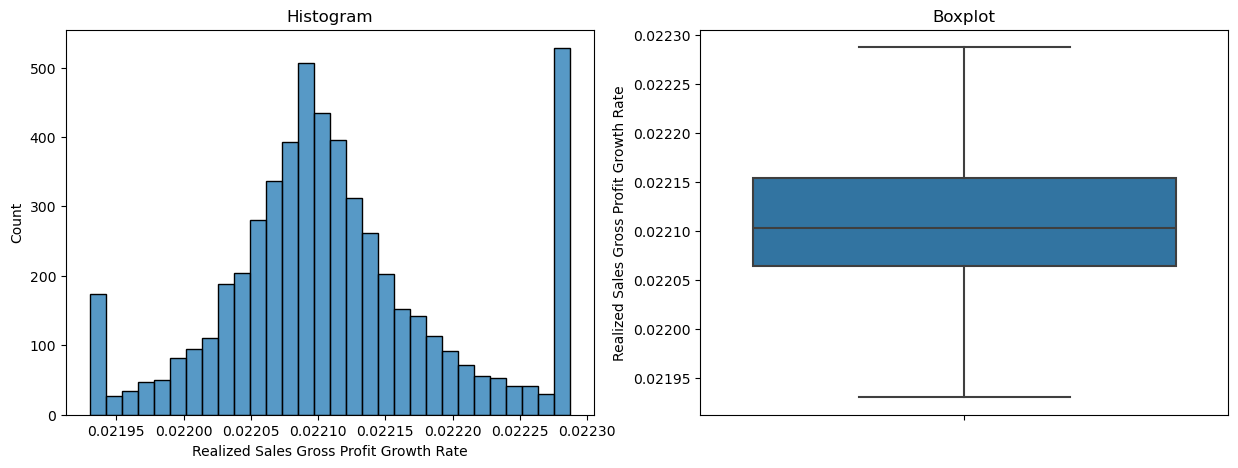

Regular Net Profit Growth Rate - Before Capping


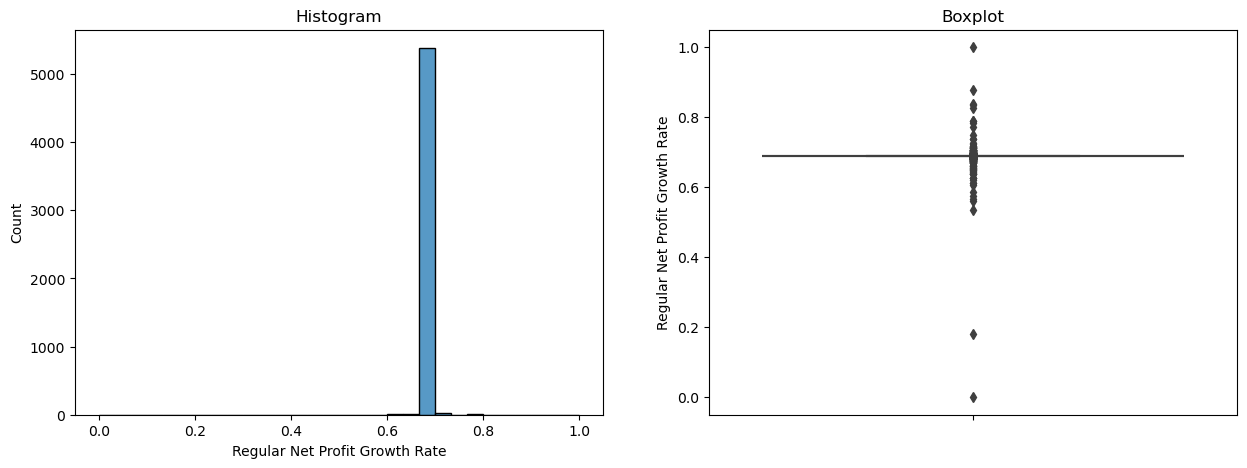


Regular Net Profit Growth Rate - After Capping


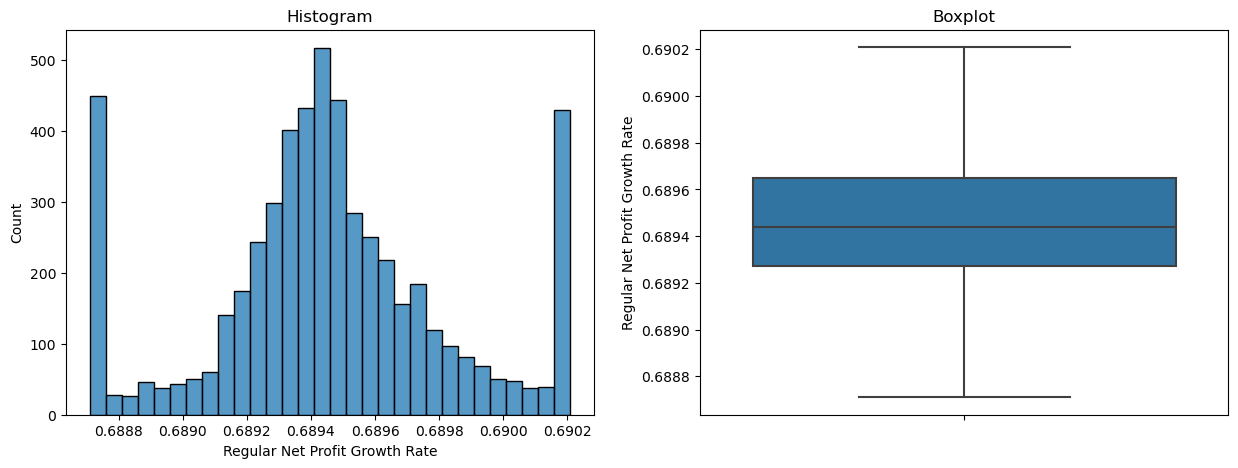

Retained Earnings to Total Assets - Before Capping


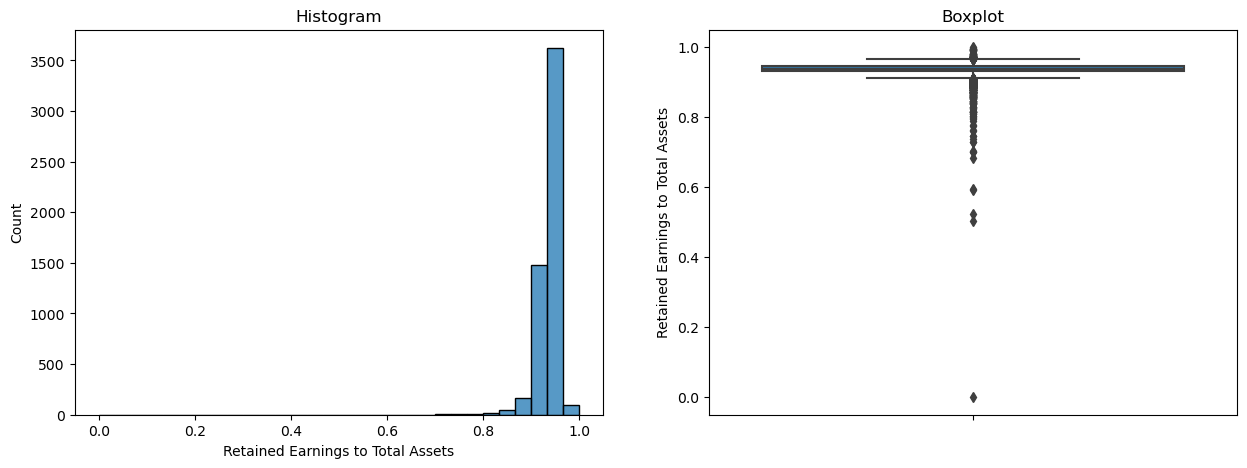


Retained Earnings to Total Assets - After Capping


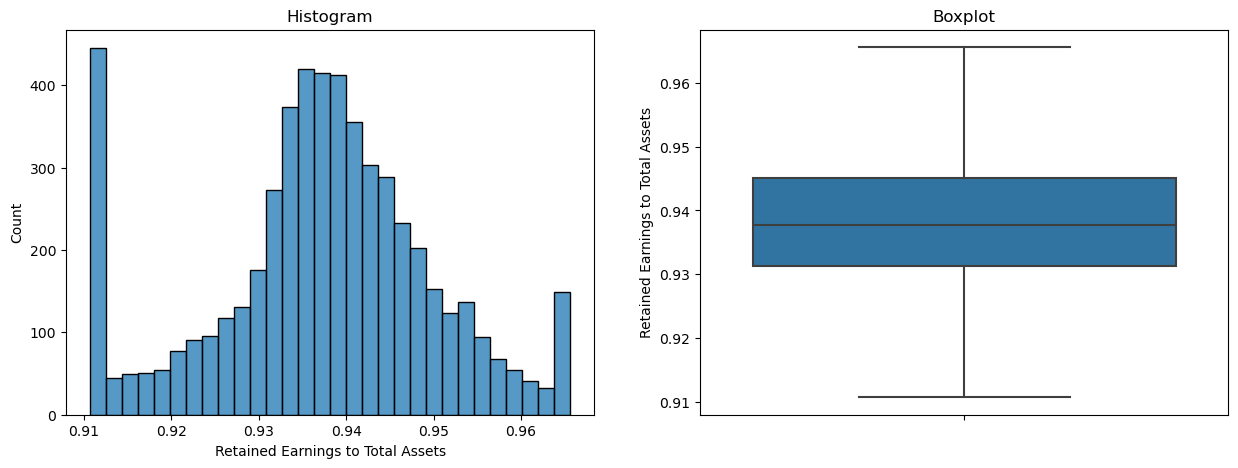

Revenue Per Share (Yuan ¥) - Before Capping


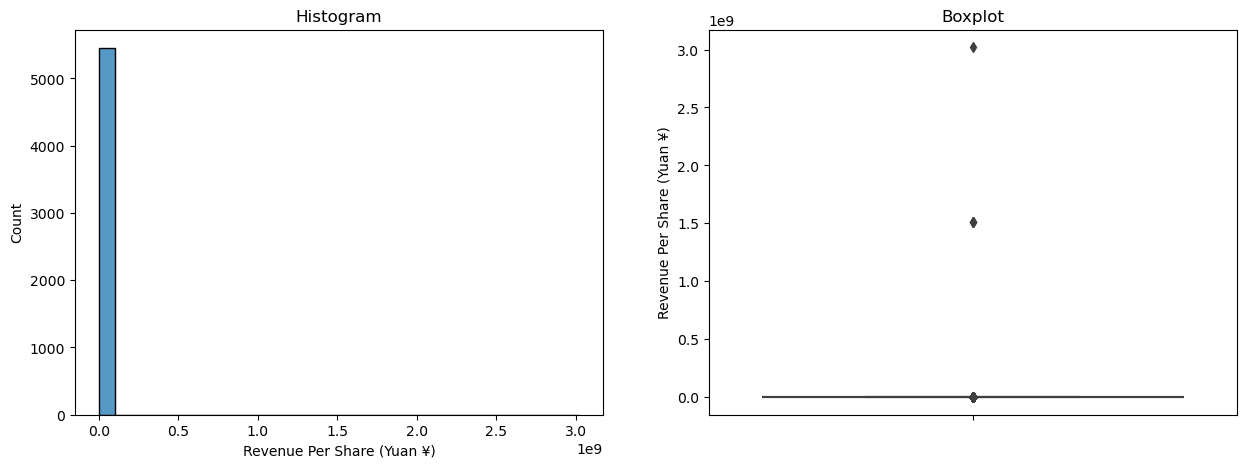


Revenue Per Share (Yuan ¥) - After Capping


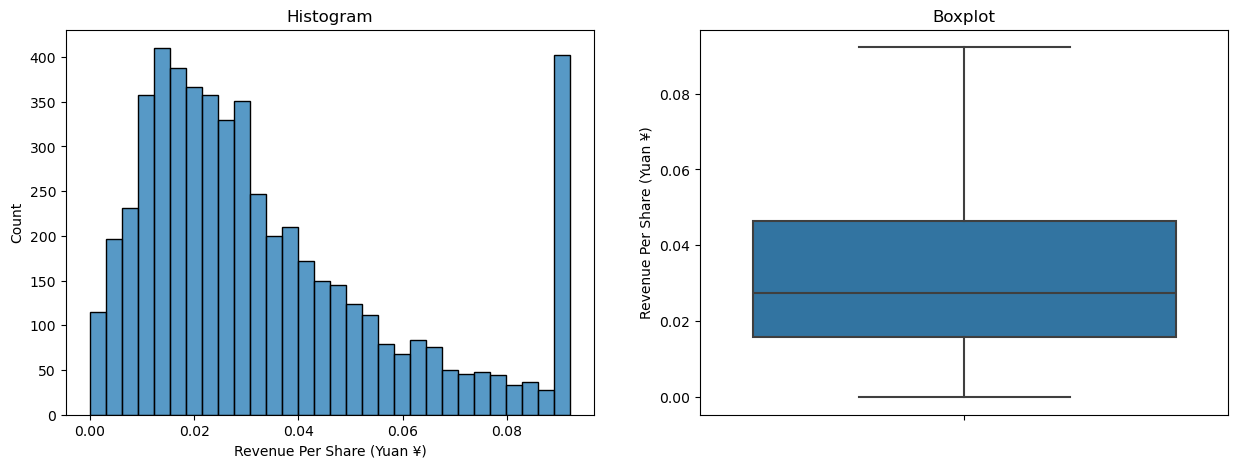

Tax rate (A) - Before Capping


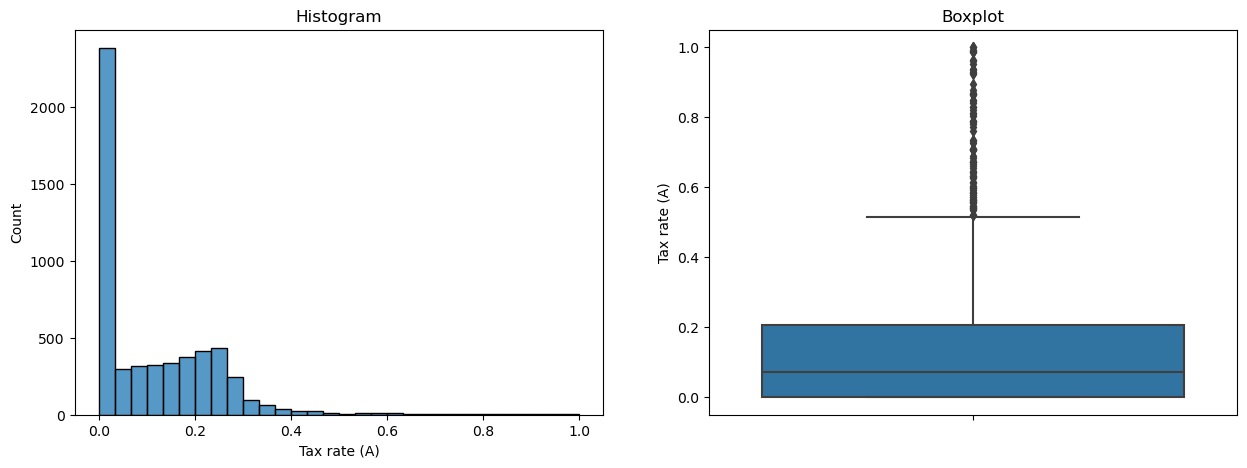


Tax rate (A) - After Capping


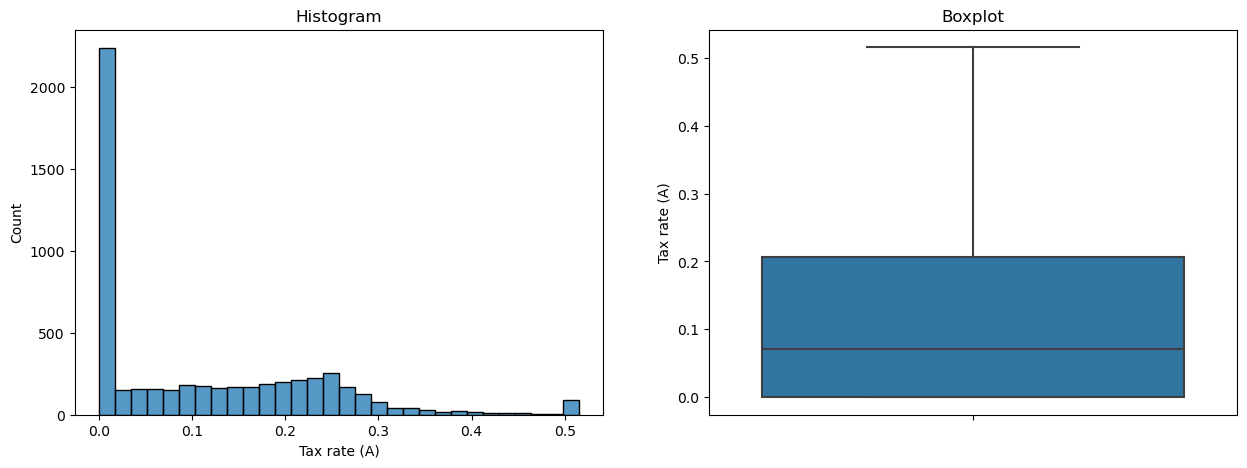

Total Asset Growth Rate - Before Capping


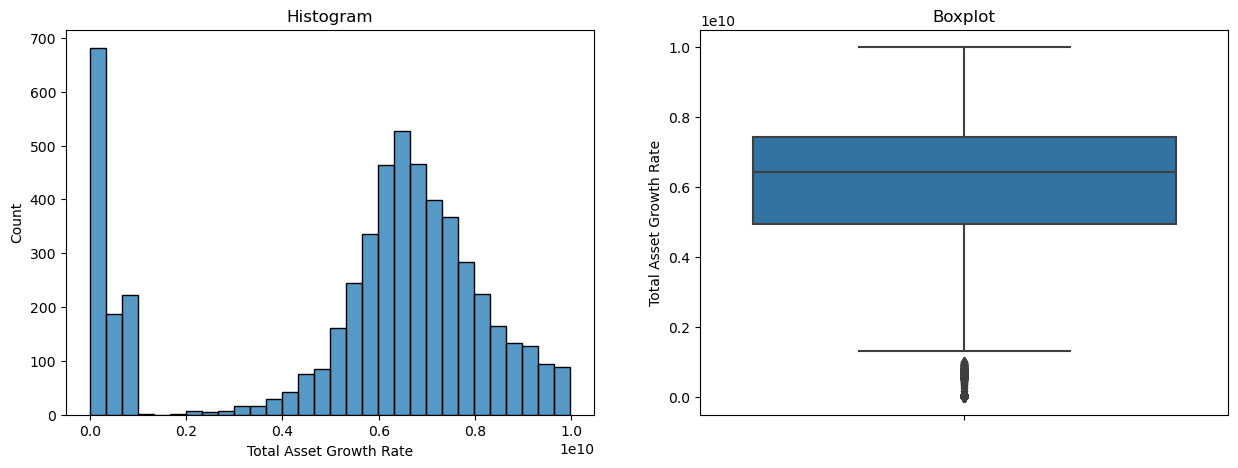


Total Asset Growth Rate - After Capping


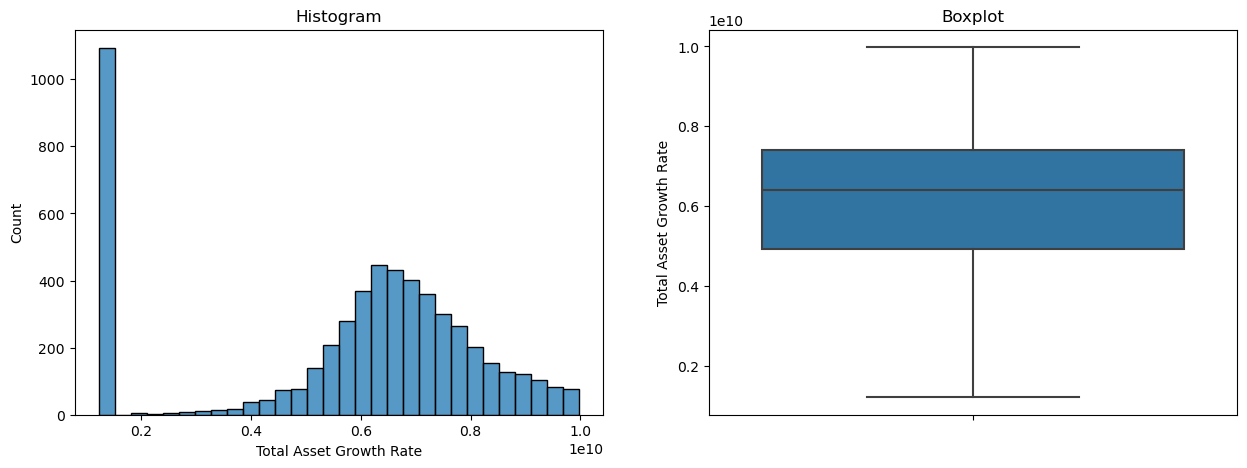

Total Asset Return Growth Rate Ratio - Before Capping


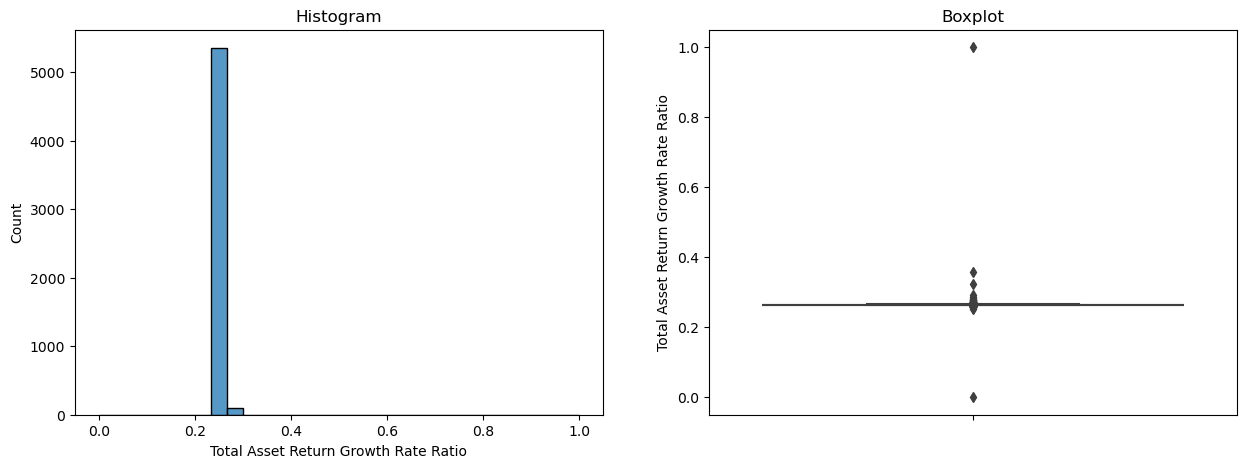


Total Asset Return Growth Rate Ratio - After Capping


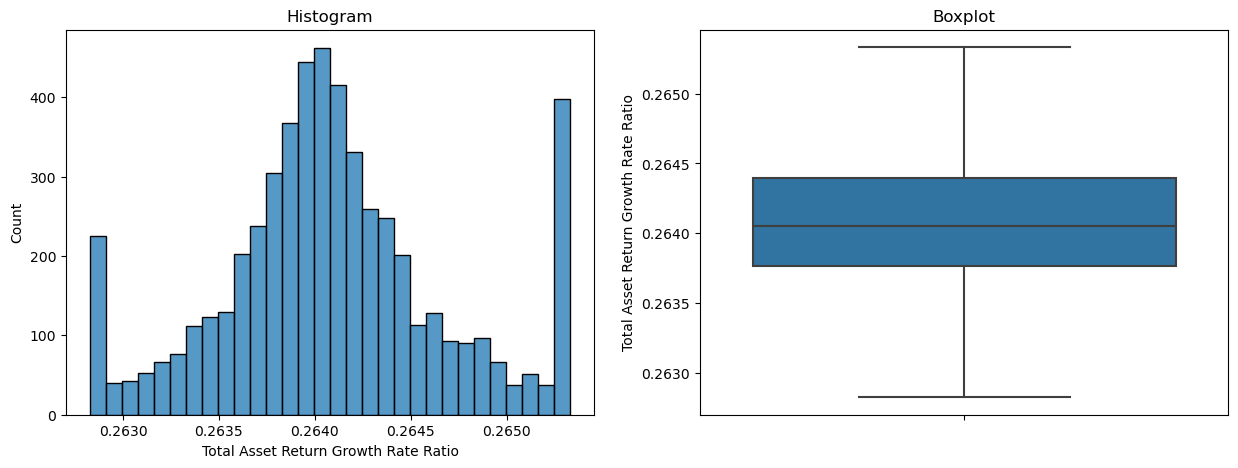

Total Asset Turnover - Before Capping


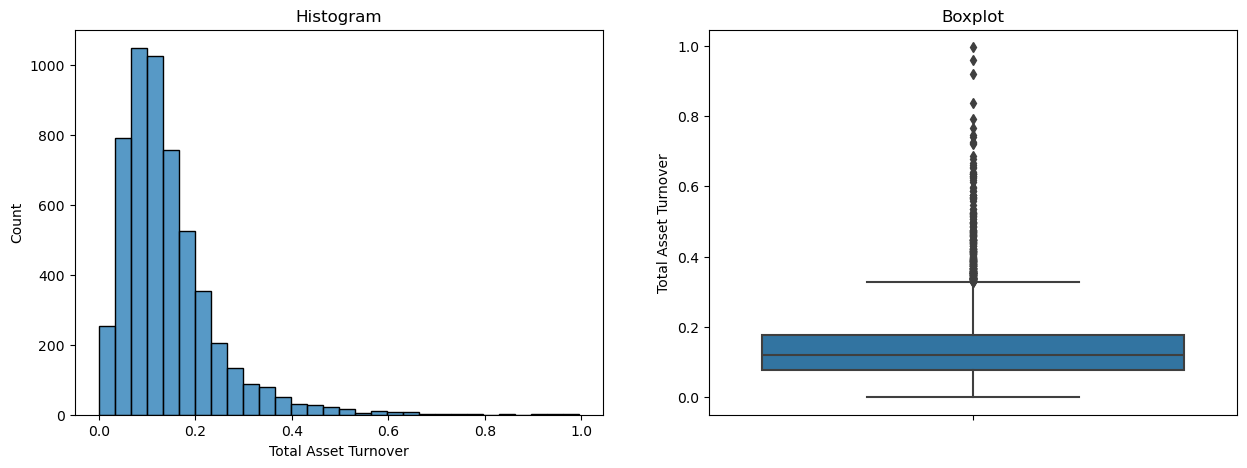


Total Asset Turnover - After Capping


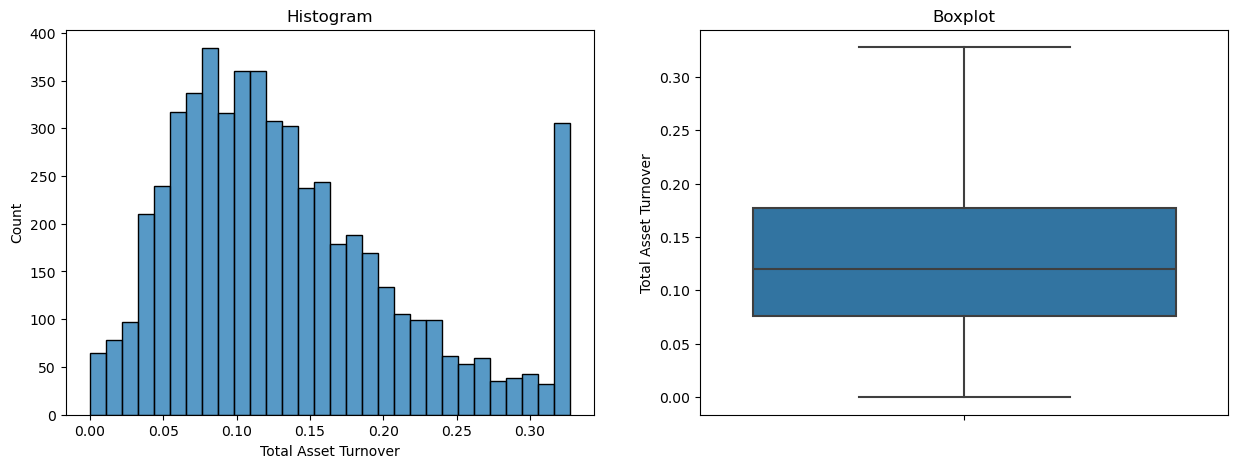

Total debt/Total net worth - Before Capping


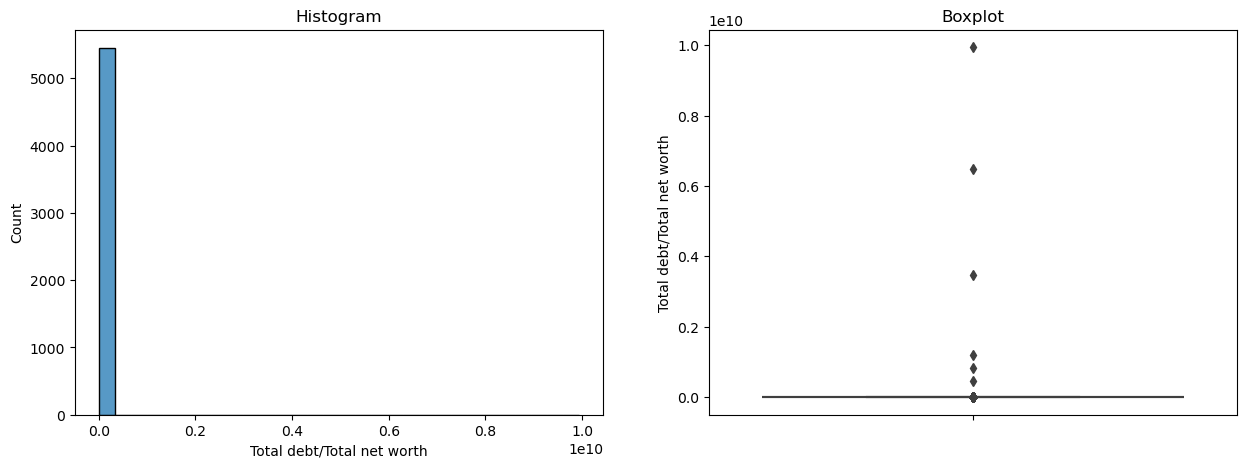


Total debt/Total net worth - After Capping


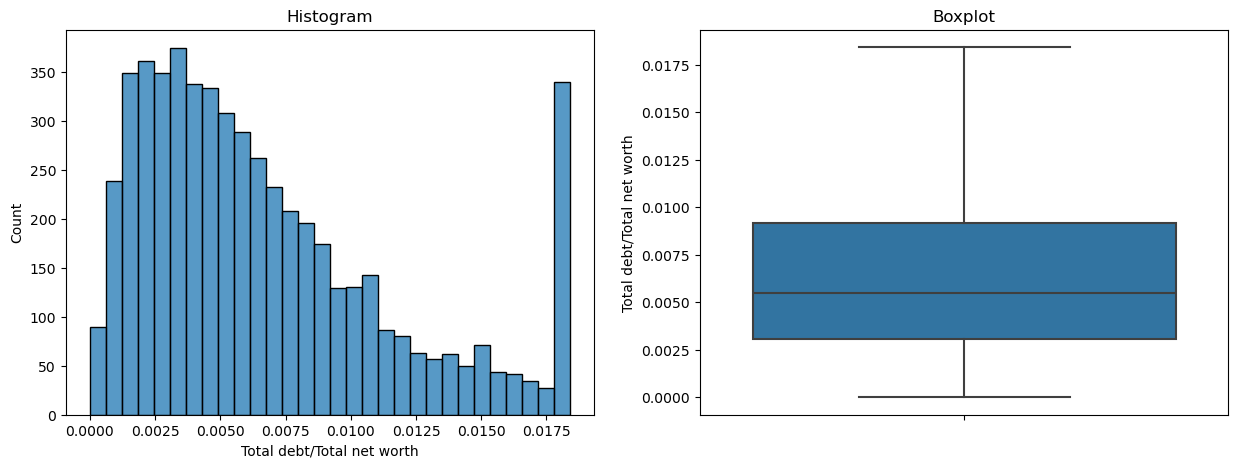

Total expense/Assets - Before Capping


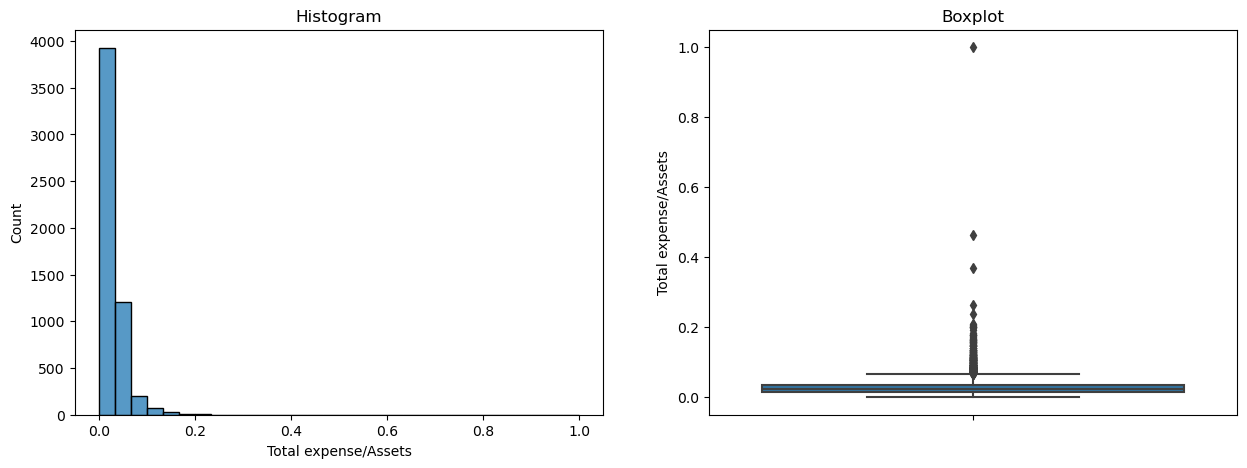


Total expense/Assets - After Capping


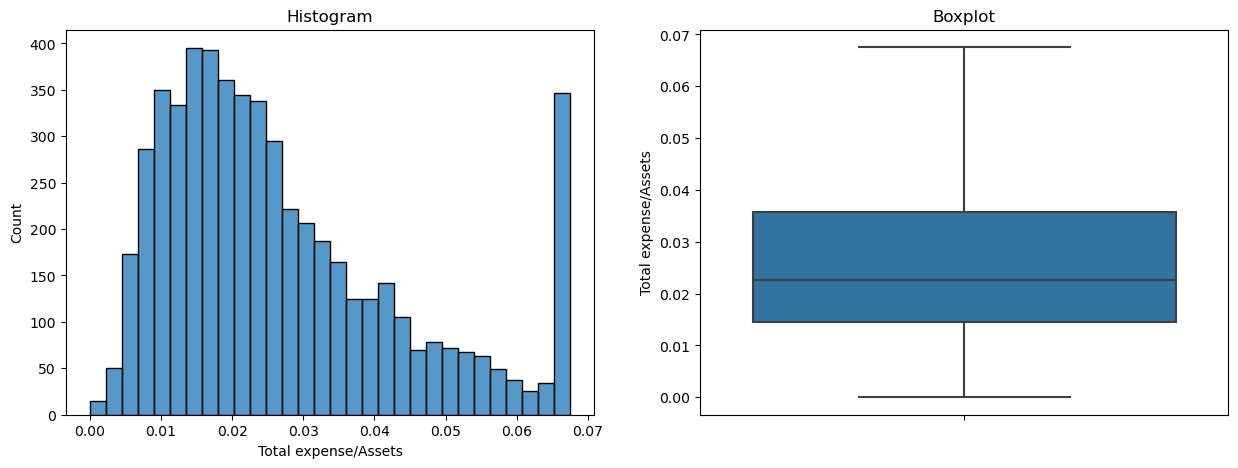

Total income/Total expense - Before Capping


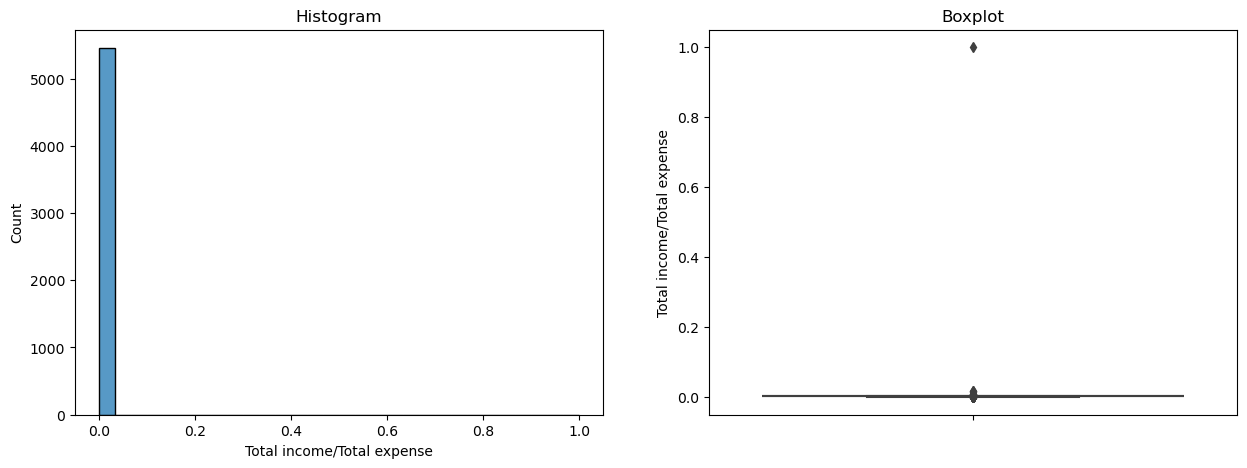


Total income/Total expense - After Capping


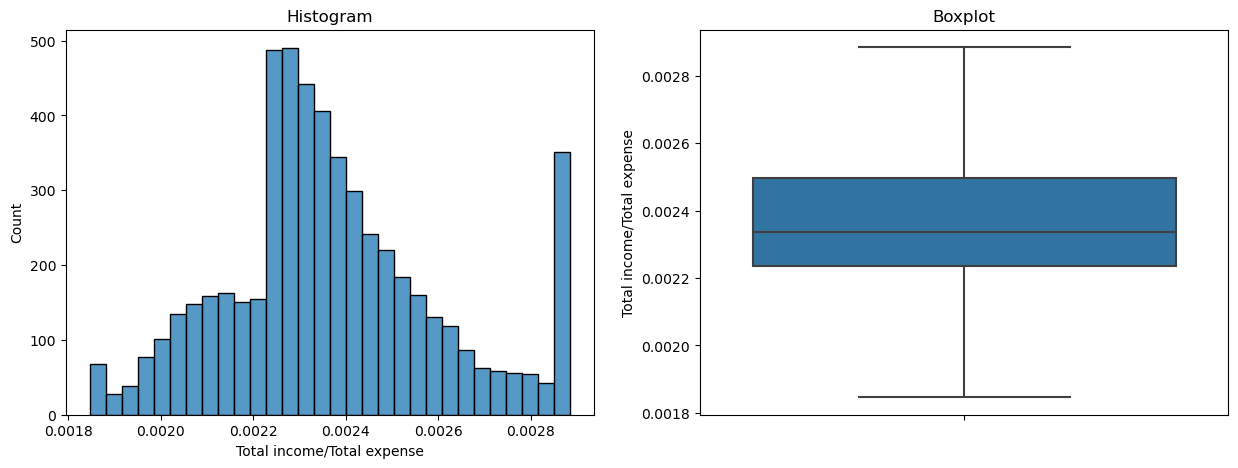

Working Capital/Equity - Before Capping


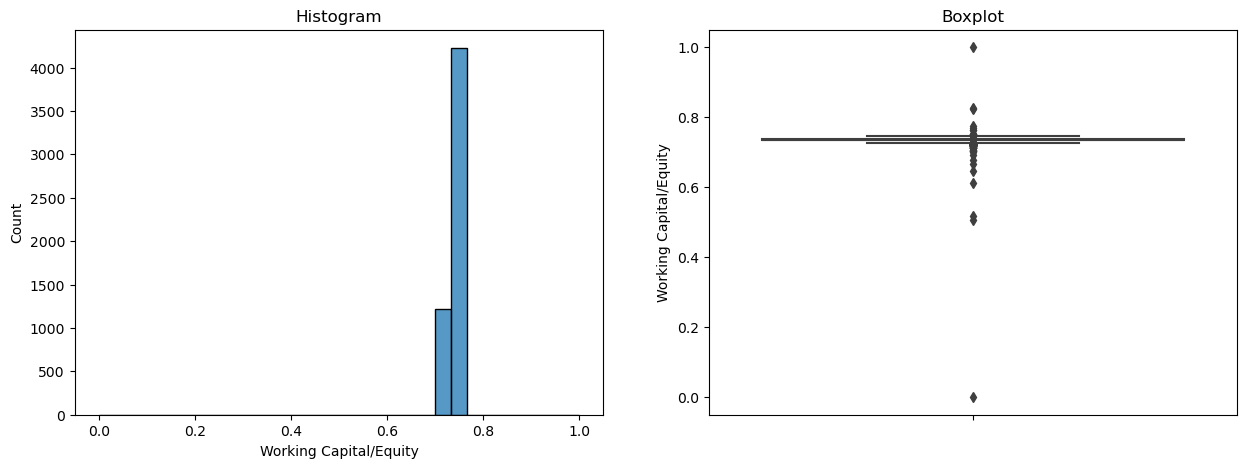


Working Capital/Equity - After Capping


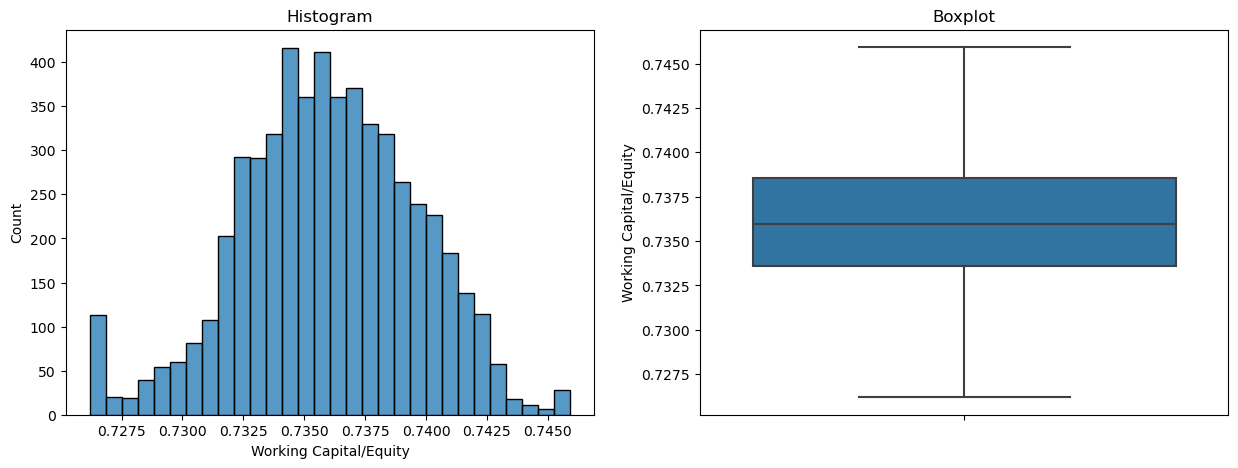

Working capitcal Turnover Rate - Before Capping


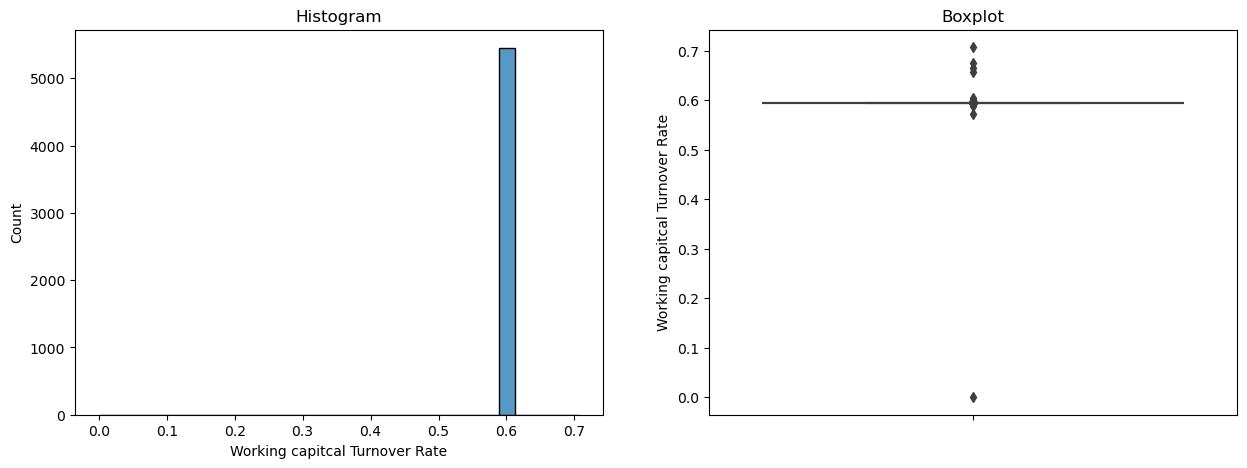


Working capitcal Turnover Rate - After Capping


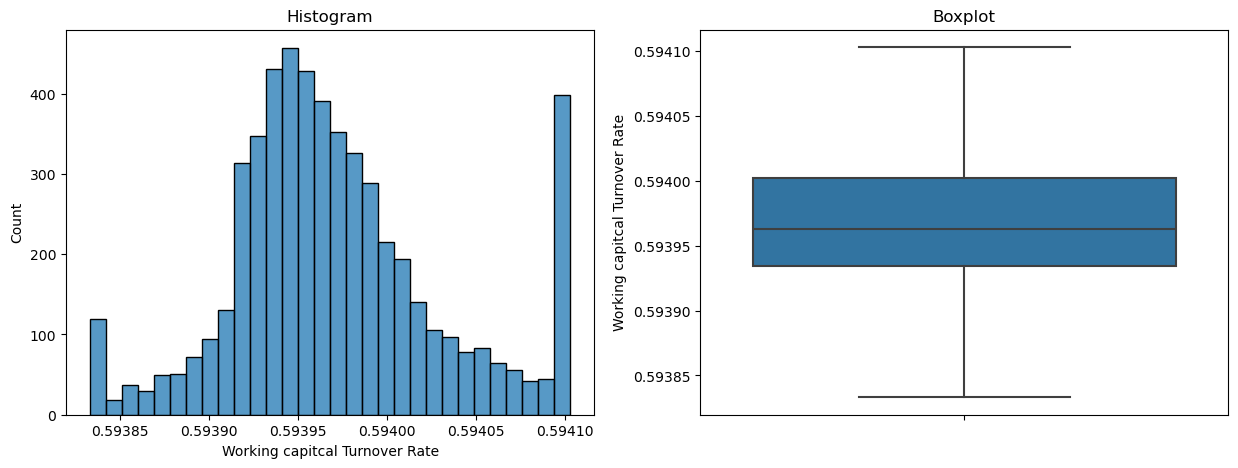

In [27]:
# function for histogram and boxplot
def diagnostic_plots(df, variable):
    # define figure size
    plt.figure(figsize=(15, 5))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# loop outlier columns
for col in outlier_column_skew:
    # run funtion to plot data before capping
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    # run function to plot data after capping
    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_capped, col)

## 5.4. Feature Selection

Seleksi fitur-fitur yang digunakan untuk model menggunakan basis analisis korelasi. Jika data bersifat nominal akan menggunakan analisis korelasi chi squared, sedangkan pada data numerik akan menggunakan analisis spearman.

### 5.4.1. Nominal

In [28]:
# list of columns
nominals = X_train_capped.select_dtypes(include=['int64'])

# set the significance level (alpha)
alpha = 0.05

# create dataframe for correlation
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

# loop columns
for cat_column in nominals:
    # create contingency table for chi2
    contingency_table = pd.crosstab(X_train_capped[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # if p<alpha write yes
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # pd.concat to concatenate the dataframes
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# display results
correlation_df_categorical

categorical_column  chi2-statistic       p-value is_correlated
0  Liability-Assets Flag        99.10233  2.397860e-23           Yes
1        Net Income Flag         0.00000  1.000000e+00            No

In [29]:
# insert correlated to list
list_cat = correlation_df_categorical[(correlation_df_categorical['is_correlated']=='Yes')]['categorical_column'].to_list()

# display number of correlated columns
len(list_cat)

1

Insight:
- Hanya 1 kolom yaitu Liability-Assets Flag yang memiliki korelasi dengan kolom Bangkrupt?

### 5.4.2. Numerical 

In [30]:
# list of columns
num_col = X_train_capped.select_dtypes(include=['float64'])

# set the significance level (alpha)
alpha = 0.05

# create dataframe
correlation_df_num = pd.DataFrame(columns=['numerical column', 'correlation-statistic', 'p-value', 'is_correlated'])

# loop columns
for cont_column in num_col:
    # use spearman for correlation statistics
    corr, p = spearmanr(X_train_capped[cont_column], y_train)
    
    # if p<alpha write yes
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # pd.concat to concatenate the dataframes
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'numerical column': [cont_column], 'correlation-statistic': [corr], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# display results
correlation_df_num

numerical column  correlation-statistic  \
0   ROA(C) before interest and depreciation before...              -0.226323   
1              ROA(A) before interest and % after tax              -0.224664   
2   ROA(B) before interest and depreciation after tax              -0.227228   
3                              Operating Gross Margin              -0.158153   
4                         Realized Sales Gross Margin              -0.156877   
5                               Operating Profit Rate              -0.189961   
6                           Pre-tax net Interest Rate              -0.221732   
7                         After-tax net Interest Rate              -0.221944   
8         Non-industry income and expenditure/revenue              -0.198519   
9                Continuous interest rate (after tax)              -0.229322   
10                             Operating Expense Rate               0.015137   
11              Research and development expense rate              -0.036641   
12                                     Cash flow rate              -0.146703   
13                Interest-bearing debt interest rate               0.104029   
14                                       Tax rate (A)              -0.160464   
15                            Net Value Per Share (B)              -0.210986   
16                            Net Value Per Share (A)              -0.210783   
17                            Net Value Per Share (C)              -0.209822   
18            Persistent EPS in the Last Four Seasons              -0.241192   
19                                Cash Flow Per Share              -0.134416   
20                         Revenue Per Share (Yuan ¥)              -0.065179   
21                Operating Profit Per Share (Yuan ¥)              -0.195919   
22           Per Share Net profit before tax (Yuan ¥)              -0.235320   
23            Realized Sales Gross Profit Growth Rate              -0.103096   
24                       Operating Profit Growth Rate              -0.100568   
25                   After-tax Net Profit Growth Rate              -0.140682   
26                     Regular Net Profit Growth Rate              -0.138387   
27                  Continuous Net Profit Growth Rate              -0.143061   
28                            Total Asset Growth Rate              -0.087568   
29                              Net Value Growth Rate              -0.208367   
30               Total Asset Return Growth Rate Ratio              -0.123156   
31                                Cash Reinvestment %              -0.093990   
32                                      Current Ratio              -0.188690   
33                                        Quick Ratio              -0.198787   
34                             Interest Expense Ratio              -0.139922   
35                         Total debt/Total net worth               0.216080   
36                                       Debt ratio %               0.214274   
37                                   Net worth/Assets              -0.214274   
38               Long-term fund suitability ratio (A)              -0.124438   
39                               Borrowing dependency               0.206828   
40                   Contingent liabilities/Net worth               0.025945   
41                   Operating profit/Paid-in capital              -0.195783   
42              Net profit before tax/Paid-in capital              -0.235766   
43        Inventory and accounts receivable/Net value               0.087956   
44                               Total Asset Turnover              -0.075327   
45                       Accounts Receivable Turnover              -0.024828   
46                            Average Collection Days               0.028767   
47                    Inventory Turnover Rate (times)               0.006525   
48                    Fixed Assets Turnover Frequency               0.039214   
49                    Net Worth Turno

In [31]:
# insert correlated to list
list_num = correlation_df_num[(correlation_df_num['is_correlated']=='Yes')]['numerical column'].to_list()

# display number of correlated columns
len(list_num)

84

Insight:
- Terdapat 84 kolom numerikal yang berpengaruh pada kolom target

### 5.4.3. Total Feature Selected

In [32]:
# combine list
list_col = list_cat + list_num

# display number of total columns
len(list_col)

85

Insight:
- Secara total, 85 kolom yang diseleksi menjadi fitur-fitur dalam model

## 5.5. Balancing, Scaling, Dimension Reduction

Sebelum training dilakukan pada masing-masing model, perlu dilakukan balancing data, scaling, dan reduksi dimensi. Balancing diperlukan agar data tidak hanya mempelajari data mayoritas namun juga minoritas, dalam hal ini target=0 menjadi mayoritas hingga data kesulitan mempelajari target=1. Sedangkan scaling berfungsi menyetarakan angka-angka dalam data agar berada dalam sat skala yang sama. Lalu reduksi dimensi atau PCA digunakan agar model menggunakan fitur yang tidak terlalu banyak untuk mengurangi kemungkinan overfitting. Seluruh proses dimasukkan ke dalam pipeline agar mempermudah alur serta penyimpanan di akhir

Pembuatan pipeline untuk scaling serta reduksi dimensi dengan MinMaxScaler dan PCA

In [33]:
# pipeline to scale and PCA numeric column
num_pipeline_pre = make_pipeline(MinMaxScaler(), PCA(n_components=0.85))

# preprocessing pipeline to combine and transform the data
preprocessing_pipeline_pre = ColumnTransformer([
    ('pipe_num', num_pipeline_pre, list_num),
    ('pipe_cat', 'passthrough', list_cat)
])

# display pipeline
preprocessing_pipeline_pre

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.85))]),
                                 ['ROA(C) before interest and depreciation '
                                  'before interest',
                                  'ROA(A) before interest and % after tax',
                                  'ROA(B) before interest and depreciation '
                                  'after tax',
                                  'Operating Gross Margin',
                                  'Realized Sales Gross Margin',
                                  'Operating Profit Rate',
                                  'Pre-tax net Inte...
                                  'Operating Profit Per Share (Yuan ¥)',
                                  'Per Share Net profit before tax (Yuan ¥)',
                                  'Realized Sales Gross Profit Growth Rate',
                                  'Operating Profit Growth Rate',
                                  'After-tax Net Profit Growth Rate',
                                  'Regular Net Profit Growth Rate',
                                  'Continuous Net Profit Growth Rate',
                                  'Total Asset Growth Rate',
                                  'Net Value Growth Rate',
                                  'Total Asset Return Growth Rate Ratio', ...]),
                                ('pipe_cat', 'passthrough',
                                 ['Liability-Assets Flag'])])

Pipeline dengan model svc untuk cek hasil sebelum balancing

In [34]:
# create pipeline with model for pre-balanced data
clfsvmpre = make_pipeline(preprocessing_pipeline_pre, SVC())

# train pipeline on pre-balanced data
clfsvmpre.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('svc', SVC())])

Balancing data dengan metode SMOTE menggunakan strategi minority agar jumlah data target 1 dan 0 sama

In [35]:
# balancing using SMOTE
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=30)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_capped, y_train)

# display number of data after balancing
y_train_balanced.value_counts()

Bankrupt?
0    5279
1    5279
Name: count, dtype: int64

Membuat pipeline untuk cek hasil setelah proses balancing

In [36]:
# pipeline to scale and PCA numeric column
num_pipeline = make_pipeline(MinMaxScaler(), PCA(n_components=0.85))

# preprocessing pipeline to combine and transform the data
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_num),
    ('pipe_cat', 'passthrough', list_cat)
])

# diplay pipeline
preprocessing_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.85))]),
                                 ['ROA(C) before interest and depreciation '
                                  'before interest',
                                  'ROA(A) before interest and % after tax',
                                  'ROA(B) before interest and depreciation '
                                  'after tax',
                                  'Operating Gross Margin',
                                  'Realized Sales Gross Margin',
                                  'Operating Profit Rate',
                                  'Pre-tax net Inte...
                                  'Operating Profit Per Share (Yuan ¥)',
                                  'Per Share Net profit before tax (Yuan ¥)',
                                  'Realized Sales Gross Profit Growth Rate',
                                  'Operating Profit Growth Rate',
                                  'After-tax Net Profit Growth Rate',
                                  'Regular Net Profit Growth Rate',
                                  'Continuous Net Profit Growth Rate',
                                  'Total Asset Growth Rate',
                                  'Net Value Growth Rate',
                                  'Total Asset Return Growth Rate Ratio', ...]),
                                ('pipe_cat', 'passthrough',
                                 ['Liability-Assets Flag'])])

In [37]:
# create pipeline with model for balanced data
clfsvm = make_pipeline(preprocessing_pipeline, SVC())

# train pipeline on balanced data
clfsvm.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('svc', SVC())])

Cek nilai sebelum dan sesudah balancing

In [38]:
# check train results
print(classification_report(y_train, clfsvmpre.predict(X_train_capped)))
print(classification_report(y_train_balanced, clfsvm.predict(X_train_balanced)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5279
           1       1.00      0.11      0.19       176

    accuracy                           0.97      5455
   macro avg       0.99      0.55      0.59      5455
weighted avg       0.97      0.97      0.96      5455

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5279
           1       0.94      1.00      0.97      5279

    accuracy                           0.97     10558
   macro avg       0.97      0.97      0.97     10558
weighted avg       0.97      0.97      0.97     10558



Insight:
- Terlihat bahwa nilai setelah balancing jauh lebih tinggi dari sebelum balancing
- Juga jumlah data setelah balancing terlihat seimbang antara 0 dan 1

# 6. Model Definition

Penggunaan model dalam dataset ini dibagi menjadi 4 untuk menemukan model apa yang terbaik untuk memprediksi apakah usaha akan bangkrut. Model-model tersebut adalah: `SVM`, `K-Nearest Neighbors`, `Decision Tree`, `Random Forest`. 

## 6.1. SVM

Fitting data train yang sudah dilakukan balancing ke dalam model SVM

In [39]:
# create pipeline for SVM
clfsvm = make_pipeline(preprocessing_pipeline, SVC())

# train model on data
clfsvm.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('svc', SVC())])

Dalam data, angka 1 atau Positif adalah bangkrutnya usaha tersebut. Maka, training dilakukan dengan melihat nilai recall dikarenakan prediksi dataset usaha bangkrut berusaha mengurangi nilai False Negative atau ketika diprediksi tidak bangkrut namun ternyata bangkrut. 

In [40]:
# create function to check recall
def recall_check(clf, X, y):
  y_pred = clf.predict(X)

  return recall_score(y, y_pred)

Cek nilai recall model pada train dan test

In [41]:
# check recall score
print('Recall - Train : ', recall_check(clfsvm, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', recall_check(clfsvm, X_test_capped, y_test))

Recall - Train :  0.9967796931236976
Recall - Test  :  0.6590909090909091


Insight:
- Hasil nilai recall pada train tinggi
- Hasil nilai recall pada test berbeda sangat signifikan
- Perbedaan yang besar menandakan ketidakstabilan model saat prediksi data inference

Cek nilai cross-validation untuk melihat kinerja model jika dijalankan berkali-kali

In [42]:
# check recall cross validation
recall_cross_val = cross_val_score(clfsvm,
                                     X_train_balanced,
                                     y_train_balanced,
                                     cv=5,
                                     scoring="recall")

print('SVM Score')
print('Recall Score - All - Cross Validation  : ', recall_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

SVM Score
Recall Score - All - Cross Validation  :  [0.9905303  0.99810606 0.99621212 0.99146919 0.9905303 ]
Recall Score - Mean - Cross Validation :  0.9933695964383167
Recall Score - Std - Cross Validation  :  0.0031701338222313857
Recall Score - Range of Test-Set       :  0.9901994626160853 - 0.9965397302605481


Insight:
- Terlihat hasil cross validation memiliki 5 nilai yang semuanya tidak berbeda jauh, sehingga menandakan kestabilan model dalam memprediksi
- Rata-rata 0.99 menunjukkan hasil nilai recall model secara rata-rata dalam 5x cross validation. Model mampu menangkap 99.2% data positif
- std atau standard deviasi berarti model hanya memiliki inkonsistensi ±0.3% dari hasil prediksi. Hal ini kembali menunjukkan stabilnya model dalam memprediksi.

## 6.2. KNN

Fitting data train yang sudah dilakukan balancing ke dalam model KNN

In [43]:
# create pipeline for KNN
clfknn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

# train model on data
clfknn.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Cek nilai recall model pada train dan test

In [44]:
# check recall score
print('Recall - Train : ', recall_check(clfknn, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', recall_check(clfknn, X_test_capped, y_test))

Recall - Train :  1.0
Recall - Test  :  0.8409090909090909


Insight:
- Hasil nilai recall pada train sempurna
- Hasil nilai recall pada test berbeda cukup signifikan
- Perbedaan yang besar menandakan ketidakstabilan model saat prediksi data inference, juga hasil train yang 100% menandakan overfit

Cek nilai cross-validation untuk melihat kinerja model jika dijalankan berkali-kali

In [45]:
# check recall cross validation
recall_cross_val = cross_val_score(clfknn,
                                     X_train_balanced,
                                     y_train_balanced,
                                     cv=5,
                                     scoring="recall")

print('KNN Score')
print('Recall Score - All - Cross Validation  : ', recall_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

KNN Score
Recall Score - All - Cross Validation  :  [1.         1.         1.         0.99905213 1.        ]
Recall Score - Mean - Cross Validation :  0.9998104265402844
Recall Score - Std - Cross Validation  :  0.00037914691943128357
Recall Score - Range of Test-Set       :  0.9994312796208531 - 1.0001895734597157


Insight:
- Terlihat hasil cross validation memiliki 5 nilai yang semuanya tidak berbeda jauh, sehingga menandakan kestabilan model dalam memprediksi
- Rata-rata 0.99 menunjukkan hasil nilai recall model secara rata-rata dalam 5x cross validation. Model mampu menangkap 99.9% data positif
- std atau standard deviasi berarti model hanya memiliki inkonsistensi ±0.04% dari hasil prediksi. Hal ini kembali menunjukkan stabilnya model dalam memprediksi.

## 6.3. Decision Tree

Fitting data train yang sudah dilakukan balancing ke dalam model Decision Tree

In [46]:
# create pipeline for decision tree
clftree = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

# train model on data
clftree.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Cek nilai recall model pada train dan test

In [47]:
# check recall score
print('Recall - Train : ', recall_check(clftree, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', recall_check(clftree, X_test_capped, y_test))

Recall - Train :  1.0
Recall - Test  :  0.38636363636363635


Insight:
- Hasil nilai recall pada train sempurna
- Hasil nilai recall pada test berbeda sangat signifikan
- Perbedaan yang besar menandakan ketidakstabilan model saat prediksi data inference, juga hasil train yang 100% menandakan overfit

Cek nilai cross-validation untuk melihat kinerja model jika dijalankan berkali-kali

In [48]:
# check recall cross validation
recall_cross_val = cross_val_score(clftree,
                                     X_train_balanced,
                                     y_train_balanced,
                                     cv=5,
                                     scoring="recall")

print('Decision Tree Score')
print('Recall Score - All - Cross Validation  : ', recall_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

Decision Tree Score
Recall Score - All - Cross Validation  :  [0.95075758 0.96117424 0.95643939 0.95450237 0.97253788]
Recall Score - Mean - Cross Validation :  0.9590822921154676
Recall Score - Std - Cross Validation  :  0.0075191830889287155
Recall Score - Range of Test-Set       :  0.9515631090265388 - 0.9666014752043963


Insight:
- Terlihat hasil cross validation memiliki 5 nilai yang semuanya tidak berbeda jauh, sehingga menandakan kestabilan model dalam memprediksi
- Rata-rata 0.96 menunjukkan hasil nilai recall model secara rata-rata dalam 5x cross validation. Model mampu menangkap 96% data positif
- std atau standard deviasi berarti model hanya memiliki inkonsistensi ±0.6% dari hasil prediksi. Hal ini kembali menunjukkan stabilnya model dalam memprediksi.

## 6.4. Random Forest

Fitting data train yang sudah dilakukan balancing ke dalam model Random Forest

In [49]:
# create pipeline for random forest
clforest = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

# train model on data
clforest.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('randomforestclassifier', RandomForestClassifier())])

Cek nilai recall model pada train dan test

In [50]:
# check recall score
print('Recall - Train : ', recall_check(clforest, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', recall_check(clforest, X_test_capped, y_test))

Recall - Train :  1.0
Recall - Test  :  0.45454545454545453


Insight:
- Hasil nilai recall pada train sempurna
- Hasil nilai recall pada test berbeda sangat signifikan
- Perbedaan yang besar menandakan ketidakstabilan model saat prediksi data inference, juga hasil train yang 100% menandakan overfit

Cek nilai cross-validation untuk melihat kinerja model jika dijalankan berkali-kali

In [51]:
# check recall cross validation
recall_cross_val = cross_val_score(clforest,
                                     X_train_balanced,
                                     y_train_balanced,
                                     cv=5,
                                     scoring="recall")

print('Random Forest Score')
print('Recall Score - All - Cross Validation  : ', recall_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()))

Random Forest Score
Recall Score - All - Cross Validation  :  [0.98484848 0.99621212 0.99242424 0.99620853 0.99431818]
Recall Score - Mean - Cross Validation :  0.9928023122217435
Recall Score - Std - Cross Validation  :  0.004217423139341148
Recall Score - Range of Test-Set       :  0.9885848890824024 - 0.9970197353610847


Insight:
- Terlihat hasil cross validation memiliki 5 nilai yang semuanya tidak berbeda jauh, sehingga menandakan kestabilan model dalam memprediksi
- Rata-rata 0.99 menunjukkan hasil nilai recall model secara rata-rata dalam 5x cross validation. Model mampu menangkap 99% data positif
- std atau standard deviasi berarti model hanya memiliki inkonsistensi ±0.2% dari hasil prediksi. Hal ini kembali menunjukkan stabilnya model dalam memprediksi.

# 7. Hyperparameter Tuning

Tuning hyperparameter bertujuan untuk meningkatkan performa model dengan melihat parameter apa yang paling baik untuk model tersebut.

## 7.1. KNN Tuning

Tuning parameter untuk KNN dengan parameter `n-neighbors` dan `weights`

In [52]:
# create parameter dictionary
param_grid = {'kneighborsclassifier__n_neighbors': [1, 5, 10, 25, 50],  
              'kneighborsclassifier__weights': ['uniform', 'distance']} 

# randomized search
gridknn = RandomizedSearchCV(clfknn, param_distributions=param_grid, cv=5, n_iter=10, random_state=30, n_jobs=-1, scoring='recall')  # Adjust 'scoring' metric as needed
gridknn.fit(X_train_balanced, y_train_balanced)

# display results
print('Best cross-validation recall score : {:.4f}'.format(gridknn.best_score_))
print('Best parameters : ', gridknn.best_params_)

Best cross-validation recall score : 1.0000
Best parameters :  {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 5}


Insight:
- Parameter terbaik untuk KNN adalah weights:distance dan n_neighbors:5
- Nilai terbaik 100%

Memasukkan hasil parameter terbaik ke dalam pipeline

In [53]:
# make best parameter into pipeline
best_estimatorknn = gridknn.best_estimator_

# display pipeline
best_estimatorknn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

Cek hasil tuning parameter

In [54]:
# check recall score
print('Recall KNN - Train : ', recall_check(clfknn, X_train_balanced, y_train_balanced))
print('Recall KNN - Test  : ', recall_check(clfknn, X_test_capped, y_test), '\n')

print('Recall After Tuning - Train : ', recall_check(best_estimatorknn, X_train_balanced, y_train_balanced))
print('Recall After Tuning - Test  : ', recall_check(best_estimatorknn, X_test_capped, y_test))

Recall KNN - Train :  1.0
Recall KNN - Test  :  0.8409090909090909 

Recall After Tuning - Train :  1.0
Recall After Tuning - Test  :  0.8409090909090909


Insight:
- Nilai sebelum dan sesudah tuning tidak ada perbedaan

## 7.2. SVM Tuning

Tuning parameter untuk KNN dengan parameter `C`, `gamma`, dan `kernel`

In [55]:
# create parameter dictionary
param_grid_svc = {'svc__C': [0.001, 0.005, 0.01, 0.05, 0.1],
              'svc__gamma': [0.001, 0.005, 0.01, 0.05, 0.1],
              'svc__kernel': ['rbf', 'linear']}

# randomized search
gridsvc = RandomizedSearchCV(clfsvm, param_distributions=param_grid_svc, cv=5, n_iter=20, random_state=30, n_jobs=-1, scoring='recall')
gridsvc.fit(X_train_balanced, y_train_balanced)

# display results
print('Best cross-validation recall score : {:.4f}'.format(gridsvc.best_score_))
print('Best parameters : ', gridsvc.best_params_)

Best cross-validation recall score : 0.9159
Best parameters :  {'svc__kernel': 'rbf', 'svc__gamma': 0.1, 'svc__C': 0.05}


Insight:
- Parameter terbaik untuk KNN adalah kernel:rbf, gamma:0.001, dan C:0.05
- Nilai terbaik cross validation 92%

Memasukkan parameter terbaik ke dalam pipeline

In [56]:
# make best parameter into pipeline
best_estimatorsvc = gridsvc.best_estimator_

# display pipeline
best_estimatorsvc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'before tax (Yuan ¥)',
                                                   'Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('svc', SVC(C=0.05, gamma=0.1))])

Cek nilai recall SVM setelah tuning

In [57]:
# check recall score
print('Recall SVM - Train : ', recall_check(clfsvm, X_train_balanced, y_train_balanced))
print('Recall SVM - Test  : ', recall_check(clfsvm, X_test_capped, y_test), '\n')

print('Recall After Tuning - Train : ', recall_check(best_estimatorsvc, X_train_balanced, y_train_balanced))
print('Recall After Tuning - Test  : ', recall_check(best_estimatorsvc, X_test_capped, y_test))

Recall SVM - Train :  0.9967796931236976
Recall SVM - Test  :  0.6590909090909091 

Recall After Tuning - Train :  0.9179768895624171
Recall After Tuning - Test  :  0.8863636363636364


Insight:
- Terlihat bahwa nilai test setelah tuning naik cukup tinggi
- Namun nilai train turun sedikit
- Nilai test dan train cukup dekat menandakan kestabilan yang lebih tinggi saat inferencing daripada sebelum tuning

## 7.3. Boosting

Boosting adalah salah satu model ensemble learning yang menggabungkan model-model individual untuk menjadi model yang lebih kuat. Boosting dilakukan pada model SVM dengan parameter setelah tuning untuk meningkatkan nilainya.

In [58]:
# create pipeline for boosting using SVM as base model
clfboost = make_pipeline(preprocessing_pipeline, AdaBoostClassifier(SVC(kernel='rbf', C=0.01, gamma=0.05, probability=True, random_state=30),
    n_estimators=50,
    random_state=30))

# train model on data
clfboost.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.85))]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Operating Gross Margin',
                                                   'Realized Sales Gross '
                                                   'Ma...
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio', ...]),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Liability-Assets Flag'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=SVC(C=0.01, gamma=0.05,
                                                  probability=True,
                                                  random_state=30),
                                    random_state=30))])

Cek nilai recall setelah Boosting

In [59]:
# check recall score
print('Recall SVM After Tuning - Train : ', recall_check(best_estimatorsvc, X_train_balanced, y_train_balanced))
print('Recall SVM After Tuning - Test  : ', recall_check(best_estimatorsvc, X_test_capped, y_test), '\n')

print('Recall After Boosting - Train : ', recall_check(clfboost, X_train_balanced, y_train_balanced))
print('Recall After Boosting - Test  : ', recall_check(clfboost, X_test_capped, y_test))

Recall SVM After Tuning - Train :  0.9179768895624171
Recall SVM After Tuning - Test  :  0.8863636363636364 

Recall After Boosting - Train :  0.7952263686304224
Recall After Boosting - Test  :  0.7272727272727273


Insight:
- Setelah proses boosting terlihat model mengalami penurunan dalam performa train maupun test cukup signifikan
- Model SVM tuning memiliki performa lebih baik

# 8. Model Evaluation

Evaluasi model bertujuan untuk mengetahui tingkat kesalahan dan keberhasilan model dalam memprediksi nilai target setelah dilatih dalam model training. Evaluasi dilakukan dengan melihat nilai **Recall** karena ingin memperkecil kemungkinan false negative. Dalam hal ini, memperkecil kemungkinan false negative berarti memperkecil kemungkinan model memprediksi sebuah usaha untuk tidak bangkrut namun kenyataannya bangkrut

## 8.1. SVC Tuned Evaluation

Cek nilai cross validation, classification report, dan confusion matrix pada data test menggunakan model SVM setelah tuning.

--SVM Tuning Recall Score--
Recall - Train :  0.9179768895624171
Recall - Test  :  0.8863636363636364 

--SVM Tuning CV Score--
Recall Score - All - Cross Validation  :  [0.90909091 0.91950758 0.92140152 0.91184834 0.91761364]
Recall Score - Mean - Cross Validation :  0.9158923955191728
Recall Score - Std - Cross Validation  :  0.004668986828721317
Recall Score - Range of Test-Set       :  0.9112234086904515 - 0.9205613823478941 

--SVM Tuning Report--
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1320
           1       0.17      0.89      0.29        44

    accuracy                           0.86      1364
   macro avg       0.59      0.87      0.61      1364
weighted avg       0.97      0.86      0.90      1364
 

Confusion Matrix      : 


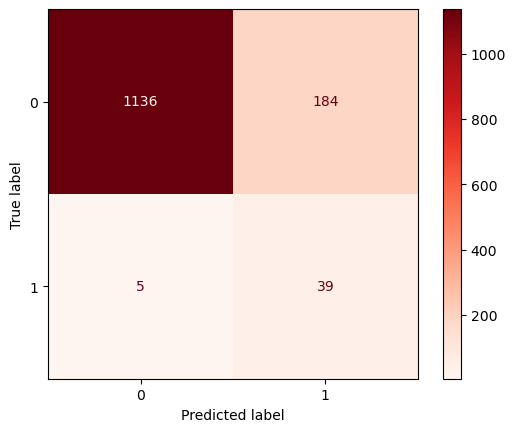

In [60]:
# check default model performance on test-set
y_pred_test = best_estimatorsvc.predict(X_test_capped)

# check recall score
print('--SVM Tuning Recall Score--')
print('Recall - Train : ', recall_check(best_estimatorsvc, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', recall_check(best_estimatorsvc, X_test_capped, y_test), '\n')

# check recall cross validation
recall_cross_val = cross_val_score(best_estimatorsvc,
                                     X_train_balanced,
                                     y_train_balanced,
                                     cv=5,
                                     scoring="recall")

print('--SVM Tuning CV Score--')
print('Recall Score - All - Cross Validation  : ', recall_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()), '\n')

# check performace
print('--SVM Tuning Report--')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_estimatorsvc, X_test_capped, y_test, cmap='Reds'))

Insight:
- True Negative (1136): Model memprediksi dengan benar bahwa usaha tidak bangkrut sebanyak 1136 kali.
- False Positive (184): Model memprediksi dengan salah bahwa usaha akan bangkrut, meskipun aslinya tidak bangkrut sebanyak 184 kali.
- False Negative (5): Model memprediksi dengan salah bahwa usaha tidak bangkrut, meskipun aslinya bangkrut sebanyak 5 kali saja.
- True Positive (39): Model memprediksi dengan benar bahwa usaha akan bangkrut sebanyak 39 kali.
- Nilai recall model tinggi (89%) pada prediksi kelas positif atau bangkrut, sehingga model dapat dikatakan cukup akurat dalam memprediksi apakah suatu usaha akan bangkrut.
- Namun nilai precision model cukup rendah (17%) pada kelas bangkrut, model sering salah dalam mengkategorikan sebuah usaha akan bangkrut walau aslinya tidak bangkrut.
- Nilai train test yang berdekatan menandakan kestabilan model.
- Nilai CV Score yang konsisten di angka 90an serta std yang sangat kecil juga mendukung kestabilan model.

## 8.2. KNN Tuning Evaluation

Cek nilai cross validation, classification report, dan confusion matrix pada data test menggunakan model KNN setelah tuning.

--KNN Tuning Recall Score--
Recall - Train :  1.0
Recall - Test  :  0.8409090909090909 

--KNN Tuning CV Score--
KNN Tuning Score
Recall Score - All - Cross Validation  :  [1. 1. 1. 1. 1.]
Recall Score - Mean - Cross Validation :  1.0
Recall Score - Std - Cross Validation  :  0.0
Recall Score - Range of Test-Set       :  1.0 - 1.0 

--KNN Tuning Report--
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.20      0.84      0.32        44

    accuracy                           0.89      1364
   macro avg       0.60      0.86      0.63      1364
weighted avg       0.97      0.89      0.92      1364
 

Confusion Matrix      : 


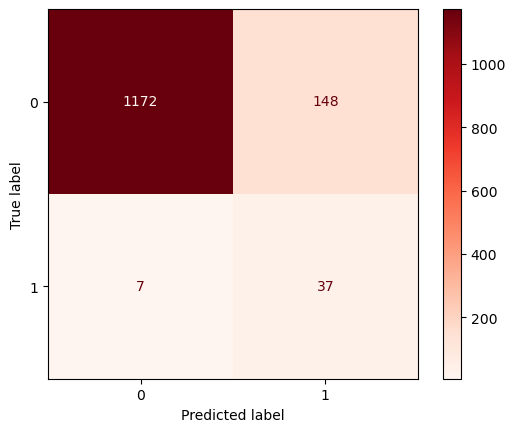

In [61]:
# check default model performance on test-set
y_pred_test = best_estimatorknn.predict(X_test_capped)

# check recall score
print('--KNN Tuning Recall Score--')
print('Recall - Train : ', recall_check(best_estimatorknn, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', recall_check(best_estimatorknn, X_test_capped, y_test), '\n')

# check recall cross validation
recall_cross_val = cross_val_score(best_estimatorknn,
                                     X_train_balanced,
                                     y_train_balanced,
                                     cv=5,
                                     scoring="recall")

print('--KNN Tuning CV Score--')
print('KNN Tuning Score')
print('Recall Score - All - Cross Validation  : ', recall_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_cross_val.mean()-recall_cross_val.std()) , '-', (recall_cross_val.mean()+recall_cross_val.std()), '\n')

# check performace
print('--KNN Tuning Report--')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_estimatorknn, X_test_capped, y_test, cmap='Reds'))

Insight:
- True Negative (1172): Model memprediksi dengan benar bahwa usaha tidak bangkrut sebanyak 1172 kali.
- False Positive (148): Model memprediksi dengan salah bahwa usaha akan bangkrut, meskipun aslinya tidak bangkrut sebanyak 148 kali. Lebih rendah cukup signifikan dibanding model svm tuning
- False Negative (7): Model memprediksi dengan salah bahwa usaha tidak bangkrut, meskipun aslinya bangkrut sebanyak 7 kali. Pada sisi ini, model salah memprediksi sedikit lebih banyak dari model sebelumnya
- True Positive (37): Model memprediksi dengan benar bahwa usaha akan bangkrut sebanyak 37 kali. Lebih rendah dari model sebelumnya
- Nilai recall model cukup tinggi (84%) pada prediksi kelas positif atau bangkrut, sehingga model dapat dikatakan cukup akurat dalam memprediksi apakah suatu usaha akan bangkrut meski lebih rendah dari model svm tuning.
- Namun nilai precision model cukup rendah (20%) pada kelas bangkrut, meski nilai ini lebih tinggi dari model sebelumya, model tetap sering salah dalam mengkategorikan sebuah usaha akan bangkrut walau aslinya tidak bangkrut.
- Nilai sempurna model dalam recall menandakan gejala overfitting.
- Begitu juga pada CV score nilai terlalu sempurna, kemungkinan besar model tidak belajar tapi menghafal.

## 8.3. Overall Evaluation

Berdasarkan kedua model setelah tuning di atas, dapat ditarik kesimpulan bahwa:
1. Kedua model memiliki performa yang cukup mirip satu sama lain. 

2. Kedua model sama-sama lebih kuat dalam nilai recall yaitu prediksi nilai positif(bangkrut) dengan salah prediksi false negative(dianggap tidak bangkrut tapi aslinya bangkrut) yang relatif rendah. 

3. Namun kedua model juga sama-sama memiliki kelemahan dalam sisi precision yaitu prediksi nilai positif(bangkrut) dengan salah prediksi false positive(dianggap bangkrut tapi aslinya tidak bangkrut) yang tinggi. 

4. Maka kedua data dapat dipercayakan untuk menemukan usaha-usaha yang akan bangkrut, namun akan sering salah mengkategorikan usaha-usaha akan bangkrut meski aslinya tidak akan bangkrut.

5. Meskipun kedua model memiliki kemiripan, namun nilai-nilai yang dihasilkan model tetap berbeda. Jika dilihat dari nilai recall, SVM Tuning memiliki nilai yang cukup lebih tinggi dibanding KNN Tuning.

6. Kestabilan model juga terlihat lebih tinggi pada SVM Tuning dibanding KNN Tuning karena nilai train test yang lebih dekat, ditambah nilai train KNN yang bernilai 1 dapat menandakan overfitting. 

7. Karena recall yang cukup dipentingkan dalam menilai apakah suatu usaha akan bangkrut, juga didukung dengan kestabilan model SVM Tuning dibanding KNN Tuning; maka ditentukan bahwa model **SVM Tuning** yang lebih diperlukan dalam klasifikasi ini. 

## 8.4. False Negative Analysis

Analisa data-data yang berupa false negative; dalam hal ini diprediksi tidak bangkrut namun aslinya bangkrut. Dimulai dengan menggabungkan data train

In [62]:
# concat train data
dftest = pd.concat([X_test_capped, y_test], axis=1)

# reset max rows option
pd.reset_option('all')

# display train data
dftest

ROA(C) before interest and depreciation before interest  \
4817                                           0.514064         
1501                                           0.495539         
6403                                           0.504022         
2521                                           0.492907         
507                                            0.461171         
...                                                 ...         
561                                            0.399844         
1031                                           0.487349         
6802                                           0.542047         
1120                                           0.473748         
1289                                           0.514649         

      ROA(A) before interest and % after tax  \
4817                                0.572667   
1501                                0.557621   
6403                                0.566779   
2521                                0.509431   
507                                 0.522296   
...                                      ...   
561                                 0.454617   
1031                                0.530473   
6802                                0.604939   
1120                                0.557076   
1289                                0.583624   

      ROA(B) before interest and depreciation after tax  \
4817                                           0.565876   
1501                                           0.541892   
6403                                           0.552974   
2521                                           0.534397   
507                                            0.513250   
...                                                 ...   
561                                            0.441338   
1031                                           0.534665   
6802                                           0.587879   
1120                                           0.527116   
1289                                           0.567910   

      Operating Gross Margin  Realized Sales Gross Margin  \
4817                0.610523                     0.610523   
1501                0.598596                     0.598596   
6403                0.598711                     0.598711   
2521                0.590899                     0.590899   
507                 0.601183                     0.601198   
...                      ...                          ...   
561                 0.591973                     0.591973   
1031                0.601565                     0.601991   
6802                0.609032                     0.609024   
1120                0.605529                     0.605529   
1289                0.597746                     0.597746   

      Operating Profit Rate  Pre-tax net Interest Rate  \
4817               0.999128                   0.797586   
1501               0.998984                   0.797386   
6403               0.998993                   0.797449   
2521               0.998823                   0.797194   
507                0.998943                   0.797322   
...                     ...                        ...   
561                0.998851                   0.797096   
1031               0.998933                   0.797359   
6802               0.999084                   0.797591   
1120               0.998969                   0.797473   
1289               0.998992                   0.797490   

      After-tax net Interest Rate  \
4817                     0.809500   
1501                     0.809311   
6403                     0.809361   
2521                     0.809153   
507                      0.809252   
...                           ...   
561                      0.809074   
1031                     0.809290   
6802                     0.809473   
1120                     0.809394   
1289                     0.809403   

      Non-industry income and expenditure/revenue  \
4817       

Prediksi data train dengan model yang dipilih sebagai model terbaik

In [63]:
# predict train data with best model
pred = best_estimatorsvc.predict(X_test_capped)

# input predict to train dataframe
dftest['prediction'] = pred
dftest.head()

ROA(C) before interest and depreciation before interest  \
4817                                           0.514064         
1501                                           0.495539         
6403                                           0.504022         
2521                                           0.492907         
507                                            0.461171         

      ROA(A) before interest and % after tax  \
4817                                0.572667   
1501                                0.557621   
6403                                0.566779   
2521                                0.509431   
507                                 0.522296   

      ROA(B) before interest and depreciation after tax  \
4817                                           0.565876   
1501                                           0.541892   
6403                                           0.552974   
2521                                           0.534397   
507                                            0.513250   

      Operating Gross Margin  Realized Sales Gross Margin  \
4817                0.610523                     0.610523   
1501                0.598596                     0.598596   
6403                0.598711                     0.598711   
2521                0.590899                     0.590899   
507                 0.601183                     0.601198   

      Operating Profit Rate  Pre-tax net Interest Rate  \
4817               0.999128                   0.797586   
1501               0.998984                   0.797386   
6403               0.998993                   0.797449   
2521               0.998823                   0.797194   
507                0.998943                   0.797322   

      After-tax net Interest Rate  \
4817                     0.809500   
1501                     0.809311   
6403                     0.809361   
2521                     0.809153   
507                      0.809252   

      Non-industry income and expenditure/revenue  \
4817                                     0.303535   
1501                                     0.303487   
6403                                     0.303578   
2521                                     0.303488   
507                                      0.303461   

      Continuous interest rate (after tax)  ...  No-credit Interval  \
4817                              0.781755  ...            0.624973   
1501                              0.781569  ...            0.623467   
6403                              0.781629  ...            0.624140   
2521                              0.781377  ...            0.623961   
507                               0.781505  ...            0.623188   

      Gross Profit to Sales  Net Income to Stockholder's Equity  \
4817               0.610524                            0.840993   
1501               0.598596                            0.840541   
6403               0.598712                            0.841415   
2521               0.590896                            0.838074   
507                0.601183                            0.839579   

      Liability to Equity  Degree of Financial Leverage (DFL)  \
4817             0.276772                            0.026849   
1501             0.288104                            0.027092   
6403             0.276580                            0.026800   
2521             0.284686                            0.026611   
507              0.278388                            0.026611   

      Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
4817                                           0.565418                 1   
1501                                           0.566567                 1   
6403                                           0.565198                 1   
2521                                           0.564313                 1   
507                                            0.564313                 1   

      Equity to Liability  Ba

Mencari data dimana prediction = 0 dan bankrupt? = 1

In [64]:
# find false negative
false_negatives = dftest[(dftest['Bankrupt?'] == 1) & (dftest['prediction'] == 0)]

# put into dataframe
fneg = pd.DataFrame(false_negatives)

# display data
fneg

ROA(C) before interest and depreciation before interest  \
1750                                           0.506021         
1279                                           0.487886         
4491                                           0.477990         
2095                                           0.494418         
2042                                           0.457905         

      ROA(A) before interest and % after tax  \
1750                                0.571140   
1279                                0.545410   
4491                                0.538323   
2095                                0.567815   
2042                                0.555604   

      ROA(B) before interest and depreciation after tax  \
1750                                           0.564645   
1279                                           0.540554   
4491                                           0.529632   
2095                                           0.549976   
2042                                           0.511805   

      Operating Gross Margin  Realized Sales Gross Margin  \
1750                0.604996                     0.604996   
1279                0.613190                     0.613190   
4491                0.616966                     0.616930   
2095                0.611439                     0.611439   
2042                0.598603                     0.598603   

      Operating Profit Rate  Pre-tax net Interest Rate  \
1750               0.999055                   0.797482   
1279               0.999089                   0.797442   
4491               0.999190                   0.797473   
2095               0.999171                   0.797623   
2042               0.998929                   0.797621   

      After-tax net Interest Rate  \
1750                     0.809410   
1279                     0.809352   
4491                     0.809361   
2095                     0.809537   
2042                     0.809559   

      Non-industry income and expenditure/revenue  \
1750                                     0.303507   
1279                                     0.303364   
4491                                     0.303292   
2095                                     0.303511   
2042                                     0.303760   

      Continuous interest rate (after tax)  ...  No-credit Interval  \
1750                              0.781676  ...            0.624368   
1279                              0.781626  ...            0.624607   
4491                              0.781618  ...            0.622830   
2095                              0.781813  ...            0.622830   
2042                              0.781528  ...            0.622830   

      Gross Profit to Sales  Net Income to Stockholder's Equity  \
1750               0.604992                            0.841902   
1279               0.613191                            0.840386   
4491               0.616962                            0.840159   
2095               0.611440                            0.843782   
2042               0.598601                            0.841477   

      Liability to Equity  Degree of Financial Leverage (DFL)  \
1750             0.287514                            0.027092   
1279             0.280699                            0.027092   
4491             0.276686                            0.027092   
2095             0.288104                            0.026827   
2042             0.283390                            0.026879   

      Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
1750                                           0.566567                 1   
1279                                           0.566567                 1   
4491                                           0.566567                 1   
2095                                           0.565324                 1   
2042                                           0.565544                 1   

      Equity to Liability  Ba

Mengganti nilai bankrupt pada data false negative menjadi 2 agar terpisahkan dan menggambung ke dalam data train

In [65]:
# replacing bankrupt for distinction
fneg['Bankrupt?'].replace(1, 2, inplace=True)

# concat into dataframe
dftest = pd.concat([dftest, fneg])

Cek perbedaan rata-rata nilai usaha tidak bangkrut, bangkrut, dan false negative

In [66]:
# group by the 'cluster' column & calculate mean 
clusterdf = dftest.groupby('Bankrupt?').mean()

# make dataframe
clusterdf = pd.DataFrame(clusterdf)

# display all columns
pd.set_option('display.max_columns', None)

# display the resulting DataFrame
clusterdf = clusterdf.reset_index()
clusterdf

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          0                                           0.505927         
1          1                                           0.434728         
2          2                                           0.484844         

   ROA(A) before interest and % after tax  \
0                                0.561145   
1                                0.501741   
2                                0.555659   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.554845                0.607829   
1                                           0.494154                0.601704   
2                                           0.539322                0.609039   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.607796               0.999025   
1                     0.601692               0.998913   
2                     0.609032               0.999087   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797470                     0.809380   
1                   0.797229                     0.809177   
2                   0.797528                     0.809444   

   Non-industry income and expenditure/revenue  \
0                                     0.303533   
1                                     0.303365   
2                                     0.303487   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.781638            1.960658e+09   
1                              0.781415            1.501864e+09   
2                              0.781652            1.875600e+09   

   Research and development expense rate  Cash flow rate  \
0                           1.967086e+09        0.466512   
1                           2.104136e+09        0.461187   
2                           2.854000e+09        0.458411   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000361      0.116216                 0.188650   
1                             0.000588      0.043427                 0.163639   
2                             0.000556      0.121551                 0.202773   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.188617                 0.188644   
1                 0.163572                 0.164002   
2                 0.202773                 0.202832   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.227344             0.323186   
1                                 0.198469             0.317002   
2                                 0.226605             0.303394   

   Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
0                    0.034944                             0.107339   
1                    0.020764                             0.091276   
2                    0.022382                             0.108688   

   Per Share Net profit before tax (Yuan ¥)  \
0                                  0.182977   
1                                  0.156281   
2                                  0.182496   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                 0.022112                      0.848053   
1                                 0.022083                      0.847985   
2                                 0.022131                      0.848014   

   After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
0                          0.689449                        0.689449   
1                          0.689268                        0.689269   
2                          0.689688                        0.689687   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                           0.217599             5.624186e+09   
1                 

Ciri-ciri data Tidak Bangkrut:
1. Profit atau keuntungan seperti ROA, serta Revenue atau pendapatan lebih tinggi dari data bangkrut
2. Pengeluaran untuk riset lebih rendah dari data bangkrut, namun pengeluaran untuk operasi bisnis lebih tinggi
4. Tingkat pajak tinggi
5. Tingkat pertumbuhan aset juga lebih tinggi dari data bangkrut
6. Quick Ratio dan Current Ratio (rasio lancar) juga bernilai lebih tinggi
7. Secara keseluruhan, hutang lebih rendah dari data bangkrut
8. Secara umum, hal-hal yang berhubugan dengan aset perusahaan seperti Total Asset Turnover, Average Collection Days dan Fixed Assets Turnover Frequency bernilai lebih baik
9. Begitu juga dengan data-data uang tunai seperti Cash/Total Assets

Ciri-ciri data Bangkrut:
1. Profit dan Revenue lebih rendah
2. Pengeluaran operasional rendah tapi pengeluaran riset tinggi
3. Tingkat pajak rendah
4. Pertumbuhan aset lebih lambat dari data tidak bangkrut
5. Hutang lebih tinggi dari data tidak bangkrut
6. Mertrik untuk aset-aset perusahaan juga bernilai lebih buruk
7. Begitu juga untuk metrik uang tunai

Ciri-ciri False Negative:
1. Memiliki beberapa ciri yang mirip data **tidak** bangkrut seperti ROA, pengeluaran operasional, dan tingkat pajak yang tinggi.
2. Namun juga memiliki ciri yang mirip data **bangkrut** seperti metrik aset rendah, hutang tinggi, metrik uang tunai yang rendah.


Pembelajaran untuk model kedepannya:
1. Karena kemiripan pada kedua sisi Bangkrut dan Tidak Bangkrut inilah model salah memprediksi.
2. Kedepannya untuk lebih menguatkan nilai prediksi model pada data bangkrut, lebih ditingkatkan fokus pada kolom-kolom aset, hutang, dan uang tunai agar data false negative dapat dikurangi.

# 9. Model Saving

Menyimpan model dengan pickle agar dapat digunakan pada data inference

In [67]:
# save model with pickle
with open('model.pkl', 'wb') as file_1:
    pickle.dump(best_estimatorsvc, file_1)

# 10. Kesimpulan & Rekomendasi

**Kesimpulan**:

Setelah melakukan proyek ini, dapat disimpulkan beberapa hal;
1. Berdasarkan dataset finansial usaha-usaha taiwan, dapat disimpulkan bahwa kebangkrutan suatu perusahaan dipengaruhi oleh faktor-faktor finansial. 

2. Prediksi kebangkrutan suatu usaha dapat dilakukan dengan cara mempelajari data tersebut menggunakan model machine learning. 

3. Model klasifikasi supervised digunakan karena adanya target yaitu **1=Bangkrut** dan **0=Tidak Bangkrut**. 

4. Setelah dilakukan pelatihan model serta tuning dan boosting untuk menemukan model dengan performa terbaik; ditemukan bahwa model **SVM setelah tuning** merupakan model terbaik. 

5. Pemilihan model terbaik didasarkan nilai *recall*, karena sebagai usaha perbankan tentunya ingin memperkecil kemungkinan salah melakukan pinjaman kepada usaha yang ternyata akan bangkrut. 

6. *Recall* sendiri berarti performa model dalam menemukan Data True Positive (**Bangkrut**) dibandingkan dengan False Negative (**Diprediksi Tidak Bangkrut** namun **aslinya Bangkrut**). Sedangkan *Precision* berarti performa model dalam menemukan Data True Positive(**Bangkrut**) dibandingkan dengan False Positive (**Diprediksi Bangkrut** namun **aslinya Tidak** Bangkrut).

6. Meski nilai *recall* dari model sudah cukup bagus(**89%**), namun nilai *precision* model masih buruk(**17%**). Ini menandakan model memilliki kekuatan yang baik untuk menyaring data yang akan bangkrut. Namun masih sering memprediksi usaha akan bangkrut walaupun pada aslinya tidak.

7. Ketidakstabilan nilai tersebut dapat dikarenakan data yang kurang seimbang karena data usaha bangkrut hanyalah 3% maka model kurang optimal dalam mempelajari data.

8. Peningkatan kinerja model kedepannya dapat dilakukan dengan menambahkan data berisikan usaha-usaha yang bangkrut agar model dapat belajar lebih baik; serta lebih fokus lagi kepada metrik aset, hutang, dan uang tunai untuk lebih menguatkan prediksi kebangkrutan.

**Rekomendasi**:

 Model ini dapat digunakan untuk mengecek data finansial suatu usaha yang mengajukan pinjaman. Karena nilai recall yang baik, model akan memprediksi kebangkrutan dengan cukup baik. Namun karena precision yang kurang baik, model akan sering salah mengklasifikasikan usaha yang seharusnya tidak bangkrut. 
 
 Maka rekomendasi penggunaan model sebaiknya digunakan untuk filter awal. Dimana model akan menandai usaha-usaha yang terlihat adanya tanda-tanda finansial yang konsisten dengan usaha-usaha bangkrut. Lalu dapat dilakukan penelusuran finansial lebih dalam lagi secara manual pada usaha-usaha yang ditandai oleh model. Sehingga kemungkinan pinjaman pada usaha-usaha yang akan bangkrut akan mengecil.

# 11. Conceptual Problem

**1. Bagging** adalah singkatan dari Bootstrap Aggregating, dari namanya bagging merupakan gabungan bootstraping dan aggregating. Tujuan utama bagging adalah membuat beberapa versi model dan menggabungkan kekuatannya agar menghasilkan model yang lebih kuat dan stabil. Cara kerja bagging adalah:
1. Mengambil sampel acak yang banyak dari data (dengan teknik bootstrapping)
2. Setiap dataset acak yang diambil kemudian dilatih pada model, karena tiap data acak maka tiap model akan belajar hal yang berbeda
3. Setelah selesai dilatih, model akan melakukan prediksi pada data yang baru dan mengagregatkan hasil prediksi (aggregating) 
4. Untuk klasifikasi, dilakukan voting dimana seluruh model akan voting hasil prediksi mereka dan vote terbanyak akan menjadi prediksi yang dipilih
5. Untuk regresi, biasanya diambil rata-rata semua hasil prediksi

**2. Random Forest** sendiri sebenarnya merupakan bagian dari bagging, dimana ia terdiri dari banyak model Decision Tree dan mengagregatkan hasil dari model-model tersebut. Cara kerjanya sama seperti yang sudah dijelaskan di atas: diambil sampel, dilatih pada model, prediksi, voting, dan agregasi hasil voting.

Model yang saya pilih adalah **SVM**, tujuan model ini adalah mencari boundary atau batasan untuk membagi data dengan kelas yang berbeda. Secara simpel, cara kerjanya adalah:
1. Membuat garis batas(semisal pagar) untuk membagi data berdasarkan kelasnya masing-masing (semisal sapi dan kuda)
2. SVM bertugas mencari margin atau jarak dari titik(sapi/kuda) ke garis batas(pagar) yang jauh, agar sapi dan kuda terpisah dengan jauh dan jelas
3. Titik-titik(sapi atau kuda) yang terdekat dengan garis disebut Support Vector(SV), mereka lah yang mempengaruhi dimana garis itu terletak.
4. Terkadang data tidak dapat dibagi dengan garis batas yang lurus, disitulah digunakan kernel agar dapat membuat batas yang baik dalam data-data yang sulit dipisahkan dengan garis lurus.

**3. Cross Validation** adalah teknik untuk menilai performa dan kestabilan dari suatu model. Cara kerja cross validation sendiri adalah:
1. Membagi data menjadi beberapa bagian atau fold, jika fold=5 maka data akan dibagi menjadi 5
2. Melatih data sesuai jumlah foldnya, setiap kali pelatihan salah satu fold akan menjadi test set dan sisanya menjadi train set. Ini dilakukan berulang-ulang hingga semua fold sempat menjadi test set
3. Setiap kali pelatihan model dengan fold, diukur nilai model tersebut berdasarkan metrik tertentu seperti recall, precision, f1-score, atau yang lainnya. Hasil semua pelatihan model kemudian dihitung rata-ratanya untuk melihat performa model setelah dilatih beberapa kali.
4. Hasil dari Cross Validation dapat memberi kesimpulan apakah model tersebut mmemiliki performa stabil atau tidak, juga bagaimana nilai metrik model tersebut.